<a href="https://colab.research.google.com/github/gamal-zayed/machine-learning/blob/main/Lab_6_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">Zewail City of Science and Technology</h1>
<h2 align="center">CIE 417 (Fall 2023)</h2>
<h2 align="center">Lab 6: SVM </h2>
<h3 align="center">*Special Gratitude for Eng. Ahmed Wael for appreciated efforts*</h3>
<h3 align="center">Eng. Marwa Monier</h3>
<h3 align="center">Gamal Zayed</h3>

## Import the needed libraries

In [ ]:
import numpy as np
import pandas as pd
import itertools

from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import seaborn as sns

from tqdm.notebook import tqdm_notebook as tqdm

from sklearn.svm import SVC


# Outline:

*   SVM Intuition


*   Hard vs Soft Margins


*   C hyper-parameter


*   Kernel Trick


*   Kernel Types


*   SVM with Linear Dataset


*   SVM with Non-linear Dataset


*   Hyper-parameter Tuning & Cross Validation


*   Multi-class SVM


*   SVM with Regression


*   Tasks



# SVM Intuition:

## What is the best hyper-plane?

### Case 1: Correct Classification

<img src=https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_21.png>

**The best hyper-plane is the one that separates the two classes better**

**Therefore, B is best one in this case**

### Case 2: Maximizing the Margin

<img src=https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_3.png>

**The three hyper-planes separate the two classes, but which of them is the best one?**

**We care about maximizing the distances between the nearest data point (either class) and hyper-plane**

**We call this distance The Margin**

<img src=https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_4.png>

**Thus, C is the best hyper-plane.**

### Case 3: Correct Classification vs Maximizing the Margin

<img src=https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_5.png>

**By default, SVM gives more weight to correct classification than margin maximization.**

**Thus, A is the best classifier in this case**

### Case 4: Outliers

<img src=https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_71.png>

**SVM gives more weight to correct classification than margin maximization, right?**


**However, this also means that margin maximization is important!**

**Thus, SVM can detect outliers and ignore them**

### Case 5: Non-linear hyper-plane:

<img src=https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_8.png>

**SVM solves this by introducing a new feature which is**

$$z = x^2 + y^2$$

<img src=https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_9.png>

**This feature is NOT added manually**

**It is done using the KERNEL!**

## What is the SVM Kernel?

- It takes low dimensional input space and transforms it to a higher dimensional space


- Converts not separable problem to separable problem.


- Mostly useful in non-linear separation problem.

## Why Maximize Margin?

<img src=https://i.ibb.co/Qf5bzR2/1.jpg>

**This line not only separates
the two classes but also
stays as far away from the
closest training instances
as possible**

**Robust even with high margin of noise**

# Hard vs Soft Margins

## Margin Equation:

<img src=https://i.ibb.co/d7wXYw0/2.jpg>

**if we want to Maximize M**

$$M = \frac{2}{|w|}$$

**This means we want to minimize:**

$$ \frac{1}{2}w^Tw$$

**So, we have an optimization problem as follows:**

Find w and b such that:


- $$\phi(w) = \frac{1}{2}w^Tw$$ is minimized


- For all $${(x_i ,y_i)}: y_i (w^Tx_i + b) ≥ 1$$


- Need to optimize a quadratic function subject to linear constraints.


- Quadratic optimization problems are a well-known class of mathematical programming problems.


- The solution involves constructing a dual problem where a Lagrange multiplier is associated with every constraint in the primary problem.

**This is out of the scope for the course, but will find in the resources at the end of the notebook how all is this is done mathemtically**

<img src=https://miro.medium.com/max/1172/1*PiGj6vEyBhxbXfK4bzwwTg.png>

**Hard Margin Requires ALL data points to be classified correctly**

**What if the training set is noisy?**


**The kernel will be very complex in order to fit all the data correctly**

**Thus, will result in OVERFITTING**

<img src=https://i.ibb.co/C6YcH9j/3.jpg>

**Slack variables ε can be added to allow misclassification of difficult or noisy examples.**

<img src=https://i.ibb.co/Qbb8D7g/4.jpg>

**Now, we want to minimze:**

$$ \frac{1}{2}w^Tw + C \sum{\varepsilon_k}$$

**So, the new formulation for the optimization problem:**

Find w and b such that:


- $$\phi(w) = \frac{1}{2}w^Tw + C \sum{\varepsilon_k}$$ is minimized


- For all $${(x_i ,y_i)}: y_i (w^Tx_i + b) ≥ 1 - \varepsilon_i$$

$$ \varepsilon_i ≥ 0 $$

# C Hyperparameter

- **Parameter C can be viewed as a way to control overfitting**

- **C bounds the sum of the εi ’s, and so it determines the number and severity of the violations to the margin (and to the hyperplane) that we will tolerate.**


- **Increasing C, increases bias, reduces the variance (we become more tolerant of violations to the margin, margin will widen)**


- **Decreasing C, reduces bias, increases variance (we become less tolerant of violations to the margin, margin narrows)**


- **C is generally chosen via cross-validation.**

# Kernel Trick

**After Solving the lagrange optimization problem, we will have**
$$min_\alpha = -\sum{\alpha_i} + \frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}{y^i y^j \alpha^i \alpha^j <X^i, X^j> } $$

Where $$ <X^i, X^j > $$ is the dot product between two examples, subject to $$ \alpha_i > 0$$ $$\sum{\alpha_i y^i} = 0$$
and
$$ \alpha$$
is the a slack variable introduced in the lagrangian, which we are solving for

<img src = https://i.ibb.co/rZMd7mS/6.jpg>

**Now, the kernel Trick**

Imagine a function φ that maps the data into another space


<img src= https://i.ibb.co/7QvhKPR/7.jpg pos=10>



The function we want to optimize is the **dot product** of the two feature vectors.

If we now transform to φ, instead of computing this dot product (xi•xj) we will have to compute (φ (xi)• φ (xj)).

But how can we do this? This is **expensive** and **time consuming**

(suppose φ is a quadratic polynomial … or worse, we don’t know the
function explicitly.

If there is a **"kernel function"** K such that $$K(x_i,x_j) = φ (x_i)• φ (x_j)$$

Then **we do not need to knowor compute φ at all!!**

That is, the kernel function defines **inner products** in the transformed space.

Or, it defines **similarity** in the transformed space.

Thus, we have now:
$$min_\alpha = -\sum{\alpha_i} + \frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}{y^i y^j \alpha^i \alpha^j K(<X^i, X^j>) } $$

## Kernel Trick Example

$$K(x_i,x_j) = (<x_i,x_j> + 1)^p$$, where p is a tunable parameter


**Evaluating K only requires ONE ADDITION and ONE EXPONENTATION
more than the original dot product**

# Kernel Types:

## Polynomial Kernel:

Very cool visualization video!
https://www.youtube.com/watch?v=3liCbRZPrZA

$$K(x_i,x_j) = (<x_i,x_j> + b)^d$$
where *d* is the degree of the ploynomial and *b* is a free parameter trading off the influence of higher-order versus lower-order terms in the polynomial

What if 𝜑(x<sup>i</sup>) degree is really big?


For example, if you have 16*16 pixel image and you
apply polynomial with degree of 5. this will result in
10<sup>10</sup> features!!!

**Without the Kernel trick, this would have been impossible!**

## Gaussian Radial Basis Function Kernel:

Another technique to tackle nonlinear problems is to add features computed using a similarity function


Check this very cool video https://www.youtube.com/watch?v=Z2_yh2sice8

**Similarity function** measures how much each instance resembles a particular landmark.

$$𝜑(x_i , l )  = exp^{(γ|x^i - l|)}$$

Where
$$ l$$ is the landmark


### Gamma Hyper-parameter

Gamma is a hyperparameter that controls the distance of influence of a single training point.

- Low values of gamma indicates a large similarity radius which results in more points being grouped together.

- For high values of gamma, the points need to be very close to each other in order to be considered in the same group (or class).

- Therefore, models with very large gamma values tend to overfit.

<img src = https://i.ibb.co/d0C8Dh4/8.jpg>

### Trade-off between Gamma and C

<img src=https://i.ibb.co/xHRWwBj/9.jpg>

- Smaller gamma value makes the bell shaped curve wider
- Instances have a larger range of influence
- The decision boundary ends up smoother.


- Bigger gamma makes the bell shaped curve narrower.
- Each instane's range of influence is smaller.
- The decision boundary ends up being more irregular, wiggling around individual instances.

## Sigmoid Kernel:

$$ 𝝋(x_i,x_j)= \tanh(ax_i^𝑇 x_𝑗+𝑐)$$

- Neural networks use sigmoid as activation function


- SVM with a sigmoid kernel is equivalent to 2 layer perceptron

##Cosine Similarity kernel
$$ 𝝋(𝑥_𝑖,𝑥_𝑗)= \frac{𝑥_𝑖^𝑇𝑥_𝑖}{||𝑥_𝑖|||𝑥_𝑗||}$$

- Popular choice of measuring similarity of text documents
- 𝐿2 norm project vectors onto the unit sphere, their dot product is the cosine of the
angle between the vectors.

## Other Kernel methods:

- Chi Square

- String

- Tree

- Graph

- Wavelet

- and many many more...

# CODE: SVM with Linear Dataset

- We are going to work with Iris Dataset


## Loading the data


In [ ]:
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

X, y = shuffle_arrays_unison(arrays=[X, y], random_seed=42)

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
X_train, y_train = X[:100], y[:100]
X_test, y_test = X[100:], y[100:]


## Training a classifier


In [ ]:
svm = SVC(C=0.5, kernel='linear')
svm.fit(X_train, y_train)

SVC(C=0.5, kernel='linear')

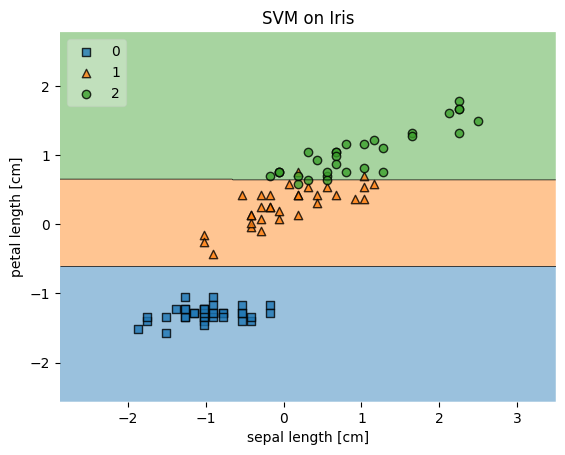

In [ ]:

# Plotting decision regions
plot_decision_regions(X_train, y_train, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

## Trying different combinations:

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('bl

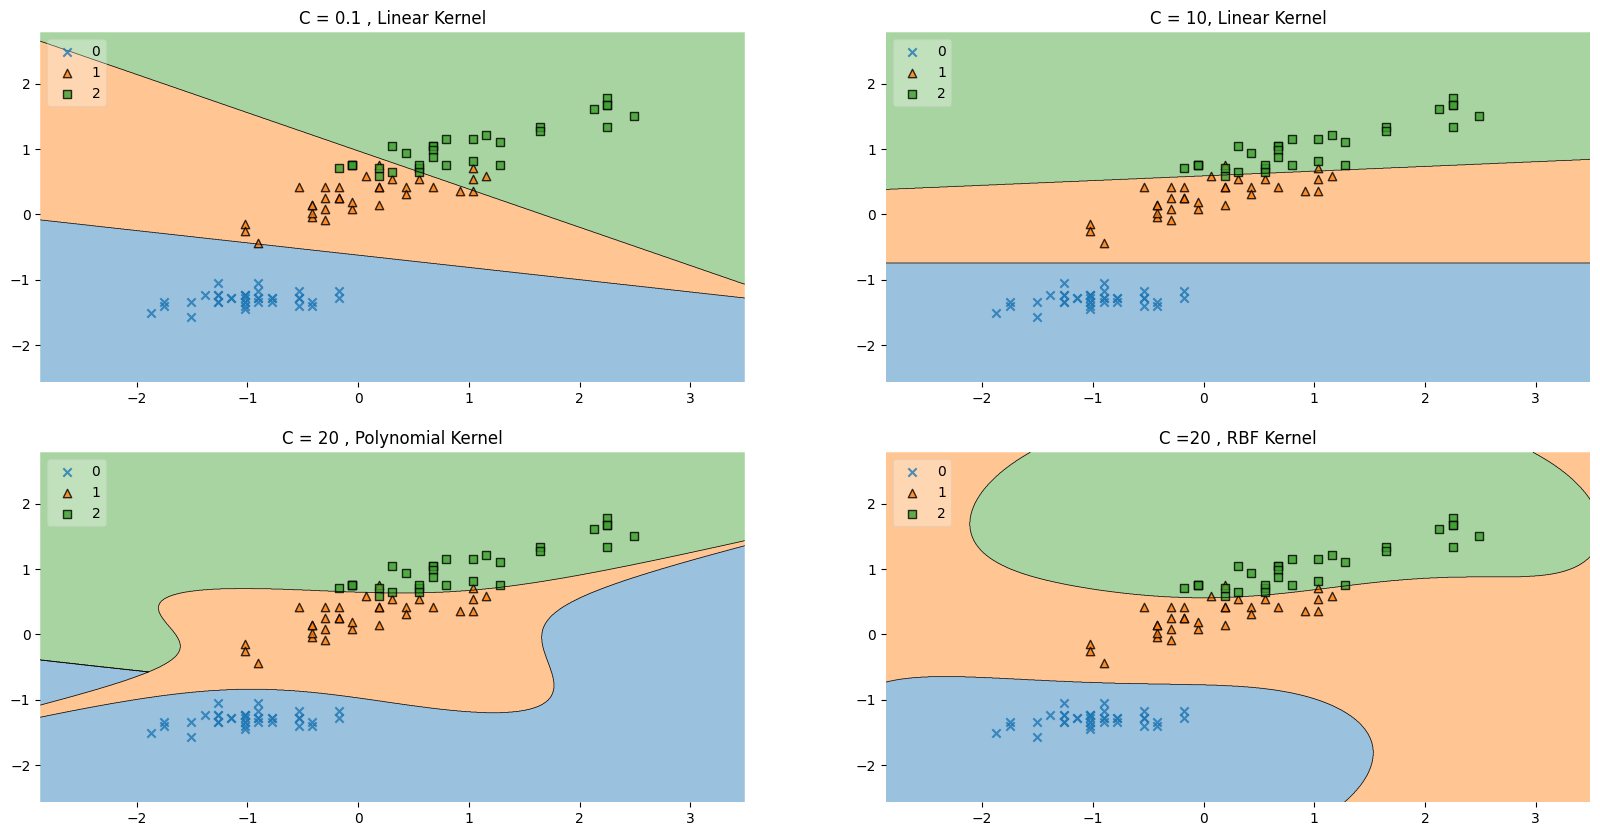

In [ ]:
gs = gridspec.GridSpec(2, 2)

plt.rcParams['figure.figsize'] = (20, 10)

clf1 = SVC(C=0.1, kernel='linear')
clf2 = SVC(C=10, kernel='linear')
clf3 = SVC(C=20, kernel='poly')
clf4 = SVC(C=20, kernel='rbf')
scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle':'-'}

labels = ['C = 0.1 , Linear Kernel' , 'C = 10, Linear Kernel', 'C = 20 , Polynomial Kernel'  ,'C =20 , RBF Kernel']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2, markers='x^sv<>')
    plt.title(lab)

plt.show()

# CODE: SVM with a non-linear Dataset

We are going to work with a synthatic dataset composed of the XOR gate

<img src = https://www.bogotobogo.com/python/scikit-learn/images/svm2/XOR-GATE.png>

## Generate the dataset

In [ ]:
np.random.seed(0) ## to reproduce the results
X_xor = np.random.randn(500, 2) ## Generate 500 itegers
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:,1] > 0, dtype = int) ## Output
y_xor = np.where(y_xor, 0 , 1)

<ipython-input-7-d4436b413abf>:3: DeprecationWarning: using `dtype=` in comparisons is only useful for `dtype=object` (and will do nothing for bool). This operation will fail in the future.
  y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:,1] > 0, dtype = int) ## Output


In [ ]:
len(X_xor)

500

## Split the dataset


In [ ]:
X_xor, y_xor = shuffle_arrays_unison(arrays=[X_xor, y_xor], random_seed=42)

X_train, y_train = X_xor[:400], y_xor[:400]
X_test, y_test = X_xor[400:], y_xor[400:]

## Train Different Kernels

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('bl

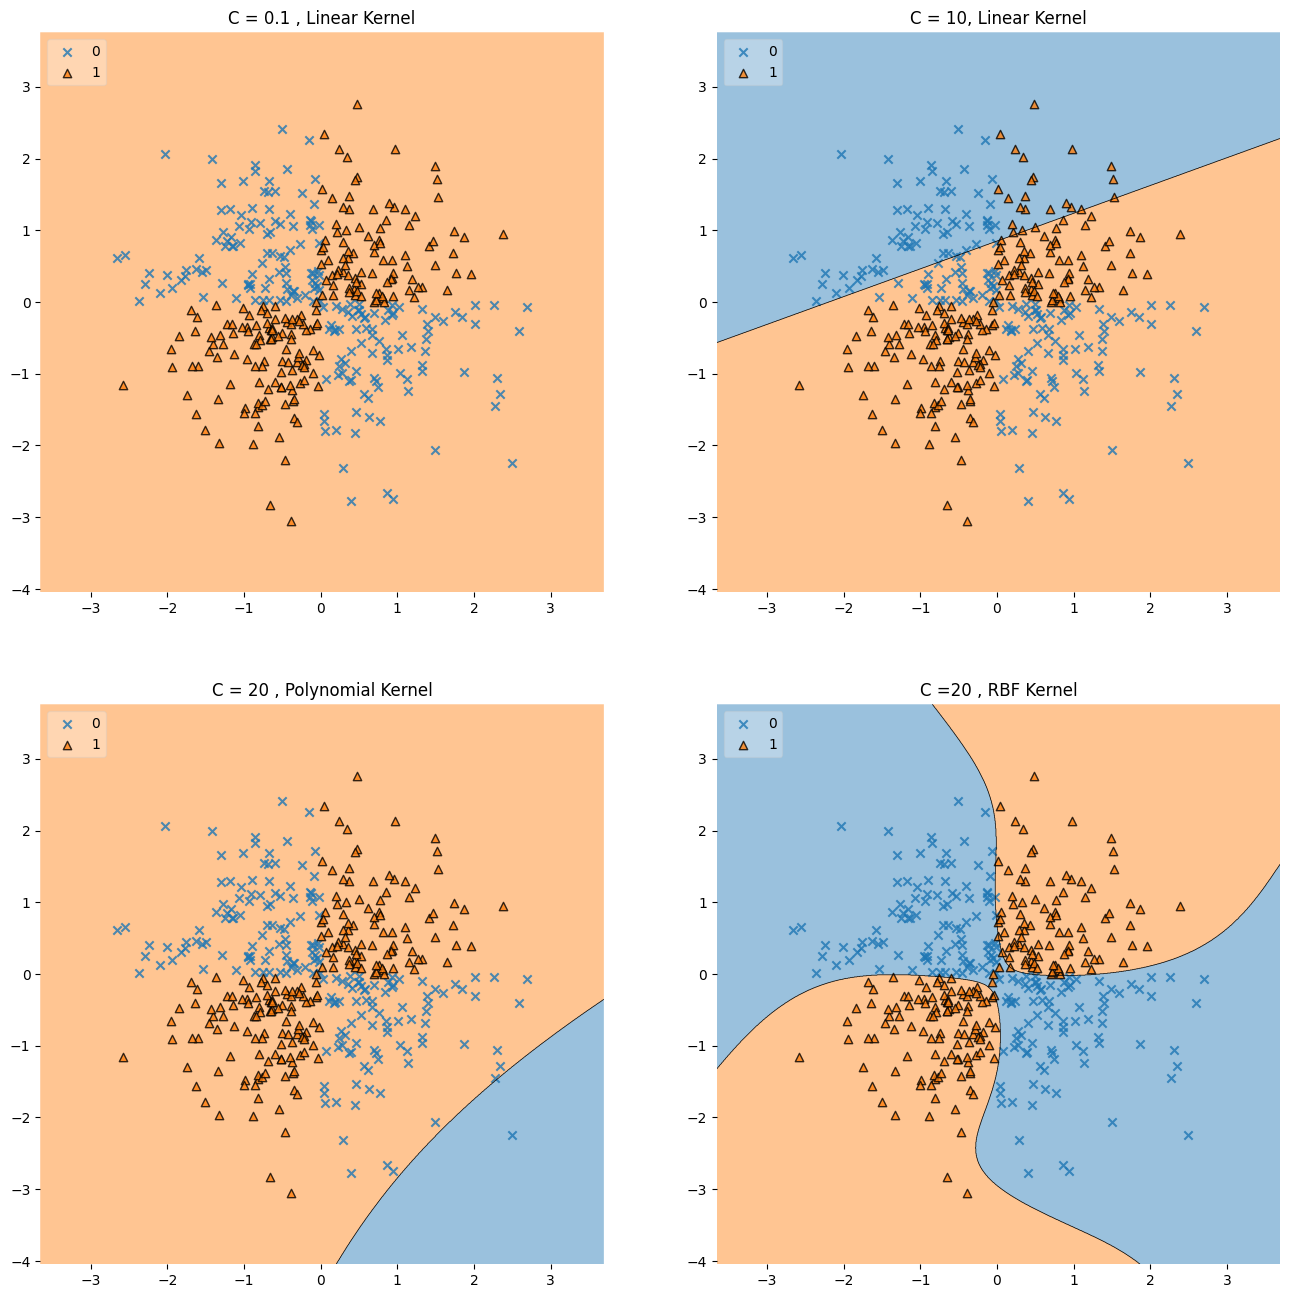

In [ ]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(16,16))

clf1 = SVC(C=0.1, kernel='linear')
clf2 = SVC(C=10, kernel='linear')
clf3 = SVC(C=20, kernel='poly')
clf4 = SVC(C=20, kernel='rbf')
scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle':'-'}

labels = ['C = 0.1 , Linear Kernel' , 'C = 10, Linear Kernel', 'C = 20 , Polynomial Kernel'  ,'C =20 , RBF Kernel']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2, markers='x^sv<>')
    plt.title(lab)

plt.show()

Let's have a deeper look with the awesome RBF kernel.

We will try to visulaize the effect of ᵞ

*N.B.* We have n't covered it in lab, so have a look for it for the sake of visulualization.

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('bl

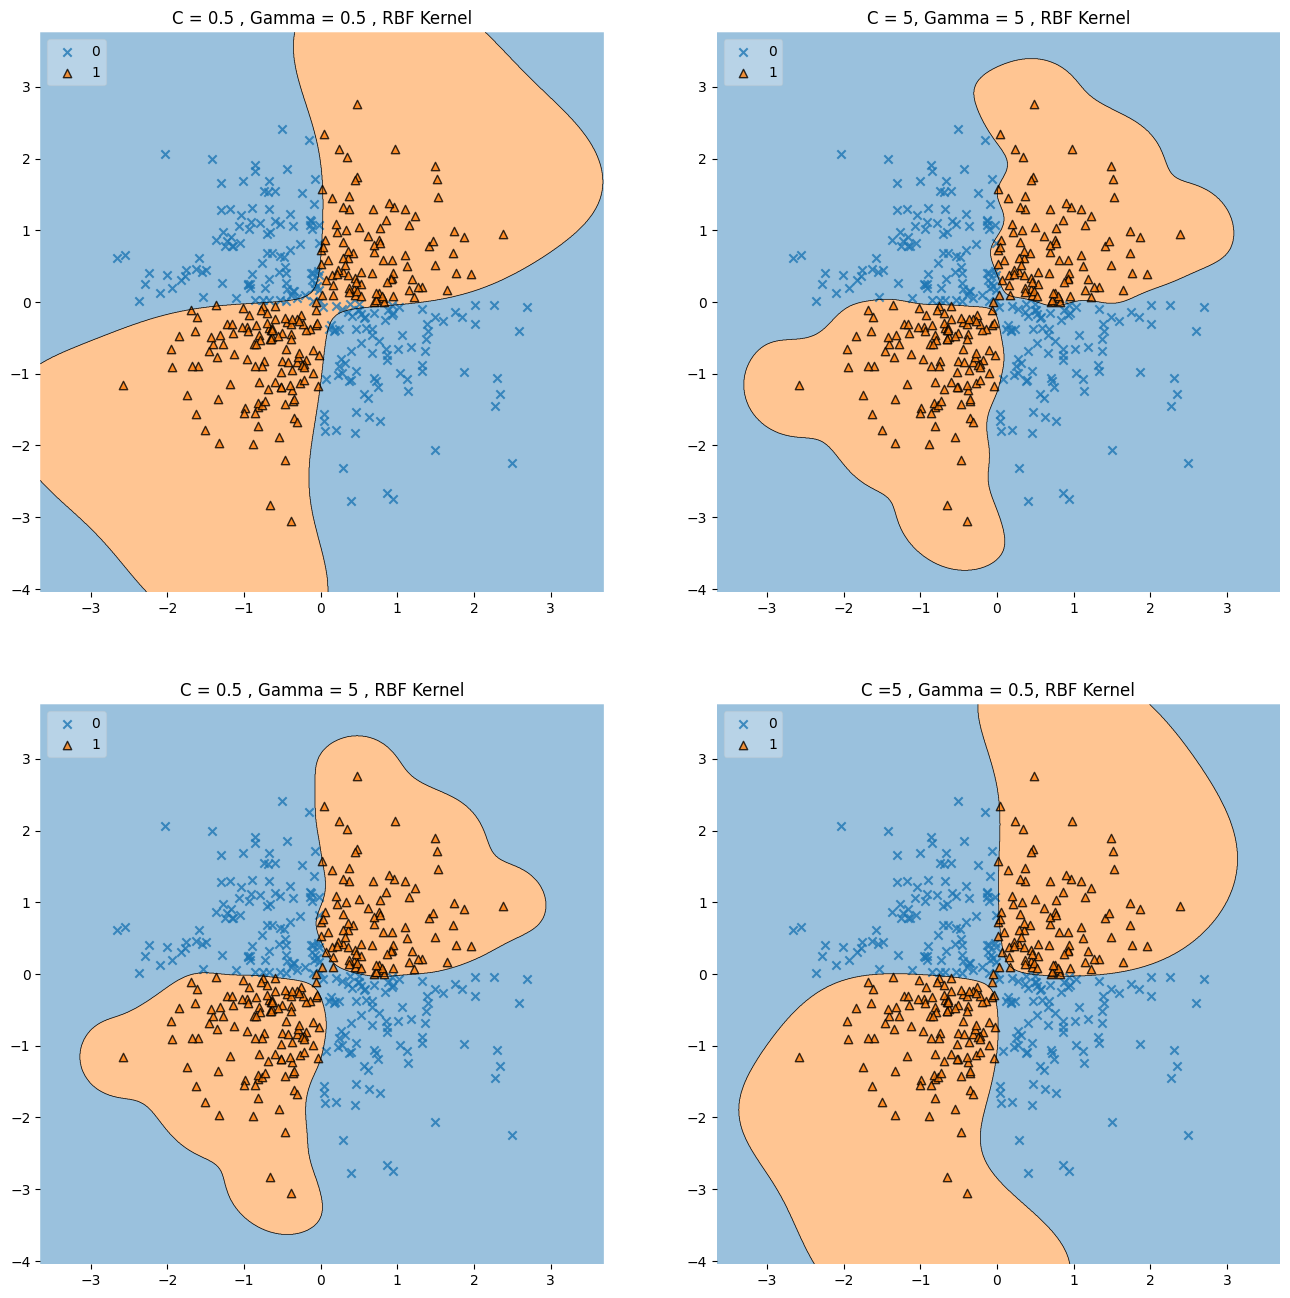

In [ ]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(16,16))

clf1 = SVC(C=0.5, kernel='rbf', gamma = 0.5)
clf2 = SVC(C=5, kernel='rbf', gamma = 5)
clf3 = SVC(C=0.5, kernel='rbf', gamma = 5)
clf4 = SVC(C=5, kernel='rbf', gamma = 0.5)
scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle':'-'}

labels = ['C = 0.5 , Gamma = 0.5 , RBF Kernel' , 'C = 5, Gamma = 5 , RBF Kernel', 'C = 0.5 , Gamma = 5 , RBF Kernel'  ,'C =5 , Gamma = 0.5, RBF Kernel']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2, markers='x^sv<>')
    plt.title(lab)

plt.show()

- Smaller gamma value makes the bell shaped curve wider
- Instances have a larger range of influence
- The decision boundary ends up smoother.

![Non-linear-classifier-using-Kernel-trick-16.ppm](data:application/octet-stream;base64,iVBORw0KGgoAAAANSUhEUgAAA1IAAAFwCAMAAACFA7ohAAAABGdBTUEAALGPC/xhBQAAAAFzUkdCAK7OHOkAAAMAUExURf////Pz8+fn5/Hx8e3t7enp6evr6+/v7/X19f39/ff39/v7++Xl5f//+//9//n5+v/7/////f//9/3///79+/79/+Tj4/Du7v7+8/799/b28+7u75ydnMzMzPX1+ODf35Gao+/u6+Lh4fz9/vv89vXy+AgDmMjIyPHs8wMCafr8/nZ4e//5//j///b79/X8/JScpmEEBgQCdPv97gMCfu/x96OjowMCiPz++uzr9JGZoJKSkv76+/X1/Pn8+wQDXPz6/xIQdD8EBNbX19va2vz6++To3+7u6QUBo+7p6PHx8PLy6nJxqOru7qyuro+Pr8/T01gDBU0EBBMSaPP28wMBkKMJEePo69zf3UZHSebp9IeIiP7/8QYCsHgFCLu8vff7//b37Zmdsf7/7PX77vHs+vH265KVmn19qXAFB+vy6IoFBtPW3w8Jh0hKgWZplvv1/IWIrgsDvbELE2prbAICSkpJkaioqaSmviwpgERHb5cGB4AGClhYhI+LitTMy+7v4zo5ggAAADU1bxEHsXNxcQ4Ift3e5WkFByQlaIoMFCQmVFhZXw4HkMTI1R0ZfyYldNXY6IOHnauryX19gi4pj3k+PT05kfj39b4MFXR1mICEh7W4vREHorW6yw8SS9zd7XV5iA8QE1xclufp6omRmWVjppcNFsawqxcK7i8DAg0EyNTV0bCvvmVpg6SkqA0F2JyfwbS0tKiQj8bJ32AWF+zx8cDHyeXh7MsMGc7N4o2Mu2E9OuXo5rOvrBQUW315udUNGunp5u7x88C/2B4Zj8DAwJaXwOjo78rAv3gVGI1ZV7a51riVk49sZ/fz8xEEBWRfX1lUqI4pLaup14F34qKhoC0sLZmZmXklJUlEpjk7TV8nJlVRlgsNLsG/ytDN1Wtlv2pe3+QOHHtYVOvc2pKL4n94yUcfHZ9oZjs2NfPy8jgrwI+KyYGAg45FRjQppyEiJvL39ph6fbRoaVpQwSkZ15WL+Ds7O716gd2Qk6wxO+fl69ItPenu6/r195/V2FkAACAASURBVHgB7P0JXJTV/geOz8AwzDDAMAyDDCheZBgZYkmWGK4sg+yLoiKKBCogXER2BQElQQhEZBFSjARRCjOFxFwIKghFySy+WXbLci21Isv0p3Vff3/6f59nWIZNwdJr98dBZ57lnPM8z5nzfj7L+Sw02kSZGIGJEZgYgYkRmBiBiRGYGIGJEZgYgYkRmBiBiRGYGIGJEZgYgYkRmBiBiRGYGIGJEZgYgYkRmBiBiRGYGIGJEZgYgYkRmBiBiRGYGIGJEZgYgYkRmBiBiRGYGIGJEZgYgYkRmBiBiRGYGIGJEZgYgYkRmBiBiRGYGIFHjYBA0FdDQOPT+nf6Dk58T4zAxAiMYwQEHGCI+sAX1U7A5oyj/UTViRGYGIEhI8Dmctk0ilJxuKQAUOwJUjVkkCZ2J0ZgbCMgoDEnf/bvfy/+ly9IFGfzb/9GWfzaUkBsbO0nak2MwMQIKI4Amzb33xs2bNi9e8NiOo3Wsxsbuzf834bdm5kTmFIcp4ntiREY4whwaAd/e3H63M92/7bhbRqN/tvuP05MOfqvn3bvXsydwNQYx3Ci2sQIKIwA+L5ggTFt9r937/5MDilDmia/AJiaSZvQUSgM1MTmxAiMfQTYHLbx5t27V/NpPaBSx2gcLu3g7t1/mE2QqbGP4UTNiRHoHwEB0UQYgCxNllMpOtH9df2x+zc3Gru/0sTGxAhMjMA4RoBD+3L37t8KoJ4AlQKkaDz+4t2/TZ+A1DjG8JmsaswhhXozsqnN3p1n8mb/l26KzdeFKPUVZCeiniCQotEW7949Aam/+4/cZxQzaD1kYsXxyf+sbJoqAPQZny/oo1ICGhtUasoElXryg/8kryCgKc15efHmF8HBC2gzF2/evHnx6jVu8jX9J3nd/8/3LaCxgKjNTmSoe6kUm6b0792/KU2oJ/7Wk4NNW/oblhyx5riGxuH/RDZRfnvZYOJ3fcK/q0CwGuu8x3hcmPpRGj8BDJJeAMhAtSbK33gE2LTVu1/+cjLel/+eTaN9s/u3l16Y/NxvuzdslrP2f+Mne8ZvXUB7BfChRllOpdTA702BbDVnYl3qGf/pHnF7Atr0uXwzvvtvu3+bS6P9sfvfunxjWtxPuze8NvHLPmLo/tRpDm3N7t9+m3lwzZw1B1mESv309pw1eJdhlWqCSP2pkX0WGmtyWDQmeHg3TUDqN3c++I8Tu3f/xJhg/Z7gr8MRrCYGflQ5QTtGbPxI+e3FCXukJzjqT6lrSrn3IozLaAIeGL9gqCn4XDCCJyYUT0/wF+DQ3v5jcW8JpnFepnaeeztYMKFrfYKj/nS6ZtMOLv4MqtvPZgNCoFJT+WxsrKbUFU/nDv4/exU+v//R+dQ2WL4JRPWPyd92g0N7EQzH7t9engpXbUAKVAqqv5cnIPWkf1EBG0XAF/AJigTG1K58wf1JX3mi/yc7AgKa27++fPGP3Rt+m6tJNH5TASmKSs2hGT/ZK0/0PjEC/5sjAEskPu0YWccnGj9CpaBzmpCl/jd/7ImneiojwFHjqtFm7t79jVQOKfgYuP22+99HJjR+T2X4Jy7yvzYCbHciFBPhaTG1LkUYPw68eJ6bWJf6X/upJ57naYwAFu7/vfmEm9trcNheQ+ygf9vh7jaH2FK83mdO+zRuY+IaEyPwvzMC7M1UUJHdu1+GIhcOcaRs2L3YHcRqokyMwMQIjHsEQKa+2vzbb3+s3mEM9m81jGSw89waQ6gsJsrECEyMwOONALtHWQ1LIwKEPj1Gpysrc7EzQaMebywnWk2MAHBEBmFQ6GA2CS08USZGYGIEHncEBP2qCGwN7DxudxPtJkZgYgQmRmBiBCZGYGIEJkZgYgQmRmBiBCZGYGIEJkZgYgQmRmBiBCZGYGIEJkZgYgQmRmBiBCZGYGIEJkZgYgQmRmBiBCZGYGIEJkZgYgQmRmBiBCZGYGIEJkZgYgQmRmDsI0AsgeXWwAo2wQqbfWflPfbX7K/Rv6F4SRzsr6l4nDo8YovBtUbde3jbkc6OdEzefd+Zvu/hF4UTQt+DDD85cWRiBIaNAAnoxcE/AZuLDFoCDjENZuMfYkHhgwr3Rbm2YFeAuF/YJtVJDXKOqs2Wt6KaoQJOoTdykLQne/KeSHOqW9IV+Qc3Gao2cZfp7YhqRPpFc1Qmu1QbUpW6NdKE9Ef6Jp/ynsg18Y8UaoNcgWyQD7gTkG7IaerGsIkHkJ8jz01dHPfVV4m6O9IN1RWuRhqSan3/hg3hs3YAz/as3dL/p+4HieimrNGlsZUOHpwq4HDl05Ka/NSsw/RFljoyqdgCHgUmOULwSU5RWCSzFWdJNbIPDKAJdRbTk0xeUg018I/MUJzBNO5tyqPOkhbkFHUJeb+kOtWA0AjSkExxqfyKpCdyAaoKme+oQS5NHSInyRmqQf8H2aA6QUuCLAGPNEHTga5IDeqfHFSkIrkfGuqgY9IheULc+kSZGIGHjQCm1fSXp9NoU55bysTckc8xzCYal83lEQD0/gPKyBaBEZn7FEYAHPIP8KAAQWYemXxk6pJmcmjJJyIqUnQANUklfJGZ2kuK5M1wkByR/8Pk5ZL5zZWiM8xxKWmGU9SklrcmACDdkmkuvyR1U9imEegR2AIIuCoqkFSW2KPqEsRQD0HBGifIdTkC6m0ifw70TNFieVPSP46jtvwOHjaaz8a5hxEp+TnFGorbI93/o86P1Oaxjo33QuOt/1g39RiNgAj6zOlsmttLX00hE5BMfPLWxySlpjiZuJjHHEIIyAf+Y26RWU4mOM6SgsqE3GAekuoUoSJRREkP1DTHdCQTmdSjpin5Bmr7a6MlTpAroz51ksxjUh176Jncg3y/l/OkQIweyNQn9anpjpvHdQAbqqW8Fc6SfvFFHoDqBTdIbWMHJ0ADyVWpWyUNydWoIsc+uQR5WgrL6B/vj8cY5Kfb5GFTre/pBn0//PYGVVXceXizcZ9V7PpPbI/7ugMNhl514My4tthcGver6TSBmurSmXTW3LluDDqDo8rqUWYxuEpqDBbdV43JUaKr+nJV1JhcXzrLgGyw6KosppqBmiqTq6qmpGZA7+nhYo/OUmWpcFW4Bj1ozVRTVVVT4SpxmT1o7ctlsFiqarp0BjohnaqpKmNfhctk+dLVDDgqagw6SwV9oW9cC4d7SCUlVV/0hSuTanRcEmdxZRUuA1EL0KyHRWeymBwVlgEdtRlqPSrKqIuzPT24PdQ2wJ0wWMrkOQzIfRngrApLVRldqOC+6Uxfhhp6VkVrXKKHrqymqoa2DFJbTRmjoKbKwhcakdrKXOazDSnMCjZHDW8Y6vU1dI6Ql8fw0puEerSv4Q16jwzvXX4ENP+xCrolLzeKJSeXwFb/du8lR/wCe05VJdX734gj3BwlsI9wXOGQvIu+qw6cGBekBGqC4JfXqLupuM2ZydWduXQ/g87kMFkMTDYKUsoGakpcdTrDgKuOiY05iflLpr0Bi8x+JXJQST6/MQvpLCYghX1ltMb8Z1CQUlE2wOzmMulo5G6Aw9TUVGMq03Ee16I6VWIxe+gUAOk9DEBKhdUD1HJ1lXwxn9UAOMx3zG8D4BLVADm6MjmvyqKryCGFO0MjZV0mvnDWV5WFi9KVCaSYaAPQMLi4sgHBEkvVl0BfDbekpELeCLgTAinlHlQzUPMFauXNCHwBSHltg54eMhjjGt6nWhlTgFD5aWt06UwV396i3Fd8ffu2lA2Yqj3y06q+qlTp+yJHVRm+yr375Fx/M1+qMoPha6Da2ze+SJ8DewwDNKd25d32ViQNGSoG6GvEYsBkqGLu4AdXY6mRwiKF2sIB/HjU/rAPvINJkdcbaEWn9yhU7T+rRieTdmB3YAu18Z7GVQcODWyxeuhqLO64BGhwctNfXDN3evCaL91oU79SAqND5AoiWeALnJFcVILIQfbIe4Q6DI6JC3ZLjUuEFDlbRNhAwoDhBHmZEA6P/MDUWfLapHhAOpe0wG9PnSAfpDYa4b3WX5u0JfpH3BtXjTQktXGa4tuw33tJ0gD/cI66CGHkOFyuGumJ6ot0TG5Afgu9rB05R12SXATVuCx8YSpSshTVjNw2CmmGxKbog+pYfgkyBk8VJeO6GG4UbDlt/yvBdCV1JoPJQGEOFLIrLyrqKoon+qv0n8WRvgp9bfBNHVVXYqqo9LdAvYFrMNCvwpnBm6Ndk1xJCc166AyVHnpvYWH+9+GiRwXvTTnK+g4BAyx6j5IyqUXV62tHfRuogHfp/+trQ8frUkmZ7A2qTO2wVEmT3kI1kB8mlVXw3uWO70cHLlhcNQ9MLY7A/SsGkcLJVMS8kyOIAAWzqnfmyucaThNccARMJiVeYL6R2mQC4ygRolDIEcxL7FFTltpjKzGJ/EMV1CTnMY1RyASmNOxkg7QkhyC3KCPhNbrDEdI/1XPvPrkIWhPZjuqSHMYB3BHVHreM5qRLHCXdUf/JJYmahYIJdUm6Ltmh2pJP6pZJbeq+cE/UdcnlqWuTGxvXLH+6lckzcmlTfplKV1Ey6Cu99ELVgNF7hGGAOYw9nDBQAAzZRA3q7JDDCrtMpYGeSX/UKfmGgYGKOmNwj+SEvKiqqDNV+3YUv3FRcjuEwwGkepFATWtq9rNYyupgTeTI6TtMffco+ZJv+eTvhRbZZTGU5OAYVJv04KukrAjNXtCSLwMlfA69ONWergKBZXxUiugIyC9BJg8teLIKJY5japFpR6YapcIGF0ohDbgix6kZD7GdLQBJIC0x/bGDSUdaYIvU6eVcsU9OEfUANjgsNWxhmuMY6YfMWdKYAJTQDPKBE1Sh7olLl+8QQPV106tcoC4IfQRugdQh8AHC1JDXl2rZe31yIYJOcllyQdTEaTQhN45z3B48lFzJQTqkbow0kW/hUtR9U0oM6m6fISpFHo2CLHl6eSEPSpv7ojpFpRgETIqzt38buOjF12AIyCtQM5xAhdpVgJMcb6RpH0x7u+/dNVBRYpI6CqX3FlCPqQRIkRtS6FC+acAgMO1hqTJ7J3kvTORTmtWjAll3REhBQkYdwhsOnMYRAxVC1NQUe6G6YinLqZR8R/FTjYKU4pH+bbqKqhpdbVzvUTKRMc/A6GF2Bn+lQiBGZDyitaamHpnJNGqXggmP0A75lMPP59tDTcxeCoJfFmeoP9IFZD2CMp58QlPKNI4BC5VQBfMY6nFqAlM18UGuh4mM3tGMfJOJT1ftnea9pAW1UI2qS76pZtiDQEm2cYjuS5E1Uo3cNS6OxyNAImgl4MOd4Yu0pS4HyY96qxAZl+q498Ug7480o26AugR13adLd8ZyNYInClPkKenu7gdXH5ympDuY7RqyB+5t9KIy6KzKQCFNVHTVBw4M3VLXVRpS+mrgsK4StTOkAtlVn4Z2TObQe6YAB7ZQl3CTw4HI1GVSEt8AgHvxq6I+APlesOMLYh9TnXrLqPbLlPINX+UeprpvT0/v4R5SqG2y4asEFd34IIVfgfrZgAYOZCkm9Trv+43kvxQ5L//JqJoKB9m+PZhyvWflJwfO9u5TZ9Gc6gG6RDL5+1pQx/rq9e70HcMNYYqzevq7lbeSf8oP9lXt64GAid4z7A5INdJsUHVygLTjGuCd0t9B34ZCVWpzcNu+Wv/NbwFHbe6apSrUy2f6GjfyXgS55tDcX1m9+d+b10ybpouiPuIfDk7Df3J6aJE3mDpNXV7I6b7N3m/1adOAgL6dod9TyRnFi/ZVwPG+TvsOKXxPnaakrqSiPq0fgCrQGqkAbNR/XV2AfIQydYRjwCfAO7R6L5bVpw49QfWgrg5Q48ywkzguhztLYT6M60fvhdTY2wg4dLXxMUJoQOjP2AqIAk2NPra6vbXwlh5fAxpXGSRsXNd4NiqzOdN+eWX1i0ogvgdXv7x6Cogr4WYFrGm6S587oUupJ0YhRAwGZqpc/wAVxqA/0gJn+5UM5Cz+QSVHnSFfpKkCzRjEHBJZiqnI+fUSGmgwoIPAmd7Sv0HtgycE44flGZU+eaaf7cIBOmH8oLcgx/qkHXxDa6zAxslPUFV66GD8FCqSRr1FVQkspGKRq0N6lHsYSoRKUbuENPUWQqpUlRg9qmqPO0PGDSk2mwmLi/FMMYGSAX77sbYQcGk9KmOtTOqB5DINhlGph/bAUudCfPz7FQGbzuStX32CRmM89wL3xZmEj8Xjg0Gl7f9FSU0JPM4goWaAPYIkxFSHRlvxiOK2KiVLKR5R3KbknsGQ6MUJ0ZMTPeOwk/LmRD3RBym5mNa3J5eliHqib/YPQApIUoYaAjigjg3ggcXqVU/I61InKEix1JhKA+0VWqEn6PVGLqq49MiFkqXGqfEbmE3jhpQASvQRuKaBHodtQZ+BX37Y4ZEPYIaAvRn53ChHoTAZXwMahzW+Jxjlwk/9MAcKftqUl6fQaO74WPPLdkiE0PsIBGqAVHCPkq7BIyCliJPB26NBioIAKAoA0YcGhW/0AbgRKjX4bO8etIEDYBtUgxAwFVWsHFKQoijRwOzGTMfqPdE+yEHTT35AveRQo7DQe1iuxhgGKTl1Ixq/ESGFVkSJTi5CiiJssQeN3zhlKYW5MH5IcZiq42P82EoGwInCNR+6CdFAdXxUCnTT4KFdDjvJUsfK17Cjz/4BouFxnvkSg8Oe+/Jc3sFXDMjqBwqbozn3F3eswSvyX4MhQ5TdKqMDjui0FaCisEmtQVE8o8JBhU0m2E3C+A0pVDNCwRTODLCOhLFUpxg/Bhg2eZHP7d75jfUnggkKNX0VyB6hXhRYBnBAwYE10M9Adaq576i0iFrKkkOqF519PdOVmFgkftwZ8hiQgsZ+XFcTsNSgZxvjhCX6P+R1HU9hs1njFCW59L+nLAXJibbmuWAIpm4UlaIUnRgqvB/mUku9o7J9wBchC0NhNrDPeNhZnByoOWRLVUUJ7OaIF2aA2YSJxPBCwa9XlmIOQKlvi5AnFTB+ffsD34NkKYXDhIEc2FXYApV6HMZPyUCN/tgWM+OGFJttoDy+V7yACa37WKkUoWf0cREdiBIGquOBII0Gg6rxPcL4un9itUGOlq6eTuP40hnPrVH7ZSZFo8jV2LT1r0zFutSIM7t3Sj8UNODfHgI4uSw1HBrkCCAFEW3EC4MhHBVSTKpPuXpCAQLUJgUprAwNPQ56RFGp4cdZoFLDjpIDjwkpYrvx9CAlYKv2jJ2NI7+3gAGt+5ghxWPTsC41jgIRXdV3HPVR9W8LKUHw4sXPfeX20ky1Dz5bTWn85OQfVOqXYDrRvY1eHgqaR0FqdCqFpV5QohEv/DAq9WhIjUCl6JTaYjh2wOH9tVQKkGI9PUjR2PRxqhcFRIk+dsYPVnascSGEw2HRx4pYecdc378p4yeYdPCrL+foTplizD2xZgrUlr3vKjZv/ytTIUuNOLN7UfanIDXYIEkRtw+jUg9h/B4NqXFQKaDv702lVJhjloyoGQwl+jioFMDnOz71hIDGHBdZo9FYumpjXigbF7qfdGUy8DxyEUpBRBl2UC8TSpbq6bc4Upzy/dt/ClKjU6k/CSmoFYaRIznjN+wwYeNGYfweg0oRnnM4aymngFCiP00qBafbcS7qCCg79DHONmIwxBkXzSVGfONbQyD1x/dWGOPNP4VqZGWXyJtkOW7gcgK5LNVnxNcPo0EbD9ExYNWK6LQHVVfYeVxZalQqRYwC5eoJUBewbYOLHFLjo1KqQ9elesExqnriUZCij9NsduDHGLd6AnbfjDFLRtR1OOoGMDQauORDtyCB01SVHlplyEmYKjJVhhx7xC7cvv6WS72jPhbMZl8J7n44lTJ4KKQIDXsIpP5iKkVBCn0Shm0Yogh5InRiKNIeSqUM/mpIscb3mlb4acYNKayTkgXHcRRiwTRmokCIlNq4ZCni9T++NQQBV/mxX0HjeO6nWFWguf85aPz+BJV6BKT+YllKgUrBEn0odh6HSv3lkBqvv9TArz1uSEHj56vIcwx0NeoWswfcyqhnB58YvxId9MaXMbiTR+wJiMZvrDf0iL6ejdNs4oLIeoKQeqJUamRIDUPa/zCVUqaPVX0nn29sZg9sp8c494hD1fjWpbDQqTpO9QT85sesghzjff93qwFSz/05SD0RWWrUdam/BZUa65Qd+tOPn0ohcMj4XvECqPjHDCm4m7DHaT3BYY9zDQFGhON8hKGj9qztE0i5b3+0En10JTsgpaCPGLIJrnDIkYHdh2n8KBu/gar9W7gNqCf6ZakRqBTlKD9YaYG9p6bxUyIav8flY8YPKTaTMb5XvEBJdeyMH/FwGq+NH3HdH9fzq+mOS1p71gA0/H4gS73iziJueP3TdtgGkZYeG1KPJ0s9HFJyG7+RZSlAanwav792XQqQeorWEzTKHHr4rzr6ETaCp4xZR0j8FcanREff432jcMC6Pi5ZH/05/4tnBIRKEbPZJwWph1KpUa0nHg6pUakU6NGTp1KIujX6uhRFpR7393wMKsXAyu14LscGlRozpAiV8mWOp3v0zRgvlVJXGx9ZG8/9/DfqyiE1QaVGYBUfz2z2qVIpuMGRUBLjKcpoMOYWMGtgDXfSfVhz6DNY40MIt+d/TOMHSIHx+5NUanSu8BGy1KiW6BNUamww4fSM06KOzaCTsDFjK8SygaU8uC4A+ZCFLTB+yn3BKga3G3WPa/A/pvEjVMrtz9n4IcrfMPGr78DDrCcIbFThFdVXV+GbmM3COXF4QeV+64mRZKleV8PhNGcUS3RUZIzgJILDo1mik/XlkVaZ5ZekFprHZcKjONXGzfjR2D30sbNx5FIcQGrMVArGE8Ms0Sl3cBwfuUCZOG7nDijRH0b3Rr7QM3xUQHN7zm37w9eliHpi+OzuO8IgzoJ9O0O/H0alSNCxx4PUqLIU5rvcBXEopkbT+KGeAYIhD62O/VEhhXPPDKTgKA/D8vFML1iij53xI5EUhlmiw0pp9EuiAWu81hP0h/Q3nkd7Vur2UqmHWk/8KUiNrvF7UlSKihE7BCSj+UuhGiA1UhkVUnIqNVITHHvaVIrY+I1rKnHU4X061hYEfMOU6GRVa9Rr4qTKuPQZsESHemLU/sZ6p89SvQkqNV5IATjPDJWiIZzL+DR+NHjWC9jEJ4GnwdPEf3wKeBoa+CJ7NB6+++enjg4JWY6qqMnrPSflWTU3O6OWJuXY0FcXu6QHNFAbn6O8gMP6H1vq/Wuo1FB+r3//vyFLESo1lJV7OJUaWpuQoL8HlWIzfMdMc6jZz1bxRS5DqUCTJ9TWkAn1tEN5WsbaodraGgKBMFTK19bW0urHlLbImB/NFAgI3rQ1NDW0NbV09JwrEhJqRObmHGk/poBCLS0NtNTWg6P8eL16EW12fM/QB+Nn9BtU6pX9UE88RB56uN8uiUzRj6BhG5QsNZqkRcWeGNaEHHiEeoJESKJIxVAsjFuWQoPHoFJU6D+Cu2FFnuTgcX/rcasnEC55nOGFBMrQcQNSbG1tIVtLR0cnVENgrBeqo6OtzZdK2YLQSL1+RNE0pGY8/WiBAHDi6fVCSiPkvLf4PN3cQ89GAVI8vVBtDXQiRLRZ+vgen3j1jqruGF9Xz0ZtAc/tuScJKZLAYFRIkeiBIyo+xgSp0TR+8tjng2f7aFQKmHwcSOHSIxcE5kTQ9cf9accNKQFHlT4+xo+tCkhpS7XY2hpaMshKWgRKemxCYLAn0NIJ1etHClZ6ZbRwP552qBxSPEBLqBEFSNX56QhFUn7fc2pqakRGCgXakdoCY3aP8vhoDpfx2AZcfdd/tr6JLPUnIaXyMCr1UEiRCEmPCyk1ItAMndlPi0oh482okELKgsf9iR8DUgzf0dVvI90Gm6lME+jpaWlqaGgKzERSgYZUTw8MnRZEIQ09wvUpaLQ12R4aftkaGoRC4T+Pp62jrad3tL5+SqSHzIzfDykezusIjCmKR3sMxu9/j0qRdaknxfg9FFL/k1TqaUKKDY/C8anLqJjoeqECTQKdZcv1+MbSUKBFoKGjqRkaGampxdaQ9lMZYaRIz6abVBUAbpqaOnrazqJIUUiIhbGTlii0n5xpa/MExnwaj62JVSvW+KxgEdZ9nKEIR3pTPEvH/gIqRVLajFYQMf0hjN8zQaXGu9QL8mQwKpVSJrEnniqVUh4PlYLlg4qygCOFNkLTQ2fLjZOL+GZSkVQmkNqIOHo2oXoikShWBFN1kjKKzRbq6emYMlBfZOks0tPR4tiILNjgEvl26cmXNET9kGKjmUXBoRBjYpE77qVeJSrj1bMEij93L5CloJ74E0HHqNgTo0lLBg+H1KhUCuE4dUcEKi5EnDso9cRostRIoTFHk6Wg2AMDORITB40fScw2YpGLXyOdpWSpp2k9oUayoY2jwFCcoCVUW0vbzz8+v92SqP/MpND1SUUcmUxPlF53UhmhiClIGZvJzJOStIyPxUqlQj1HLYGNZcgXW5LMzL4otU5oHriusQdH71Bap79pqM5jxURX4DXH8SjPalVCpdar/ZcgNSqVQpAY3RFhOgCp0WUp0Ilh5SHWE6M5d6iNDil5trhnAFICokQfmNpjmGQCBB3DOpCeHltDKUEsPm8nEmnIzGxuHbpxepmZLIlfkiG2XkMghZRubBpfQ9OkS9BSV3faQmoj1FqmXVAfX1liszw53rusZUD1ranlxEu2Tym9qMfmCRgQ1sZwI/1VSD7r/zWN3ytznz0q9WhIwTZvhNgTxMZvxHAuD7HxGz+VekKQgpROpWzrn22P3CCCyFipFFHowU0X3lxsDk9bW1NjQevWrU0yoY1Q5hxaUlldeUibI6PVuIZJ/oUaNLYxh918PE6o1m2Y6GJ9PoRno2eexDtaJg5KqCqvysmoN9XutXlAUkUPD35TvDhnvYZs/LIUEouOT2n5yFH5L1cg61J/DZUaMbr5wxg/ePWOpvH7/xiVIpOd+CaNG1I0tu+jzGYpqwcespHSjM10eMb8ExRB8AAAIABJREFU2QUOHA1tDQ2BjjTk9OljBFJ8Z+2G+DDb9EiRmcWixIw0dw2OFFSKx6jPSGtR85uWa22fFkKz0dMyttiSFm/tkl9d2VRTa+4hoIwq2HyeHmSw2QGJDeE65mye72CLJ5hd9JaRZ7qA+zeNiT7y4+AoWZf6C6gUw8gICaMotmyQpuJhkIKN35+A1F9EpeR5qoYxipT1xENkKcL0/VWMH2gHj2RmJ04XVK5eOE/A0RWHYYRK5VchSeNJADBUIJRGHiqYbNColVsgkmTgIzElqIZkj8pJjR7ZUqExW6gBietSQEOsXpLaP3IS49geUqmZmY6GJk1P5KHN3O9pEZfmmtOiJzLjWiyKqS9ZbiOSckS0EtcU71ar6OMZYWJ/u7hgC7ZMZlFSnpkq9u48bmHBF5hxYH7BYS9bZhNqZmljecRGm62pI/L11dERCIyN8Z9kJtWR6kAO09MT9h7EI1BmsuQtQh6UQIpKI4NbxN0T/SU4U/IcpCKpIN8j44HBIGPwjBcBcouOhUqNKNlQ6CFGtQyjbM+Sli5lA4bX4IqjGyQBf6M7d4yBSj3cemLIdNfX10d+eENDE3lh6YfrGxoSHGF9abSY6KPIUmQxbBQlIfoD2znezB2YJFPmKCEi35SD6nJIkXmEP4g8ZEtOv6CEIzMMEg4RhXCYwhsNfu/yPeoImXNUM5ylIIYdoRDLrzKZTsj54s50oVZtrji+3dxc6mwsEwrZUpGelkN7RuIizqX0EnNHY46OxdEM8db92iKpmUgzrsy+M116a0tOUGfTya3nS0SObIvT7WlFpRl1IVKbI8eMNQQiPfah9oBpGjKppZRtI/KQSbX16Twd6NQBKdwOrAdhoaEhFAq1obkgYMKN4ompx5I/IUcZ+6iMM9Q9k0cnz0HVxuuDjAX+4WVC1cAIPOuQgsZvihryZAwiLoN3KNAMPqSwR9mpq+7/1/n6inuzmUaDO6KolELlgc0/ASmVh2v8RrCeoOt3+94zoRBFZxnS6eELeiFFafwItoaV0TR+EODU/mpITX95Oo0296sXXlCb9hWDhNjG7AGZIawgeZmTfWyQiYXJx8MbHHskhTumJhMme2wkbqeOyCcftsmsJNMUDbHMZCaQcSMvbU2pjvHg6eZ6FyfrCD2kekJHc3MQGtrSzrD4dBtZkqNQhyNVD3nD9kB1BU3Klmkaq9X4N8X6djk3+DcdygGlgpI97px3p3/N6dqQmoiquoAaZZGew/ni/CqpscxMxhUKtWQ6Gl5e1F1T98tm83ga1K0LeEAWssuTgvMULgi1YtO46jDkRTZO+TMSwkSqYLe3NiHKeCDyKcfXs67LIFRqyhg0foORMoAMKLUJlXo9oPLmzbQaU4PZiqfIydGcO/4EpHqV6A+xnlAbghBQJdN7Pd36+ix6eHg4aFYP609Qqb8WUpgnrJnI+HpwzbSXlKZ9pQsWkEsilxNGkMvhEnaPSzbwhfDI8sM4AsSpoRIMy0k1qhJJxobDpC7aQb2Oo2yuMWqIlkeqJwZurRFtX950PjEuMlJmFioyT/KQmjnxP8oIi88K2KKlJtW3mZ5wzr+y+nwB9A2y7SKuk52T9gMTm0iGU21OcXyyc3joxQzv+NZlzhYnt3ba5wcWpouEW3K9vTMCdMnSlCzJgysS6VO3hCtzoOBQw72YJclIYUv1RL13Kn8OPA7hd9VIffKweBzq9vFwhJIBduSZSRPyJOQ5gUHy9TegUnP/LJUymFRQdfPu3cqAIYACpMhS74jlT0Dq4VRKnlh0MKYWdOub3LPr1u/pFukDUwv0WSyK7yPy0GhK9FHXpf5iKgW5h/sVqNTBg0ovqeu+dnCKEl2Jq8RiIpG3mrqaCt2XqabO1QV/ii8lNaSRw1k1FeUeJlJeqNCVVFgq2DBQ7lFBcHEGGqG1LsuAwVLnqLOYqmpK26dxX/eKXeR8NKLGbkF09NyWioqS8JCKmi1J9/Q93ZxCbgWkldrm+x/zXNDh2Wifl1vz/I7gbLWuJE+/6GNWHZyCZp9sP5+o9MSqLXYMkZt/WdbF2foF9UHeQba21v5xIbXlnfni/CrP8A4/fU8bzx7GVHUVroqaiq+qAQtfdCaDrsTpMnEwoXuFd3CV6KpMNRXcmYoBaxpXXY1pwFJX11VjQiFLHo+lysDjqOBx6HhG6uHhTqWCwwigqaTG9KWrcKc99rLfU4IiJUs9UomuNKrpq5wQqcYl3rwCSPkwhoBqfFRqIMUotdRLKOPAIbJFbqN/qZdQKaoMwKfPxk+N2OApyFP64ayoLrq+n75dQUuBCRfMHwsUC0VBlhraVb8sRU4oXuKvhhSXNu25NUpu0786OJMVPHM/k85VA/FR4+L1zSIbLA4dPkVkj/ypUQfxhQ0unetLh1oclVDIEXKQNKKrqdHZPaRtuMjEI9xymZ3TLWlIxcm5NrGHKvPT4lrbAlsNl7fUJ8yJle5IiE/xTvCMtrRckBjknbvjjc2bD2pGOYYvD5k7ba6dafeDB44mMqfYuYdCkkR2IRfdHzjp+wUESlyKXMr8E89XRJ/OyPPOjH1gkmSTHWrCUWMqkxtgkRsiN8hS2x4uwiNxudtF+uRx8HDUeXIOe9weBp2DyngO6ix5cHKYelhqgxxGE+osNnqeEcYP3ChRnBBeHF+EL6UYdHDlPPfnpgBSTMUk1UPICgPJcR/C+JHUuaYBGYTxAwIGt+3V+BE0DCkUlaIuOuQEtauqostUJWXoSTRj9lGpgXnet4W5r9ybtHoQEHrCu6O6TBdEGx5Pjkk+7mQIrq8nnOCEQEqeZkARNvITqgrpr+WY6kWd2ojG69RJyrljfK9RMDXTf1kz5QTz4OS5NPfJDEp0GuMLVcDpGcWijsjzVCc8WMhGRobcaC9ZXtFZXe+5PKIzrPS1rbYuCbHSdntxpeetunjvIEn5cpGFjH+p7kxVrq2LJLeAJ9ILPlOZkBtT26Nl7qgtBPC2Xp+tI+NINQRJSaGe5ZnlR5//ot5WnLPIqs66swkSnszc0VFmRqPL478Qj0Xo9KD1g9+IUKhBlPkjPhUXCbzHrHEYc8URL/WXHiTiKzhtiK2EMSWyHw2cKpFwiSy1ABnlh0/6/tlMQYoiF9Qh+Rbq924oKakyHNwD6uormk2HUhWSqpqCRi84BmBCsAHrQAaw3Feo/qhdBhMptxnM/qKiWJR01VVUmEieDZxT/fmiKPdQRbnHV8m3D03UJKfAAJJk0qUcblnrf+by5dZaJ0MTyFRkpZiClBwp1MJxX1NC41SHKdGpvtCE2Pj1FQrNVDNyFgZJ4w2Nid+BxVAGUVGje2gSJTr5pYgU31uIpD6oKO5jXUrxnCaFR3KkV8qHu4a5ligysqlTnBUc4x2W41bQtDU+JzMvxeWVaKsqe+/KRQvOiMUuLolxfGeOszQk5B+2YvsU1waak8Y/bVPsbQMbFpjJBEKb6M3WYfFva8gsFzWryRxtIv0W2UktufXF4pyQ9AxJTtMhJw8u28zYWKapTN0RG4o+6PggERlr0rAjhKm6YsFDyJ+DJBbl4X4VTw7f7ntmqtlfiozH74xQKC7EPYIoYuVF7pEQLi4NVIquosvwHZjafVOcfJM5S7g3hbMD4KIqMuDcYWqa7VPbbGrUZaCY+50gQle3HxfYUECGkpKKuq66Eor6CEVJfdoIR6lDOKWLViq601TwSf0jvVAFu0rT1FWU5NfpvTLu18vI1EHdKzYkvbLy5zP+h+yUYWVBIQ9YGF2WGmZWQcEIMCRmgf1/FJx6gfVYkIIkT5RZeOlxaMGTCaSAIl7/H36qgR2yRbR98j+s5yC2q3SgAjUXeQI+VB7kxYl+eZpammwbG/8g74y5DaWdiennz1cFHI0Bq+Ym5c+tS/vCTnS60sXF294fOkAPDzN+TaetdYprsqmMH+HqHW9fVrPcAv6+euGNkjzr1eFaF7Oy5jizt9sIRWoymfmUurR0qwTvFNfOshJ+UkXyxWWaMHUn+nMelOdYYMbiFKegxUlLoKGtTe6m78bJjVK3jTc7MsqTEYD3fv/5vnp936RD6o+0e1YoFX4x4BH306cwgc0JkAVsTX0RSnRdxRhIcmox8AlSwwBZkEOiFxa9cxhfmOEq9xZ5Xr0XMs2zQ/3e+wNQ0AVmpk1V19WlDumSoq4uP6+kTv6mAVIUqvp6Axh64aCkq9SHCCbIFYhZ7x+OknhOdDoTMq2cNJFPZWVCqxBnmqGugrBLvW3JLZMb7vBhdk317Ijzv/nzz5X1l9737LhH0EcKU12Xgrq8BfXQFOlTRdwzVTmGKLzgQ8794atXiU4EmL5zvd+PQ6XIa45AAB8wSMIKFX6UgUIm28AefkD8aAP7bKaq4h7YLwEbfk0asJbgdsH0iAfvXZ4m3+J4RllVU2PWF1uybMWJRywK/BNP852iBLO3LBCxRXN3BaaIE4U65jKeNj+uTCKxdymsK8Cib2JdWaJnLF+TeOuWZKamltsYNbq4bH6dlmQeElFV80Cg795sZbHL1ts2RVIuqCjLz4kziWh8WwYWjwpnwWPrcDQvZuacdJJR9zHgLwx8YCmXeg41WKJT/NPAUw3dIk9FVQayBj3+0IpPcx8/BSt4+jT8bDTfuSdOuCFUFXkrsuknlk7e/MsJ3cE0QY6BAWxMmwZmixSCA+BE/r93lxCNZnVPz+Z7HZ4dXa/3TuI+ekSYNDkcqTlLuMVJvkaYuXCGh0GSL8wu5LSOwSBHyQlSVMkyML4nMaj53XsUUaYJupRUGL7Q1CkGCzPERMd/Ol2NDp3YsELv6TFVz45u8b9z5+fKk0dis41Mo0xJz0TZoUvdn/yGgbE+rKmrT1XYI+ij0K4EkCIrw8Cdkm6USQGw6b7jZ/xgMIDpQl7amGWUjd+g9zA5NzBTSC2FfaS9UAznIpVKeTxH+KuHCmV2J7NiuqQiR2GojrkOe1nL8ZqMoK2njxYGif3vW1pEz+bXtp9J5/B5NkI9G8sAV5cmAUdkERJ360iWi31KfJDrv2h8q0VVxVvTl5ub62jryPiHyt8ooE3JCAvKfF8jSSu9U7zV/f2Y8xVHLGpb/XNcy07vaAPDWHM6PygnTiA0dhbxEfFFW0/qVOUalFNrYUbiXSg8SP9zIDUIEfAVn2rgcXu3+s9SG4q9DKv69A6QX+u5xV8Sm98pnz03cylW14jmn8ac/Mtzi1d/oDuNmjGERvRPqT5QYMKBSslf4uRTvknNKWpeUUu9Bl5+x0yNvIyOySFAoYLMNfCMqqpGRpMADiMvFCNl8IjuntmTTCdN8vKCO7BRdjZABNbMyyvbq79TwE3Xi3Ri5IWm5KQceHJRTanDaBLdEGazdLqhiZN8BddE38HBBCoHQ2V1mM3KdQ0UjSHbdJZ+t5+nl2XtjcuXz1RtWRa9PNzQ0KkXeIqMH8XNyZv10A2UfJV9Qf3Ifcgv3DcI6tPI4JAhG1rwvlFhjqIxePSv/Rg2foiJPjDF4KgBRyhHRy2YsdaUil3TtT0AMM0kD6v7y2kNrmHiG3W29pXHpXrO2lKrpmJxWXnJcV1zDw9aeqn9eQfB8ri6ylbD5qpAsSQe0lTB8ZKcFHGWJ9QTUo6HyDI6XI9/FJBK9nBMcg6ID+ssiSgGO6nt8aD7eMAXdo0ScXGaZ5O9t+tFmohtYUGCKIlCheYB+fZpxC0LLowKBHVgMAiVekaUeAM3NZYtNnu722uTYSpGm7L6BEmuAGILXpCjqr/+lROY+AqyEjWF5B/UHDcgDkoKB4dsyiGFgzDYUxS5qGoEjQaMSUZA1SR8ejGYJi1VmVkNPpMYk3wYW2rSa9zlSUFwzmvAmAmxJzwBKVOACZAyIJByoPqj4Pd+h5ER3RAxVcJ7uknpobPUTOIqmioK9HtMTIhJ0DAyZajv5+lnknSoFQq/KDusTQ1YTzCHiUxUa2I90dMHzt7+EFaCUhJSPvoUVCGTkUKYTqqA7WSoPj0XRBqolAKbSFx0tWVaOhyumUZNfIpthLaHuczMWGDYVBdwZFFd6ZkvtobFl1tZSYVcM4vW4pT8wIzc+hCZbFmMOKWzhSYtt60unUu79Xx9TN1J1C9Lyyh2LT8idNThGMM0VhppYx7SXprWYqwluFWTVuZ/P8AekLLZruWoJTOzSJZIEi7NLS8sSzwiSHIUOANCcK8XadW2+5+WSsE7wsxvBJ0fbONBpMYyhZ+1OmD5eJNfoKjU5udm7iccOth3fNCCn5uiDzZL/h4eoBMUxuSQouwjqBk90kc/pEY8STTsBqZe2WC1HKIcGPePLEp0Fdvmlkxi+Bg1V7S3t6Y3D8MhQSdT12sSeEEAjaDIqM/OiYJUR4eXKssQ83oBlm1J6QkPv5d+41prxSS6icnrIzl3GBr6evr5mkTVtmyJSorS16dTq1JACpToI8dmoVPrUgREfcRODlRCyORei/3H5TSRwA5s57g1fgozZdxUSsBW7lEQrfjGoaE6WlKbSJFzKDNma32Bhrm5zMKMVlLmXVphEVKzaNH5+NJ0C46jo3kSP67O1V5saxt4mu9sVlNqCyqll5zvXbZfQ2RjxzJYZlHhGuZaVf7PAiczaO6Sak4eMtPTMzcPOeomktK2VGXFHO+yiTtT2Won1X7gKDWW8u4FlB86mhuYWRGiITQ3Z+tBhtPkiYQycxMTDZHQ0VEvUk+q8Kx9mwI1A8h8fXt/p29ozNW+mqwGxq/j4MFXnlOHEIzXGzDFC35lOgs2fnJiMQALObio/T8NKQdGdrYXgZTd68fmFnrv3ef6BtOgwyiu9cbvN24cggU7kOJg6iAnROSSJEKSF+AE8Qr/Bm6KoI/BUOpQVWWpMToWhPuFh3fTTbq7/cILblz7/drJAsseu64RqZRhD1b3w32xIJnk5ARGkC5f6iWQGp1KDaF2vRjqC6qkcJY6QzCF8NFYk33cifEYkFJVDOdCeetCZ74/udxdO3qunQXHBjblzrQdgd72Jy1gXx4692SFnTSUneQglVosqmpzcXEpbIGT/K2aiDgZV1rgX9m0XZiUZO4hdLY41CnurOHHxcTUSrnaFzOKz7UstzE3R/Q/UahZq6t9bi1/u6wrzs5CGgqLQaFQJ9LGiV8uCSo8XVF18AE0GmBBNTWl2lK2FhSGOlqanCNO/fFfFAeIuCD+LSEFiqT21ZeAFCQo3v7PpgBSRNMKKuX+y3R9OaQUSBQ1yzF9/xpIoRfwbl4MgIp+tAiQCiyfbRobG9cOGLQeMgURooBj2o+dfkgZ2B0jPCfQJidUckjBbJYYEvUsoLNMDJ1QTLgFJwmkpi73tbs3EpWCrey9Hhigh/tN6jEhK7364T0UoSIkh2BhWJFTKXJYri6XbxG+D8pGgsI+eY06T7GEqNKjBCr12JLBuCEF+3XFmOgkgKWWseWtquLiejs9qZWlyAaYEvEWJZadqQ2NlBrrRVrYnZ6jG5JcN8fSmb/oX43liRWGejY2ehZWxnpSM35UCFcDZusyLQHb2aqp/qSpXb21a4zIzDLCNay4MiZOh6tn48wWWbXmizPiaDIZjaYB2z4PM46I4xgaaXyrzlZcebKzOGfHLZENBSkeXLOMBVINY2OnpvrWEKLXV4QT2eYYQN0/9ODfYZ+oaSe/QDQS0J67rZ5O4+JB8CQUpOgkT8ZgQA0iDcQwtn+6D914OOMHKQ2ExsHBAbxf9iSHKCPPTEmYfVFD1BGv7Kkn26+1B2w5BsaOQhx0fL0kicHAHRllexk0txyP6zricAyQoiStXkgdQ2hMZgdEHROCJycTO6cuMH43GjqiwwGp4bIUSJLdPTsnQ5ZfuH40dINQDobLWb9efBDADC4Dluj9JIiqgL1efxAFKtXflCQ5eKpUiqGYWBTCC0IcaR9JC/POieIvA6Ac2VyRjYfs0Mkty2wQaU8vkvZFaWfMyVL7nDg+Vy+8uyW5KYTniBCzsHFAvFkpwmXypFJjYy02gBZtoxeSY29fFxxxsqnS1tbbPsaJB4zKPMA0prVud9RG6CT2chszM64QMKwtYSzKSfHO+odtim1Z+SKpkFApRKjVBleIqJuHttq7VvAp3d5gvMCWT4F3HXzuWd4j+vLpn62eMnWNW/Ccpb+8TDF+5IYFNDnjNxQoivt/hvEjkGIYOURFOWR7ZmdHRU3KPpjpWvjGtCiGVyzzeEBywIn74PcoREE/2AddhhGzmQEVYFdNa2vEoWOzwRUqQgq2SsowJDI0tHNyUvYFP9dDV56bfrKiIDp6gfJIjvL6Pfr0e1FAn2E37NAJpPQXhFOQ6MNHPyj6NgaoVN8R+TdoltooLlaoQNalniKkSGLRgfc+IQlaWuxQy5NbS1s9RFxYh8tkPJ1wzZqErTechJFSLT1tw8vilMqqfHHnIV6SUBhVX1zcpGVurqUFhg6hx9hSmbk2wiAJNbT1dPSEQhGntSyjqTW/+PLpkxniIH8nvpUN+pRahITc0g7V09LQMOM7zz6mbcOltZzfmrXjfFBQ+dyEeHtxaQUNvhyQpmgaGlDtI/pmTWeQJIJ4ZwyBCRvWe8MODqnzTO5CFaE0c/Pir+a+NMX9l9WvTMFTgFqhCPpkKUUMDdn+s5BiMmY7hNiZGN5SNXCYlJ0dd/qo56QooIbRXNsS9/p9XA1a9q7a2ihVpq88LpKXF7PZgJk9KS7g5LXWdHVii6sIKRVVox46g3ksySkkRG15dvRyfSfurZAQhwXL9U2UO0aiUuEs+uuAFKz7gC5CnwYUFMxRM3cMM0gioHoElXrakGLAQq5vxiGiBCDlIbRZUFICIgPS4cHh1jbzOIm23hkFfAFfS1vIb3UNSiyp2wq1gsyc5p6TJ850kJlrIlAssgyAThFyBQBo60BXiPaO3JoTUee8UypDLJpy0mpo0OwtM3PUEwoszERCLa3IUOOW5KzEOCGXlmyb55J50b+99sgW//yUoKzXaWzkLqBp0nhSEQwndI7FZNTV8o2Howey1N9TiQ4ypaajIzdI2g6vS7IKT0GKUCkiSw2BkeLun4WUgYFK9rHak/5NXYzZk4z8fBdEx6qYMhkOXfcm+XmpziZSkmnz6YDW07oINkZdmEDKQbVjwfHWa79/ERAcyzQwVZSloEQPpzPuOTmcbmoqMQgPf72k4hDDyWlBdLeTU3eH33DGj9CPe8qGJiwTggp9fTmFItsw5WOQ72Hl0VRqRMbvKUOKJBZlk4wbAASfT8iCJt6eUh0duyQPDw9huDAgJ22HRX2QONOTJ+ODC9OOjYjYwg+JW4RYEiJ+dJa1pGgu31gLbuzQeIdqa2pr6xhrwtRWE7RIJNJbluRhIjpZWlYeLj22pUBP5iEVWUgRMdNDZGaso6UXKSxIcCm2rU/ysIiwFrsU1tJuCSZF5LgE2RdOB5mi8oGwaQhSC0LotT9ERqYdVBHEoLa/cJVhdNC/9zfaIFpz6PeIiR/+cWiIdiCHVD+VGh1U44IU0XwTGwlAg2FEXBAZDIcj2dmedYGubVXvx842NTVl3p9NrO6iHO5BEQgpC+u4Dsdbb9xovQirI0paoiDFyDZtCbj2O+I3xmKNClSKFKLx6+hQNfLVV+kyKQm4dqO1ZZlDRfKN5BI7Q79wk6iobs+R1BMmJnQlaPzIehRLv4dymAKICMVxcg9WG4Yncm4Uf6lnikoJOMrKbA5ilhMzPD4fASEQEnY5VHAVdcnvS41FoQVYiCraVRlUmm7pbC7TQiiK2OVSC+3gqsajy204ZtKIoguZi2Qk9iw03iBy4B152CQFyQiEUg+BHUODXlPzvraOlKYhRO/g4gA7LSH8hTW0bXg1bbbVtnUPPKSLyguLyk2EQp57pbfYWpIJZ3sPkDMPD41bi47wkszBS0Klb66lB+IphIF6XxGoISb63xJSlMkHxECKPIFA4Zt6DqxL/fLRLZKP8K+BFINJ1qAcfLKZUVGMbIbDPU+g5n529sHA6gN5hdOPMYAoOTCgVG92YBjNBlfn5aWefuP332+k+wBLDg5MGCl13YORukFXTUDrjUP3sx2iZnt53QcMoRScPft9JTsHwwUdr0dV3AANq3GKA/CuNYUgrgQLqgol3+jwHtYtiFkUSZLDxdCwR2kSkahYhtHR4SZOrAXRC6JZ0Gw1B2RlNdgRrR0063KNhbzFSJbofWfkstRIVEqZrEs9TY0fEouCumiaY0XKmEAK2aKky3XcM7xdI2hm2yOnZXh7u1wQp5ROj9T3QCIBC8spbs4Cw+TioLRFiHWp4dBUfknggRBG4NCGFwhXAroqYpTxiPpbMKQKT0cgZcdlpgYmHOfJjKW34g7RhZoFcXE54qC05JLtNiJakiNkdbvkzJh78A+xEMGK0EMvFLIYhy0buBhliT6w+/ffAqSwLvUXQsrAJxsIOIaPLq9s06iujmzG7NgOvYi2FOjOG1iAE4VdhpePz71m00kMu2NRJkbZPhX15+pjdnRN6og+dszugY9pFwlIZmrafKmk1gF9QTtxH90BUkdmg0pNOnbLMvZ+VMMXv//eetoqrvULQKpA386pG35R9+j6PXQnQKq7Ww4B+Seli8MmFrO6k5xMFgBRyhcjGsrL4rHwDKdEgihFTD0UUpT49SxAikrZBsWCljBU25jYI0FsWebEnx6YYpvM88CyVEOGRFJkbV85JRKrUqJlzmtyE2osnPy9U24WhLJlzkjZocXRIUHIFHmx/mkNVoYL93tjsDXDC/R9xno2+yfvmC2F2OVMc47YVXO6MiOiIi1xLmR0/jK6IOlQQ+3pTu/89EihFIYdQiFnO9bJSGKD/stRKduGd/43PgLbv1em0/86SBlAT24QFRWSnR3N8vNSYdyD29Ox2cxJ04ts8+KL1ocTV0ciLnnFhitPAvp0ayIa4kx9VWICrV1yL0Y5+AaXZ1aVmJrOJoZMDIaprx8D68QMAyjUZwNiPj7YVvL0M1pwPy7O6VLAjdaY1i9OR8C/t4ioAAAgAElEQVRyosErXN+px2/7JCU7E5MHJla3CHYUMDUAqfBu0DMoC1kRuTsv7Cw+cMC6XEQIWv/yL9XqoZCilrKeAUgJ2AYGxjJk3dCOROo1KAJCQxE71sI4vCojwU0D2TWkFi1ViSVNiY11VVssLC0tFiUEhdXF6i1NyzhpJZJpGZt5sBHxHCKWhsYIk5hwMr5MYho/EmfG5xsL2JGRwI7Mw8P42MWqNvutOeKwjDg7k9CO9C8OxdSlRxS15VaK9xU3gV8UavM4hDldNG15ZORAbiqSWPRvqUQfYbzkh2A98cuJv45KMQxgdeQQEnUkOzj97Yuz1fS9PI2UHSBA+TxfGJgxJ5ss6RJIMWY316RfdM/2bGhvj4nY4lSSGbTPuy2CaboosQ2M+CU7KEyMiHsipK3YDoaBF9a0jqAXLG5lmzb7ePnGNSXDWs99R0D7tRs3Ln7RWnFveXiU03Y/P7+OqKTucNVF9/XD/RQZuV5ILVhg4kSHTGUYJXPPDCx1cREfOCBZDa6PaC3+dlQKPnAcgbGmphYgpcPW8TCDZlsjpOR92rEp07RFWLQ1c9bQt7RoiSkUV8dYSi0tQs7DEj3aRuQ+N9rC2FxAM+ZwoYUgiOonG4pTBUotDqjUyPoDtgUco3S4XCdZEpaTlxZax6fk59rbJwRryEyS4zsz8oMyilyqXa3F1oldNJkmX0NDtiw4riYtp8LCg93PRJJHGK4GVLyJv9s2kaX+SsYPBn3M7K6WuXOT4etWcTpiqWe2isPsqEk+XiWnt5hmezF7swd0VbRfb4/wdA+4/vuNgONONYXVew+4zvQML8nxPpDiEnELYTOhZceSb/Z9BxhdEEg5OABSfnDMaAZDSFZ2b2zx6Kq49vvvJxsCsl6sZV5s+mLL9nA/dVOTcM9dubkRjHBFKqUMuwaU8Ggn0LJsv3C61qXc/JQ8a+tisUsjgwR3+TtSKQ78pZAdVEtDz0OmoQ1TBI/Q9xMz6pppAj48aXXAj3mINBalBXl721cth7KBU5JV3yKyNDPGgi7cbCEO4T+UEgoJehVmMFloUVYii5cjFT6iY2qaO4pgnyESCcvz86zz605X1c3JdpSFpHl7S8TehZkuQRJr+7Z/nliEqprGtJqEjK1i73MhPNlAhyxdJJEb2P37b4HxA5Ui+aVGL+PR+DGMYrPdyjNzE85cuXImJ8O18F+eRg6zieFstF3UpF4qxWAqx8Wc/f1sTPBU2BH9nnz81n7YVIjb1mSHHy+DzOXy/AIvXeAJDiEGs7FMHMVEkB6vWDsfv9lbaif5mDZH1TYRdcYhG5/0G1/8fiPTxVpS35R84/rJZkPfjmMLot9ILQ4KTBcBJxT9IVhSJnYNRJSycwqPDI2MDo+qyS0+kGJrbeuy80uuXDsxFipFNH6j2DCRqxD1xNO08UPELrhHaehog1QcT94hS+I1BOZZR/Bl8KvF8tEyZ66HhltGmHdg1lFtHaInz+6W8fl8M5ljZCTSixKtO41GafhGmMtkpYU7ql09ny+Fq6OODQikJke7otQ+tyHEwnKBTbi57FiMiyQ1tbS1JflyzPmc3NJO/9l6Qi2d5Y32YdbxQednaygY9SGMy4h85Qj38/c4REFK7a+DlIFpR/Y/C4vF+VuvXLkTn3e3One6lwN04MQeCbLQJHB9YP2YypdirgFSAVV17WevB2wxjZ2T67LztWA/o4IE6zD7wpoFCOcCEsWcZHSfEeJwJPp+HLSGXfRLjYW5Ebo+zQ90QaWunWwJ7z4E5TscfA6EFdbfIAaDSXYdsbcWZdrvPWCfSId2vF/g6Q3z4hvuZGcZV1GTrR7QmBHvLQ7yFrtkvU8slMZIpR5uPQFIPU2zWTbbVxnabDB92iL+lK22pS0ynZLSoMDTNA8wc0IRV4BArxoBgfal6dFSAWwkhMJsP4/TiScd2CLYq/eqyylE9XNiCvOWuO6zVBUODNrkQ5vO0/Iwq0lsdTC2tDzdtJ9n7GxGMzU1FyyPrfhHVtZpCx5kJ7sC/7CUrXNha2ETGYOMH4Uu/pYinYGeuAbETO5/qPzFkAJijhzNzN+3rzr+zpXKzrt795U1dCOqs8NsYAqmfpQcBb2DakGA/7X2BJhC58S0Ho/qQqs35njOdnA41pDb1pb8OoP5OuPYMTirM7O9ZsdmT0lMaDzhZ9pV5WJvW9QAHYXXxZOt7RVdJknNxwOakguJNrEO9K61ZJmdZ+yykJygvXvzE4+BbAylUvo9hgsO1ZUWvhGQc+ZcKRj9ffvyY2CaDuiNTZZ6NJV6igZJAg5JM4Bc7mznuPSqzn3FFWYip4rEt+3MdUJ1BM4iXktAiVlEm9j+vJVUhFVWWEd06cdV2nc20RzNLaRgDvtyAAxafe2b33BLp9FHhRRNE/4bWmZbMoJsIzSXL5fq2XBlXI7MzpTtwbW04BvaaXqIwBVaWDTF2yYUSIXmotB7yf7JZeLA43w5IafcfBGhbwJSg1lEwhYOHGEyusoLxftS8l3Kzpwvy7ubknGxZ5KP0RGgyctrdi+kQKm6SgKqqsrsU6oDn7/n44Vl32N2ISF2DqZesScOHu2axGDeczBtnjq7h+nlZXDEM0sShMVDk5ZM2wP7rMs9O7wmRZ329z9ZS5Z2m6MuZdof8C4sb712I8D9gcn7fk5OVS7e4rYIAQWpXjrVy/ixlNViqzrzOtva4qt/Ppe7s/juvsAArqEhIv+NTZZ6JJV6mjZ+AmSUZ+vAeFzbLc3eVRLY1rDMWWpB7PC0oSJnx/6jLD4nokxSbdtowTE3trRBEHS61dHSMNtWD0cZZCEtYuHQW/pwpPBNXBW4o/ooU8RNyj/umhJUJdW3dJZKHXVgw6EfHYkkpebmxpqyJD2RkJ1kFpdjn3Faw9HcGbms+OlwjWzibSdJP9h8mjEfLoj/c+oJyFKPZvzkmu8B5ChsDYKUkVf2lqqM+OJ8F5e2qouNgZ2uiQVMsHvQLYD3g9UEsY9AymuGaVTclPRSUBfX59Wys32wNjw9Pf1QV/j+XavL4+Dwy1TvKnn7nw0FkyY5LGp5fmfYgZTAOUmHcoP2HrAt12WaRjU3+bcnVzhY6ncnJZm+0eaSWl6T3N560StaWb07ymb/5p1tu9RNDOHuq6a2AMhiLUCaASz0ooimZd3cu08iqd6Xd64xt7O6dGcNlqVAz/6GVIrGVmLSjC2MzaQ1rgfC6qsCXcstRSJjkXA7QjOb0SJ2Bh2w3lxkb525n7/MDOEf+FJt9SOzE3dmltA8jCFSEbs+QqeAqpE0fkQ9oQr1xMgFdlA8TY70SGMbrI88ZDLRdm3YWVjM9oy8VXPUCplB9LC0K+I40WoyUsTJoXqOUiFfJK1NCEyrFUXCm1GkbXWEx9ZgTYVOceQr/D2Pyhk/EjyF8GQjlyFBx4ZUGgQpKL1r/XNKrW2tizvP10wprytv8QOemLNnRzkwOzoMHAx8w/38QKxMoXRAOG0wbK8dgoV6UtSh8vb2xICLCCYiyZra7dOh0hIQ883Obyb73T+dnOhCOLsI/fcbU4OCAiOyu0xrT56/c+V665YtLbUm4eGmNeVvNyVDGW9mudxPyfSBn01syX47tW6nWw4lFXOj9WFTEZ79vl+4X48fvDt066r3psQXFxdLil7LytjatrnAEO5UBG2KZbR1qWeLSpGg4sjCYUyLy7HtPB0TFpYbrMHlcvVEzpai6KlVElvbwhMBW9Pc+BxnM8oBkK/G4RlNn4qw62ORX6A34IyqbKHgqMnhG0yZ6siVcYQ222VVLq5NztutYlxdT1oYIyiSwNzGRnoxQRLUeVq63UP6/iILS82uS100Sz3hA5vQ2sTcJjCJf4Mw5+PCNps2bQzrUoPi+D0UUl4+URWZgcVhYXnVrgnl+7uv+vjBQMkLpnwGCOcLdF08OOX1qKguHz+frq5dqRKXnW1Fb6jrXrxUcf3anXP1WTu994a1nTBlZKufTk6wFkuKjk4NuHatED44hRf9vEoyd7aV63bcM73of+bOz+fqAgLaW+PCu5NkvEut164lN9Qcr6V3mfqZ2FlKtZ18oxccaU07X3WUZRLltMDvdbsF25eJ9Lvphk1l1taS+GLrfNec1qzcrIa+wC6KiIJwNTw0JqnwKFkKesWxTNYRf6TxuyASKqWNGEia0rn/OH0rxhp2RvwkqfMxOEMFJ5TlFu5cXFJ7usSUh6waUgpSHHUGvnnE1HPEWxh0kMQC81UZdEhhh1ApHrIlQg2vJxWKbPRoSEZQnRXs1ZURFpaVrcHT1EZuq+jYxtRqSeMtiyidmpzCCJgaCnSc+UThqBdj613oRlObphg+Q6H/v+vmXw0pGMneK8/4eV+e2LXsXOHm1d9kNmVnd4BSzZ7WkF5y/0hDVb1/hQPDj3hPeXq+sLpIkmJfuCuzqCjhxtk7d65cdiX0qKHHtONezS5oHWDZ4A4LPv+2nUUveB1ziFp01G32bHUVg/Tky+du3jx//vq1G02mJiZOqg1QTlyva4d81WUHGz76Al87Z5vlcyp//vlMcnO4r5OJcleU4ZbTp5udTNQM/vFNUZGLJGjf3c6TzevdHaLkKQcGIWp0SD3UX0oZSQ6eIqSQ9IPLEWojrQ1PahMqfX9XY4mQa1zgn1DzgPaG7b7Sfx0M2ZJgvdkzVKijBbtXFAEykZKClBiPnrJEoTG6Ep3SbMDAwowt3C7kwbfKPOq8dX55jwmrzra4KpIHnb2xU8XmxtxU6HCfd6JlJ3p7ZwZrR0fqmUGHb9NNa7fPC7xEQ2jMscD70Xf7rNT4qyGFcEheJxKq8+Jd2nID461TrYvLKqKYPsxjBY1tkqLnL7WfPXu93S3aMzg2GphyIrzfAdtUa2/7trrL5+6cve5qnxKUOzeb0XEv7kW41ANSnulYDS4/uD+7Bxa1RtGxsR3q6gY7Wm+c23rn+pnrUJzXJkU5dddgnerM5d9/j9nx/vJoVRAlfbtDJXOrzuy98rN/nI2fSbifkt0l/zP1rbXbo7dbXixPTCiqvnu3s840ySfk70ulEM6FzkaIZmSKcpZqeAiMuTJYIcXYB+Vcpb1dvK/0KI+fLNlnnc6DJYVIj4hLbKYyaA8mMcSkRxbiiUH3fWg1gRRd6QiRjF7G5cpqk092mEZp1bbecBBKYXSrQXx5EzbvtPXObzwa61/tnRkC7+JIAcw6hJFeVallAXwdmM3+r1lPkKXeR9n4KfX6MQ3h+ajdwbLUJKbRpDm5Ete2zKLA+JQDYUF3i6u8mNme4RFteXfti7LSsMJ7ee6Ozd/s2uLgc9VoSyVROLiE7T2Q39h+vv5GzK5vduamz8YilsOi1y64iK2LThyJa/KvS46L9mRO8urIjvXzivb07NnS1H7+zLVr565fO9kUktTTvb2gNdk/6/rvv7cvDd4fuzw62vJ+ur+/f925O3fPJTvQIUZlq4RE1J89e7khennB0eCQ1sy2/M54lwu7YL07Pkg9gkrBRmMMk3XkaTp+xo+jSsf81NFBxImSEkNjYWSSTHZrF97+0/lH21z8nQ3ZDYFiBFcWiSB1EQcENkMZ3qcjG+0NuykS5JVuMOzwoANEtSCAd5WWgCOFhyOfZ2CqhQoaQlzDTHo0I8U7I6YcC4DWgSUtN20RqMnZRo8AkC1qtLbNsnDWQRKc/ynjCcSemPbLUpK54+HqCeKPMUoZDCk4Qk2D4im16JsiF3vo6az3de6KVvaMjn7Nde/eFNcz586dvRxQU2jrLUlsnnS1K6p8Jyyli4Ar18mexyPK04ODjwYvz/byej+uaqck9ULRHKvYIxerrt9ob1lm5MW0c4i7WNL8fsekqK5DEVWt1/1jkltbnJwQJ+lB8I4T6e3XrrU+n1mUO8fSzmG6/9nfr58/X5mTdSgJSRD16SHNAVeunL3c5HQci1wxOdU3XV0kktSdO3w7KJXgYLaPrBE/riz1FJ07BGw1NWMzY20dHQRccT3JF0YKdcK1IyRBLhHcLGvrOo6e44KI+iYnZ5FlgR0Juw7GD/q1sU5hLPU+hPHrRRb4P6jT4TyljYS8zsuMw8P1RLXpF/UJZZTeryoVhxUn17va5knehplSUFotQipxdERcbeWcsLDM2dpCGBE+9jtoELiflR02TReQGiHomAKARo2cSdUZDCn4CuomEo4vNb/aNkgsSXVty61KTKhqTt+Zd1fcefZyTmJ5Q4zrgb0pudOJsd60yat3nfiqyNo2Yf/yjrmHTreebFFF3JeWiMYi8QH7C0WZyQWxbxPjo6ZDl+4xoo63QnVee5/BMHGcdLGhpnbLpZbTTTUd+k4my53N3m9ITv4iQVJtX1Rzsn2X/++/n/Uvr4o5DvfDaJYhnLPS689eqT/eHAORLaPz7t34IJj4XZhjqjIapEaMRkY0fqMnFn3KshSNw2SwpTZSXmR2QljY+dc14Tylp1FSaB1YHiNJqc71jbSRLnNiWzo7JecmbiGRojnqBgRZYyukpsGo6gm5ixWRqEgMzMjIUHgvmplpZ3uG3q+LL6tAyFmB1CZ2Tmeed3JIQ2WQddWWNHGQa85pY5GOEFFhNNs782PMRDr/e5bovZB6FJVSQNiQzSGQwgpTFSwmbSXFKfEuhZmZOwOLrV3i8/0LGgslLufO+sdUtMYkuObtDftmuk+zz6RYOzu7W1BTvDgldkpWYe6ZG9eTL/lAR56cCEXFAYnEdufz2cQ9sb2+vbVBpfkksTo6HeKgGu7n5aXsdGvBkYaY1piG2pqmmhAnw2x3r+MZeXsPBGZdP5uYduX3603uU30e0JWXR/ccs5ud7XbS3z89Ni4RplJlpTd/zge7aX9hjvK9oQSK2geVGhlSiLv+cEg9RSqFvBdsHmyR2KHR/mJx/S0+W0NLxrmVntiaZWtvnRqDgEY6PJGIyz+eH2YbQIOyndh9j3kZiNj4ja5Eh2kgQSZZ1ULw81BYJ/EFxlIbmweaLSQHvaWxDCH/QpdXleYc5Vu0Ip5tK+wsxPbn7PREMqGNUFu1oSJWmiSD/mPMNzS2N8F/uRZFpRB74i+DFIz83mgT7wuztY4PbItRfzvj7t6U4rvVhZdqq3JzK8/41zRdvn7Z1dZe0lhwBFo/xCGLCpnkx7CLDs6SeNuWXr+WXOMQ1XLjxvVS8T5v27ADtlmeR69fa81qv3Y2ZqkbrGzPnk+sWMTwC/diKi8IXzCXhNdshS495osorFDZXMrwPrAvNQFk7Xx9/ZkKB5lTj/4t5NO8tSgu+v3knMSlB8sTztwM3LnTtTTQPizF5Rs3h66/KZWCtoFNqBSbr6mlZRZSXh5MM7MJ1Xog4h1Jf74sxXvnZl1zR1ltlLaNlH8oMKz4JM0D1nTqBiSE4/AyYDqLJWDwhgQuQBRNeVQqhRakG2J8QfF+xNhQyNbw6fJYlOVSmi41Q5ZtmRnfrqRAj2MZEZ9i3Ra0TxwESEXaIOKzzCaUb7FcL8mcq1LQBVwO9Rkefod/lyNsmjrF+P1VkELw8qgdhfYp3tYukp1FdTG7yu7uzbP/ubqwpNa//ey58zuCk6//fraytLOyKu5+cFeU6SSHLvgYmjosOFrmfcDb9c616zWxXm7J166dh0mE9b4DQZuDTY+f/GfVtd8vpyWmn2w9e+5Me0wNw687ysFpga+spfV3kLDEy9dv3KjdTqdbzs2UeMfnVkEJ0h5QX1+V7hBFfKOsQp7PzE2uKssvzT13Jq0wML5TkupSWNTmUpROd2BGK/pV9ZGsZ55K6QjZbL3QcBYWnKQw6EN4ZW22DHnihfxDWakugaVFbxgKuKKArecORW4XcCMqq97n88H4IR7+iLILBSkCErjbI8WaliMb0YzA+amNapAEC3YyyyldOtUaxoZSY163iZZlMPIC04yR4YDEY+AhcxVvkX9lm7V9fk7W+eO0yFCoJ2SRkZaWy5099CwDMhIuSkX8/xlz9H4q9VCTI8RkGcLuDewOZvy8EKuvuarN2toF5v1llRmFgZ15ri7V+VlXG6Bvu9LeMjvg8tmzOXfOno1pigg4HaKS7RMFX10jn+iGQnFKkMuZ9tYtql5dFf7nE7LKG3cGiXf+M/tI1L2p6dev37lzvd0/Mev85evt6a93s6JCnEz81Lqa4DhVX3nzzpnkaeE9UUer/M+VJfxjc0J7TBMCb56NmbJ8+S2nqGXpZcXFgYF5d/NgzXvOxToMef/sXTP/EXHIzsnh9d4omX1gkn+PBimiuBglThka+j61dSkNoQ7bgruomYvYKGxEvdQJlQp0HD2SpNE1OUFil9z0iybmhtJpZd72uyK3ywQeIdGUJy3HgDWyeqIPUvDV5Qh93rkK1ytnZ7jt9uYJHSOJgE0GvQcMJhr2tdBEch5ttrNlSYK9dcKW+yoyhKblOnPMQ22MLSyMtwsXIVZF3a1QRHXqa/E3/+6jUqNDBjaug7MgDqCJ2hoCqY4oh6gpmS629rYS6+Lq6vzAstydOzOynv8y8Tz0bTFb7Cr8r9enXT57/XxdfX1MDdML+QYQxu/9Hbtcg8TWueXpJQ5eTFPEsa9vr7hUlZvzyv7YqJD72SUBdeeunD1T51+XdudMXROSSCE0IAIeKbc0nSw/v/Xmz8i9vZz5hX/anev+ibn51oUBp+uB2+vHb91ysru1oKr0wN1i67t778afu1MqsQ0Lsw5KEecccrakm3SNj0o9GlJPR5bS0JFJzb6oTDuk6QHfWraWDiLxSUUyD+2mNuuU6tRdWshDyFmQHJ9n/ZqeFAH9aCAEZK4y4A3SP90VJi8FKRqYPr6jY/aPMz6equHobMVn05SZCpUeuQk3YCQ+IEvJA9eALhCRNm2sms6dP4RQmsg+KtSQ8jxEwtobTUc0zbsSgor9l1mKRnTVf+QFn8EKoFIvLkUA578KUkaMSR3ZngGu4hRvF1tvmCUFflMU2JYbUZWTk5t2uX5O16WImLq6Ov/6cxmV52Cl13wMzu+xDg7Hq9LOVceXnawlUWazs/dXnbl+Ntmto+T4PVheRN3P9tyf7H/t8rnL1/wrz51LS0fwPthfRCMTjklzQXrdzz/Hu/jHFZy+fvncuTt1O+0P7AusOnlu67nL11usjt3yC4/eZU2M44v3VUsScqytcWNB3gfEuSXR0dnhTOa4ZKmHQkrt8aiUnOch3klUyrYxTRMZog0VVHoX+y+QaiHsHlzlNTQtljmHRtcFBdmmfqOuoVvTTHvNWhxfD1HGHLa0FpT1xKixXQEpMH0oxjrhn556d9332Q+2W4H1G916YqTbJOEioRQnJuz9pwlYNXScl1mE3OIts4R3lV1syReHfCOVz9vnB/CTZA11/lv4lggk2N/i773Rr0QfQnsUd8dDpRgkQpJnREb1vjAX2zDv6nyXnTvFeaWZRVj9zU2uuIfoIudz6usTE+vu/PzzlesB7r6xnrGzjy1K9//5yp0zVXGTSBI3v9iDCT/fuRxzyS872iHkSMf9/es9WYdaqdXdy2eu3LnchDQcsZ7Lt8O3o9vj3j/P3yzOl+xsDPA/e/YOVA+pYfCWyvWv32rdVh8iyg7vDvctDywOaitss7YNDNwJ123vMFt7b+u64OzIvxZSFOP3+FQKWV6/Yo7Ra1xL5hFakBaUX8UlYdB12IhypCm1lOqJWjvjc547wdx/Pj9nbhac/7ZIly/z0LPR4VNEiq1kQGwiRigETqQY8/U/3fTh599nOz6QGnMepkQfoROQJyYTIpjiWjJF/wSCZcsKIi4um5sT5BoR0+ZamhzpXpgXlEDTNPT0C3dkmwlkY1Xtj3DZZ+oQIPWanEqNTqfGAykSziXbpyahtNgWClOJJF6Sartvn3inJCVPkulmEnLj8tmblVfOxpRDNvr53OV02EPMDnGwU09vv/PznTMBzUwHU6bXka6AM1d+PhczbZIRTsZ67khOjqiNOtQU438NeQyv/X79C5/wHof70Vu+aLqYPbUpMcdVkl/sktt+5vK1y2W2YbYwcJckXD8jsU4tOp0U2Z1koh6ztTO+9Exh0L59pRdc7K0lEoh6gQ3R0fRuw3Fq/P5yKoXlVOZUJAJUC3YzoJGM8pB1oGoj67GQ7bENPo1SFEC/B5dycoQYFGmZ20RaVCQkXuKzhaHIvaHjwdFBKMskbaOmk8E2yZW5+ftsI6okpf52y5HFDZAyNqOwhKVexGgh3VJ9g0DiSriEAKHFEF8Zp9g6Pj+u+Piq9oNlZtjjcnEbJPkpKbAMIKa0aEndIG6dECS0J3eI7tnIXsGF/gM10IqNZEsoQLuOpo6Ndu35/LLTRztT4rNyXaq9c+6DG89Ip8nYHhrbEbRVnnCe0jLihqBBIdeh7DxwktweYIP7oGxAnikEDbsZAU39xYNY6n147IlHWaL3w5Hku0HMy5CTWYUurtXWO6FUS7VO2Wd/wXbvgaBv3E+3n79y5eebd876B7Rfr6+sO7mFzmAcC0ESgqXt188kJMf5MABJRlRt65UrV86nR5lGHTkScgRO9dfaobtjxp1Mbj0Z0N6eXBLla7ko1u3k2evlSyvaz+XbgujYV/5+5Ux7e5t4b5i1xCWrwn8rHBxddrlf6opyCva/fuXm1jtYs7pbnGof5HLhQqrEtTA93Mkpymm8kIKf8MPVE+OkUgKaylczpyOdyouT3XshRSYRedWTQs0qaodMp975DGHF3DzUs+ZQCPJXw3MWfvJcmY5IW4Z4rtrs++FTSsOCJOLShAyXxEXSUKkxYtEiHQfVmZIBpj9AhbCW1FSl5j/mrsAYx9gcDzYCP2tcfedqqNTMzAzx+6BEB2SoyY2U1QRBbCqmEZn3ffukY1SR3x+DQeGPqsqBXzAb7r5Cc4/IyOOdeUHlRzNsz39Rl5ofX29Ia644eovtVJKOqO2aEAdJe/RPPTv1JccuwSx2yQc2UYbN4WfsAAUpNbIupcjqDd5+OJUiaUf7IYVUUFA2AFeXynMDJanfVHGhFloAACAASURBVCW0ScBoWafaIlxe1tL6y2lbL5+rvHy5/XhyXUzAxeao400Vl2IZDqbT0v3LP2iGywdJm2PkkN5+/XrMJVOfqJCa9IoI2O5drypx6MieeqhlUVxFwAstUVEtVY2NdWcRXin5+lZxSkqQteTOtdbkporc+AN5qbt3uZk2lYkP7HP95rPGALek5uTLZ+/kni/Lv9kZGFgMKuWS6nqztLwLjlTdTJXwwbq+h2v8iE/96JB6DOsJNu3gl1NmqtKmvHKQQXP/ioFXOwQRQjnILO2dy2SDUAs57SLEQsa7n5i/9QsLNb3tFs0nK44JYBer55iErPCns7IitsJONTmiMMy7brm2FG98KUJmotCwcosEaeSbSG5y+kJ1igtyBJpsRxrbw2wZwliKkHrUWAvUTE2Nui6pS0gFutEk0MHdEf6RuiXsoUdCVggsWFi6Jfvyi5Bn0NHTkJmLImvPxHeWp1mXnbaYWx5zsgC2iXwLG63TpYGNqjyBORyMcTWgBg+HtqSQq6FXXBr3Si6IwaDu4xnD0JDbEdCUetelBsNIcW8ckGIYTIJywYgZ2zUn09U6dWdjVqnY3sUl3hqw2rkrK+16e0JGWVldcnprVWJArY/p6fZ2/4D92b5GH2wuyrpomp3NskMA9Wwjt4iY5JpmxM7cEQN1et2N62VtRQEd2X5OdtnLDwUgHGZLlsRaUgoFx8mTVVjQAgnMghnFISvjiDZbyYVvmiMjp+ZYBxW7pEoCM982tZjbXl8VkZxQCPesQOjQ94ldrKtLW2HB7ueXPaqN32jWE4+A1DipFIc25yDzK3Wa0gcz1wiCv1In3B1cL8grWwA2imjP4C9IChe2EuQbZ4lLR0tpmH1MrG+SJvKqBbaaeeghQovQw9E3S2yf+HzmLk+L2ITqoKrlxiQpDtqhLzSDEl3eE9UNrkUdJJ2qgT5peqgkOVpZJSU9SDJPsvBw5HM5LF9ySdKWECjiLsgR8MEkApzyPdKWui/57XHpvuQU1bMaLsjlmHF5HPMkmUgUF3E8QBzmWsEPFToXlNznwXhdTZgY5F14Sco1l3lsh1F778Ox0RAvFvCQpCfqQtSVcRx/Q6bws7bbz/j9VVQK67YICNuheinHGkq/nYU39+XZugTFp17Y3Fh3rvPm+VxYJ2VebPI/A2TNiYvwv3425qDfoarfUiWSrEuTppVsCYHPok+P53S3qChTv+A3sBxVmZDlSuIm7Yj2vHfP0zMdDiKtVYFhe8PiK8/Vnz5UVQQDqMDnpwVkZTYevWX34r8vXMhqasl+odAe67ne+8SFuyKqEisOXepOP1NpLe7c+ZvLvr1hEKZySh70PPALz74/Lo3fE6BSc9a4faXEYRlPf1F52i8HpyjRVbhKLJWeHhU1dTUm3UBFTZczjc7AF1ddTUWZroQvJl01tvZ8cWeTp3tSS6JrdXGdnUq4upMnvcfTMyEsKOueu8MiK88Tif5xrzs1q3n6Kb/O8dyuRDdQZbkhoDvToIeppsRSoquqsJS4uJ4vS91D/YHPpAdrvv/S/J6yqYqletKiaL+rbiqcaWBgWKirptLjq0I1mrT+SzcOblCZjn2uLlQyMCZXojMMcIPT6Mxp6irkBn2p21eiM5nRHdwuJx8/P89liywqthbnHr0f7nM6pzBxaUPFAs/uCNfitIKO7Kiubk+uCl3VAAnmlViqvj24IItJ72HCBFCdpaJKPTWDfE0b1c34GcHWn6dSWJdSXCYGpYE8pOLnlhV04IBtUW4nXChcoCd48VL7lTvFthIXBFBxDUg+0wmRJvdfjW2BnXXP/zNHIrHP83ZtrcnamRtQ0OHTHOLpGdt8qCHOLbkdmsDLWQDQPtfyDs/mex1TT16/du16luu+vSkSF0lmTRd4zLa2rLgXilJdXIoajixa2njmTOX5AMR4yZPYwz438Juy+PyMpe7PZ2aUVu/dl5FZ6J0SBCv3F2EOldTd3RUykgcisUR/OlSKSwueOXOp21K3OTPnaAa/NFeJDqc8Oqwc1Fj9X4IesteDfboaOQvPwwWxVoda0x38spPaXYOCrBMKotR6uL6WTn6RDeeyjnMfiKI8siOP0J3pHsqcnu1qhmxf0qUal6lG5yIiB+mbTvZZOMxS49CdfR90s978euWpN026DekiI2dTbvan2z7SibI7soB77NYRLsz5/bb7epg6rv94xY/ZftxjhlQn5M64dDbpC/eFkGuqyHxA5yDmh/wSiG6j72GSxEKqPO4xM4cvAo5b+omS/O3D2jKKM07cMomKSG6xil4e7rfdzxGdUI3QWj4GHC7ZwC2S++zBlxqdo/ysUCnCnkKapGQ8wuhS3C7FD/eqJ5Tl8hCCrfSWAdYPjN+I1hNURQMDJSWEZyEBzOUtEM4SKoZJbln2KSmSQhjL2tumulzYHDc38crPeXlh1oBUfmbW1mJvGC0VtcGQofCbnS7VKWHe3qVVsCYKcm3oUr9nqnvV841c18yG9MRz0LX7F4r37mt7m3G/a1FBS3L72WvJa3LF0EKIwyRVDkndlxpOh5R8c8El3zZ1c8HxxNy0mz/frGyD/ay1dcpe78Iia8RV2lxVWOxtC/3E1n+Ut7nYe9u2HQxHDg8Twy6EmkXkiSHBJ6CEMKBStpGoZcQ5vlfCoraQhL7/CI5jhyro4zFkKQFH0206nenGPDFdlTZ1MqVEl8sSD3vrIlqshTFHR8cn3PGyfZDEPr8+SgYdhFQmDN3erIR101AeL9IG0SuHhmlRUoXYM0Jhs4XS+9+v/W7t91YWZuY6Iitzv9srF/66/sE9M6kj38rC3Fwq1AuVOmrd+3TPuwtvd8sElFJ+aE8wXR/us6gJ0yUNqTGN6+BMQ/4ODUfNpnxxm/U+2zdoD4Td6sbLjiAYhaPW0L6e6j5RjozrgmBMgSJAioi++EJ+KYAKDC+HaPyU4S+lSGl6sdILKoaBCuiQKinUEWqjF3fkC7YVTKqoMPGnpKKkpKSupOLeiJh7qRe+uSDx9iaCVOaLVWduBuUdKJYU28dntLlIgDh7F8k+eErtJHp22K675iLb/AHrRqZp1/SIOXOKrFMQ2qei6vy5jJwiF7FtltvygoqIKn//8/7JcwrS08qKbPfu9c548auP7JxKyjNToR33luSmZ0LI2nozL98lP0/s0iaxzmhEVNkD9oVtYsSWBYtUdjLim1TY9ZbtQIRoJkNVXUW5h5R+YFDgAWQYClSqD1Jy6I1kia5GgZJAapyyFBE7iCUrJjpZ6lUhwv2Ik37QD87XkHoIYZa6XXqpUizBGG+tpfGdQhwAM3NNTT2phjbWV3nGiAwxqBlNAM96olcYWjQ1HUWWt9ZsWvj57anOHubLrKz46w+v+nDFp5HdDzg6Ph+sT8IxSxGSZjM/XvjhptuRSVojQQr6A+gzBhdN4k8l0JEaOwRkBRxDJiwEeol93j8iV2wfoBGuZ/PA6UZd6xF4Jg9u9ph7EN5IS8hhT1g1SClo8Nv16iLJmIJgkaM0ldcoF0QmhQsKOYTi9NIc8s1ggkrJQUM+VUgBbAAceZk2TUmXKr376kq62JqGWC3WLhd2XwhK8fbel2J7YWd5a6ZLMQSrwMIMV9v8VBd7sbULqEgKtBfiMHhWpcIlEDVdvpli0JCLmHSpiK9cNt1vS721PTTxtqlVHZ417ZfT4MNYfrwm4uQXc8vjDxyAuHZhZ1ZAroutywUAxdvlG9eUu/bW9mHVEpfC3MSq1Y1z5iAYTFh+bn7egTAoTNpyzmfutA5LKU676KWkjgfR1aUehHoiFRU8oJza+iozlZTpcqARSkSAhg8EsGVBPaFIpMgRFAqSj2E9QTRvZDUHb0kOlOhjXerV1NLkOcq4sbciEOoGhv3ltyzsTlbWxfFhkYo4EyTMOQzUsSI0eGpyVJDjbQjMqBpmjo42lvxPtv3n123uWklWVnpvfvqfz/f86pntw110/z+bfl1vbGVl5ahjwdW6+uPXt70srJxHssnDjDIwGNI9dSuI4UJrKBO7VmxpsTGGC4hIpvdP27CcaebmJn5Il+Na4WQ1YtyzwXc/5r0xvJQG9QWVwuY/1kDHOPYCsoYHZSMKNjWgQBKYP/yG+NP9ZY4qwiUrliGgUQJo1AdAA8AQzKiDFFEVdXXhZz9QgEKQPKbB20XWUPZdSLUPEwftOyC2Tm0MOYHg5fmuhVm5EjCAqVBIQMqyl7QV2optXYouSKrD7BEly6XoRPBm6315WCP2RhiKB7UJ8EW0Tzlg/810z4AbV+4gQEV58vl6LE5FtMEqECXf2iUQdOhCatC+MOs26717IUOl5MUHJv/jn+klR+YmgiRKdhbCRkpsXepaCWcpV+8w+8AYdQoFPSoqFAGmFgLw5uh9XQBhulMJzKhnxNMRoPn6KvcAZj0U4zdA1SiYyVH3GFSK8OJEo0cWUccBKX7z6ZYkLRF9WU2ZvXWKmHjLzs0QS5ItnDS1QebAawFRbD3tIZCiKbNGdu6wsHJ8ILSyePPXhQt/3e9obvnm5+t+vH37qnB595uffv/1u6u2BVuA+2MsstKz+egdP0eZlQ0Vy2LIFMScog81XYfvB1Isss34DYjJmXMzZwcfUdLghhVRvC//NC8piduQn2ebkJi+gD/0Xod0PoZdAW3y5peVAQ331Zu/HAdC2LTpGzYsBpswjgKT4rkH3fESgcXIiRNKhPaDYnHUln710uLPXghW16VIC8EJ/qgP6rWNKUUmly4mFuHq+uYXmWF9hAzrUn0cIg5RhcxA5ZJMSFEwUsAHZB7os7Oyw/+5M/5uZxmohDjI1tYafvBlUI5nJZQFtmWuLnQF8FxSXVIz3dbnivcChEGSnbs8w+O+CTpQLD6w13vn5PdPXj8LI4uEXNf8rWdyGxPaAECJvTeoj/3evcU7wWOG5aObffmFgdX7qnOfb687H1BbUb8VagwXEEFUrr5588qVUtfqPMk3NQgwS+iOCkVy+jk7IKVHGUXVANwwKX2PTZ69F2O66jiKHCTUwxqoKg9wjr4qPZCwx/G7kKrkZUcxe2O18QMGaSGJ8ZXHOaJJTnYVyXXxpSctRHy3Sm/rfzjzhaE6WnhL8zTYOnrIqUFWoQZuSGBAH7SL65L3K8z7nB1hgcFbevjdD2e8KbTy3Lbq1VOfNi+z6nrz87Uz1r268OOrAhkI1Keeelc//tHHwgqQInKEQtekF0yvHvqQY/CnQkJSjplmbV1pGtagE29Fvt/UVEs76ip2aaBxuccWxVRmSIIyjireGOnscQrvtw273eGZ+ceGDS+OAyFs2pT/Gy+k2IKpzy3+krDRyjNXv/wVguZShX7wpZc2v3wwGBSn/30MPPQXOVhIiGbqVd6LHXzJZxPJGQD1xMDh3i0gTtXzOTjI2NsXg6UDlbCNd9l1bNnbbdV7q9sQMMdWAmnG5ZuAxMysXeX+9VlZXx7dLMlLEZfuTC2KMNkPbd2+IHtxW7lbdnTJNy551gBLkEvmcVix36kMhGNGntjWNjA1fx/EMWvinGubkmKdtRns4da6HNfAzPTNLvmBiclnzlXmJCdf/hl6Rte2VBc4nOR3Vt85U9iWXxzYOJVkyQaqVJDScIDiyJk4io+jNH59Z8g3BTVfiJXqvWAjGMP7p+/lQzCHMwaPreUdK6TITC4pC7NPluoY3dOJjFxUURGlxdFM+uJMe5zUWRsBlNk6NB1YLWjwdGAkoThVBSpYNhqY82wS9pwqmgLwcjJz09ubNv2nw9Jqzg9rX/38zQdJVgXvLfxu0+Gvf70aqmXs+ePCtT+u/3HPpo89pTJHwvBIB7qiesH8Uh0aRF0OKSS7Op7jmpwWb5scGR3jGu+/zLPQ277RQqTWtTw7OMA6r3MH3/hxQDS4DfvfBFK05wjNQYGgikJuEjdLSa3gy6hVPvlj953vpVK9YzG4y9H2EPFtyi+TYX5Fm756+onVc7EKDT0FiQOn/uJSNRWi0iOvZMRWHl4Gu28MOz8CpFCH4bs019obejy4S9nbwl6hbVfTIX+JOM+VOBaKJQCCdWLIxXcijh86GZO8wzN7TqGLpKzul5kNFy+pV7UFBUkkkl2mpknTE1ytrQMRGwZJZxuTz9RV5cIcw3tfmBgOGjB1AlQkYWEQzwITppdkFp67EpO+5l9HY088l1We3ogofjfrYi7fcXVxBQ5drQFsSWFCIdBVmlbhQzkejmoKASW6Uj++hmzAekIONWVfVVX8w6CB2wWgVJR0lVSYQ+Xz0X6TYcfHDikef1GaeGuFttHJM02xerBD0kEEZYETbL2lHMqZQkNTwA+12fLFaeBbkZRAZU5++b5CVFbAHIoGCI+FVpL21W8P79cEombNm/Grj57Zrbn/2bTw10/eWa/hYS794NSr75769tS7r2580xHaCgGbr4BOqkuwQcN8FnupFD+q0dU7LT0mJlgv5LzYuzLkfpm3uF57OddweaR27Zmb7YsUod93g+P9JlTKjbZ0w4Z/q6C73geVP2Ef+nuHg8KZvHtCqKds+L9xMn7IYUyb/AKB1Jzn6JOeO0hDGm8UeFmrvHiQzsRE6Cc8wzDzeJDqbk60hlLPFlSqeh+UEqVlWVml1dWSCxewYBUEy7+wsn9Emao0RzkUXGoJmX1kUU15VcBFt0vlmTnlX33jgmWrooOXjjdXEQKU29iGRoE7/a/5Z+20F9uGpQTZQroqLAtsnPPSN4GBi/9Z/q/9vkk1MZfbA9xNSt5Od+tpTk8odO38+ef65MTGwp2ukKdgW5uXJ2kr2imxl+R+ESUPNSanUkMgQ3ZHW5ci54hBkhqlqehTU/QRM0Rep49T46cwacYIKUKk+NK5ARVOxjtKwzJqNDkyuk2oDGZ0losOOSA5PEAlRFA/oed5wI42yF9WAEt0BcYUEOglWtpIsSEQOl79dM+mT33ePLxk/qx5p95Zv/7NbR9/veLT/3z/JjRyFp4/fr5yxbzDmzb9P9l6619804KID4MLjjAMBh8ibr+amlKpwKTKNej8fSsnTa7sZEZpspVFembdIT6be89S5GwW0hKCGfrniwBUaqrybxv+bzrYPgFt/y9//PHZQbxWuJt/m66++acTtOd++5L39uKfVrsDbwKa7szFP23+UhV1KVlq2PM87IZgTsL9arIaRNPJL7KUf1mDDQEP7ysuTenFg8TGr3dVaRieCMEZlJtjWI2RqZSBj+m/2rBuRJQQ4mpJ29a8zq2F+Xf3ll5ItQ5DlvOdbW2Z6V0OprA0j7WLQmLrY0ccQpqPR9QFeocFNmZa78OCUgCsZIuqwdd9015ou887tej679eLUoO8iRyGTgMDLi4NDg/fUhFRXleXPJee5FDT9EVLc4n/9csxzXEJGZ3V4s5zad8UFeUiSnt1ta1LfF51PlHZwxLjqFMUlXAekGIQlAwrj4IU1QDCGFUIAsk2LAnwpTBlH/aTDD/3aEgRr3QyR/EC9pAJRfx015T8Br6spiogVrBsuU1BVpl/lKY5bFV5NIGMdxRZsKso27v+a3HUEIiy730NV3eIZTBYRRoNIfLNW1nS3vxhz6uHP3lv7Xcr5y9899R73+5Zu27d2sN7Fv76Jseco+3z6Q+nVq2bf9so6aPFGz9f6oGuNDXhNULFniDuViNRKcq5Azp08y3+icdFSCjPdU8/ebpLj2O1KIRPcxQhnY+jvkiHjZsg/eDm++92/BuESumu3rBhJlDCpk3eQJXPODTmbxs++w3ylc7iDYsXk4OgZRzaCRxC+Umd9hhUCghS++pLNRqX9sIvrEmvfADGjzCXAGovpOREakRgPRakGKZJJ0BrbK3t4yWBqRckeQfyiiX5d+9iSgNkqTuzsjLr/dM7jBwcYu8jW84k9Wn3Y/3cAy7nwOChOCELzGFYW329v3+uPZR5Ob/XQ29xIQdxxMrI0vE30HDYu6wOtrJc3v0giVtz/uefz50MaS7wnB2VNDUCQWcv1zTk3kQY6c4cYnQemFZZfPeu2MU13l5sn5pqHWTbNme5POvow6gUtdQ7DGs40Gs2S9DUd1oOLbryE4aUBvKy87T1IJjoOJoLRdrTqjL8g6W158TxEXwzD9rJ+OrAi5pJ5pp2Nekq2trTMm0D03lYmhrAEAeylAKktMxpR75cz9MSiqQPHLXMblm8eXjlim3rP1774ab5q95dN2PjkpUrViyct/C7JbedLUR6Gle/XbFq0/ee2uu3zVi7dttVtjOIl5mFlqNQiEQ4cLYyw+QdSqVItBcS489Yy8RQCj8Ufklafl2IHiJk8i0sg2O507ZL2TqhoY6EuGoLZNJIPTBq0HyMH09oIQCkIEitBi7ZtBNQOXz5wmYCMEAKMPq/mfzFG/5vw+o10F58RiMH/z1zzXP/t+Ez/mNQKSKlfbkGt0pbulpdafUJUClKboVrQa9zx4hookgSWcwdveDsiAKYaVTHV0USRCGCGg/TOCzMu1jiEl9cWrjTGstDmf4JaZcv+5eYIt08suX4NNRlRQQfudh+DeFn9wY1NhXa5+UXlRV3Vn6TamudW3/2WkLRb7/l1l2ubwssdima0wj9hXV5dvgt5e4oE9N/VcJlxP+LG+3/dI/2m/av82cu+1cczymt/jnvXCFUFkH2pVuLiR4f5uq2MOCFYXzm3FsLKDjQYYTWB4sh36MYJIEcyWUpVO9HVN+WMjz4nySVQmQ8bT6YKIEIrB3iDwUvPXrEgndoa5h9OZ/jwa8oFWe0mD94oHMy37VKuF3nUmvN9sEzExZNZDGyrwgfdN8+9et6RxvRMpGjmTGt+fuFC+cd/uiTGXvWzT+8Yv7GeSsXLpk3473PsS413VPPxu+dPQtXzntTw+f7Je8uXLLiEysrY5m5hZkjEsbrSJHxEA4kAha9r/Peb0rhR5LWA3QibanIotU+xbpGw0bkwXUKyKlrWW4jgpWHtiZc+/W0dYyl4cv5RAH6eLSeUKndGzZMpojUZ6BYNB73J6gqjACpzyDggEptmMmjTd294Q8ubeaGDUtBZD7b8Js6bfq4NX5cge/BzZ+dcHtpbsdzLz73ClwI5JKlgMaUM36jY8bAQOXhkFJM2dbfDSPKNDu4EZ69KbZkXUhiax9fXJabu/VmvKQ4rzOz7s5N4jZ1mp7txWCY9jQU2osD/8mc3n72cqC9t2uEepaLpBCqvjCIXtYujQ3JMeUBoEyS3PqsQFvEVk8Q791rn/h6d09Pd3dSV3nZz3fPVZVfOesf4eU7tVFiHZh5ybS8zTq+OKfQfl+KGCk6CuOLbcUHELfJJWhfivXOyXS7WxSCHgYp5gBiBtBGjo2KQhgkPWFICYRYdZKZscPft3O2pB3PLHrxmAXvSExZwhS4nGse+0dixTJOpHb0eW9xroNWEi1JNtQiiQEl+gAB0LZ5Z+WHC7d5Ch3NrDysln700eFNa1dteu/7w2s3bXvn8JKNs1a9u2fGvB8/+XT9J1/fvqqx/vNVH66d9f2b/zm89sM9K/Z8/YGzFZJbGcssqMInVhIC5WGQQq5E+PIj0YdAqq2jlcSv6BRvjWOLHGWaW8rCxOVGIqkMwZV0UIWnE7r8tH9yLRFLBm5yCEQfugtZ6reXQI+mAVMsiFS7SdnwGxfi1b+5RKpcvGE3A5r7Pzb8RKeBfsnPb5gyfioFLo95cOZLO9zXuNPcv/zSnUds5cm99UFqdBoFkDyCSo0IKQOGQ3b2GzAIkqQGltpCje3iujUjK+tOnre3d3VlVsJNlPqqi0ae2Q4Ok1R2If5scdZ+z4j2c4GpOwPu7yhCmpwLEtsgrGxhwXfKpYb0KsTK9C71v14alCfO3BwY5u2a7GCo390Trg9bC0lpRmYjYvy1h8ga2rwPBBWtj7ydKgkSB7pUg29MLcpMzIH0tQ+iXWrQgX22We6RC+woa9nRIaWm+gxCClZG2hoIjncsICGm1uJIIqJfz8VClOehLcudYTZB2+4lik1/PtiitTPfXyZwFMoshyzIshl0RcaPs/zLU+9izUkK9wvtE+99/f2s+UveXTX/vR9Pbfvg9qYPX503b8+SjQs///H2fz5/deHt++u3rVu4ZOO8U/M2bVq3Ys+qFZ9u97BgA05mIJgCQAIqZEFPz5A5j9iZcOInaJOBTTQ314j+ov34Mj09HRl7S5k4vtyEK5Np6oWGamjytMy04fwff1IGG4THgxShUuqQpTYDUkogV/Lyb8Gk3zb8QTTcvMUbflOB6dcfQBgN7J+8QLCaPl6NH/TvwBBfBzCCooIs2BPzPgVIPcyr97GolIHp7Gy/Q5ng+VILS8Uwj9hZlJtQlVBaLRaL87MSt/78c2dC1ZyuKBODIw49no2ud/dWJ+yfpFse6O0d+EbwLoRhdrGFIt0W7FrQzjnHDrWfhz1gmGtdfT5smApfywpsa2yBA6F+ePi0RuvqeAhMrpfPXj4fELcavhspLm9PK3KBG5V1qn1KmEtRbm5aIWQ4W7LgGxTmLSkP94uWu3SMDinWaJAaVe8O+vWkqRQiu+ppG4tCSzKCqm9YbMnJ88515yfpaPPMLPgcYezxLUk2AaXxiVZRFemLNOGUKLOJHGyKBxs/qKX6Jj2ff+v+J1hz0rO0WqY196d562bMmzd/z8K1mz59580f5614deH8tzaumLFu07wf5q/8btXhz76fNWvexhkbT82YcerjT04tmf+9Hw0YEVhYaJkjlagWNgQ01lDrCb5GaGSoBpys+MiEpaXjiNRSOCDieAhFTulZVe5JQJqmHqQ5TYTKlcZVetvHOD02pCiNnwq4vMk0mtJvG36bjnLihDvNgECK0GdAqoOC1E9q2P6/OVNQYelcncehUiTZHLEko9ILUbzqICr1UEg9FpVCFvkOh9O50A5IXPPyqiVZb7zW0JS2FfEobF0a/c/9/HNOVtYbW2prF8UaGWXPyQ0C1bkXZepfDAVfbkCC/T5vMUEEsrZBL3EwNuL6opa0hQAAIABJREFU5TbvFFuXjBwXBH/OPRHX0LB/+RE7p55wrjvMYsOsq/cVZ9SV5ednFqWGHbDfueNQoQt0hTAltLXembs1Ly8/0BVqxp3xQZCkci8mLVjgS2FqdEg9k1QKazx62rzlNiWd3sVbE2sS80v/ZYP07HCTN5bRsmM6K4+b1HmnlDUjYCwCZeqIBDaRvD78UN9sRJvtXabBi1XzwTuf7n/TnY01qSTTz2YtXLtiz5L585d8+O68Of9Z++qK+SvmzZq3ZMU8AG3GypUbN66bMePw4cMLV63cOGP+O//ZtGrd4duTONxlFpYffRJuaSngA1JsNhzlBxc+GxRJy1gkPeK5XMjWMRdGRntGi8zM2TbINDXbMimEa24utOHxpRwpAnweubE1rYRoJx6fSrnx3gZH507jQqGuQukPBUSWoiAFKrUbYdRApX5i8cD4LeVx2CTx3GNYTxCEgjaReyV4wg33rX9Blnp07ImH8IWjKS8YzGxkD32hzTbP27r4ZnVnVo1Bc+vlOxkS66Ctif6Xr9ypLMt3TcjK3TXF6P6R0wltgTknm02PVMXvO2C/1T/NWoygLHvhFpJ64cKFzcGeEdfPZiBnoiR/a0a+rYt/s8f26ZP/9UZ6ywJfJ/Ws4n0pQSl78wq/CYSl0QVJkH3qYofmTOTSCSKGhJ2ubTf37q2WbHXduTmnWgzz+H8uiO4xlHtJjQ4ploGCJfqALEV0EiPLUkT996SV6BTjJ3C2sbtxE+rLrKPPN8WGLg9u8dODWTrtUkaKfYx5U2fprm4ZEvMSToynIxwMKYEatLxy/gSvWPone9b+/64us3KyEPHcf9j03cJ5mzbOeGvW2k23p3y76rt1by3ZM2/Gq69unDFj/rpVG99a9+GqtQtnzH/1w3Ubl2xcN3/PdwuXHF6jA2vaj7at+0/0ctAqLagn1FhDwABFoKa5bHtkXH3lyVsWxs56BZdzkqMRWlDPRoRIuZZR4FhFoi0tdmwR21gksosLthmMyfHsESoF6wmAZTOP9gpsKOByuX/mUqLc66dSvZC6RTuIFeETDBX3L1+gjZ9KjXpXlCxFIDWS1q5X1wDQPARSYAtHPMtg+DhEHftXW96BA/GSzpvn0pIRb6Lyclr+zTt3qtJj/C9nVN+FpVG8K4Kj1yDGUY5/zCUSc9Y137rz5tbCtp2p3mGSwozzmf9ubJlkWtN+NucCDGnDbl5OW/3PLVFur5S5thWCz+txuhVRViyGQUV+JizdxYGpWMnd+XxS95rFRTvB5nlL4nMyO+/u3drmGljU1uZq7VJYXhAdHW3o1LcuNaLGD/hQdO4YAqkRl7KI4oLSEvbzVaOO+ignHr0upamlAeqzTGrlVFsf5J3gaRkVxb+YtjXZV0Nowy9IE1uftDhyvMZTKOPx9CCcaGtDLzDoYljq7VNPwFJ3yrZVHy65/YArM7P5YPonn6/a8+3X3644NeutT7M/2bhu4bz5K9eumLHq1SULF27cuGfdrHngCPfMmLFn0wzwhADa2pXrvv1o/QdC922r3j31jiXxqYLMrmow6IJktYrH1hJGipLFYZ0tFvDmj6jOCzyhoSdEmBmZTGoZwhWxeYfOVbYv0JayoTbkaw+R/4b099BdHchS7jRe8O4NG76iqf9ERCVsvkgDL0ggReuVpYh6Qo1GyBROE13fY6xLjXYfAhpDTqX+akgxJk3yiYqKnlyEsP+2gTln7mzNyEwDZcoou3O5PmDLxYjk3Gro3orv5uUe102Mh/vFmfaG2FjP5zMLJfC6LXz5tc2FhZlZl3+/nhhRa2ra3BBQVYSgEfs6L588OmXLll92gjV0zfGvMTy2ILg87XwOib+ZCYfG1J2u+S6Z7tykqLg1i1O9D6RIUhP+ldt5s7Qw0BUZpaDAT2x2Qt4BFoWoUUkOTowbUsDUk4aUQKCtQTR+Ihvp8bTKpuUiJyeuvzglY4u5h45UhoDwaYcsWk5eksmQnQaQ0gsdCikayS9FTQasSvL031m59tf1Vpbb+W++9/WbP87/9vtPtsGk7yf3T6C0mD9/z7vr5v9wasXGVz9cMmPTyhnzD/+4bf6Khevmz5qx8t13V0JPsfHwp78e/uTqNqwKfxnKszCXIQoTaxiVMga6PWxE7WJo+C0gSJ0sDiu9yCzwAKC0tLL3t9wP5fD9bcMy5hI1NGQz2eNHyRRA5QDFOZf2FWXkx3yZgOrfi6fTev4N3BDmDLLUJEBr8YafnEGuX/rj/zZs+A1uHbS5WK4aEDJHg8tYjlNUCtFmnwCVmmRk6kCfQjnqFiac63SNd9165WbZ+cqExPIS04uNyGSNpO5I7p5bUpAJsac4LSb97bcLQuKeL0RYiZ2T9x8NWHqi/Pqdc98UNU4Hpi5dfVECA6fC+i8aymPKf0pFrhzb3KqKKENlt+PHS44+X/7RxVzA17ryTGVOuZ/plhJT929cUojevKg8qy0wMCcDRuspKeK2xqtJyKKz4OFLvc8olRKw9TT4Ij2OmWi5TUitE0/kZShKDhLnFGhBcDKOzsoLq59bWZxRwtcJBYECpdKW46d/KnBUWRTHT0Kfe2hO8nvnvXcsLdfcfvPzPetOfT1/46n/Z9u6dze9Y/H9uu8Wzpr17ofr3pr/3u331q2dMe/UinWr9nz8LVZ4IVutWLdx48IPF85YuGcFrP4+Wf/euk+0peYCTTPEp/Ud6snON46M1JFxpcH+CenLzPREWotiEiJOn69sAsxoBatzKxvj+PwA66DKAhoXUZ7MzR2HeaT03/6jNxj7pxHGUzN4vzohx2pubm6U7b3uXCUcBgXZPw1fPKW55ItNMw5220+sAWmc4P09j+59LDWeGJWCjbqXj+mk7A8yXSRt3yTmSPL2VXfCf/3KnbqIS1GXEkAuEFHPWpwXn1CzI5MoJRJ2ZZaVJcY9uNiGxB9tb1TcuLE0OHlrp60k32X1VAcDI9MpOda2Llnp5blFaY0XXKD4kxTtOuTk0JDcWnFfeitc81IGIlRYpyF7aMSJqoScxjWZuIJtUF58WVZlWVuZq4utOOVASmDjVf1bWJX6W1IpLIlq8LWRB5cduny6/+UtouxYjdrk+ppIkZmxMz82y9s7MR1pZyL4Ih0orLV0dPSGMFFsRo9AgJD+kICsNK9+/Enzj6duf/L5WqjF1766cgYYOKDlto5V9sfrfn3nvY0rZ83f8/m2+RvXLjz83rcr3900C8pzoOnwtz+8NX/tqiXzVu1ZserDU88tn/7mA6SK14KXIk9zEoMknpLHtqVmIJ+PNANaSD116z5HJtJmOwrsOqzqxN4ZHdoizYhU6zxJAE8jpL2+hs/mSKHJcBRqD5b/xjKPh9aRy3O968W9dHloHWCqd3F2yHtnWEW58oFSRQw7N+wAIPXSnD+lnhh11crByMtnkqcnTMlLSxO+kRzYuy8/p/PclTtpiQFx5a4H9sVLkBygsCwhM7OwMNDeOiciyzUlz/UfRpcyJXn2heWIgxQzPRE6b1txddHFI7HZXg7HE7P+FdeQayvOT4PHItypVh+8d6vGHyH/5qx58YPsrjpJXlBhFqIEnsxygSCWuXknFoqhUg+EuZ+tJBC6Rm+xbeHb4X4Lbt2SIwr8HXHuGF7AxD2E8RutyRNn/Pp/P55FbFax2D/aQujBvxUtFUlFzlZbtlScSzi9pTK/8hBPR8sD66sC2TD1BAvWE1KRDiSfpKvbDn/+655XP4dDPECy9rs98zetWrLp1RmffvKO+9XbJ2hLsUi1bu0mEKhVCz//aPqvK1euWHIKnN/ajYfBFK6c8ekPG5fMWLLp1223u5MsrZyhTLeSamnSWViDUoRU3z1DTQHLJR22lC3UMk60F+d6Ch5oNKVaV0siaB6CZXRtLAZjkYCUPwEpKOGoCxJdHArRyVHw6v0iB3qPU9XI+cEVqMNDP+AiA325GuK+DT0zfB/hN+SQGlHFINdPPEI9MYqKHenfvYwmeXq1nL95N0VyoS1vnzgwK/fOnbLCrblVjfAZ9LauvFmYG/B8GXImtmVWXZyaVQ2TCP9m07dzSzMCAmCp156eaZ1yIKi4uuho9OvZ2bUtFUvvMcqtYciem/XNhaLGOfuNYmObEDgT0QFdC5+/dbwxNyGi4R+tFwNygw7AMStx1+ZvJHl3iwMLxfv2BcFlC3YVbTHN4eF0E0N6eC+ORjGbHQ1SxJhvdI3fk5al+n9A+CAmIF7fli9atDzM+MYypJqqyclpClm0fPnc9BKRyEzGlopEHIHWEB8kgToDoZqNHR9wprzz67qVm2as/HDlqYVrD7/55raFG9+atWLepj3z3zp16oc3s29ZPPhsHgjTt9vWzVix5OtPPvpqyYevznhrPpQVr65at2LJYfB7s8D6Hf564abbvs7LzJCYytGcLWASUYUQqmFFk6MjQOZrZ6mehywuEVbo24X3s1xSK1ubtcw9hEiaSPn/EivbYU3/2wd6DSMA0UffiRxSjEcFcH4I4EalUgZGXiSNR0vWzbt3i13b2lwKn7+UXl8GN4/OzCxJWIpkZ2B8cX5WXfGBveLC8uYkz8b4u3etE5oKvOY2lNyPQM4A/9OJkn0HYHmR5R575IhnQ3t7zA6HGHsIUYVz9h886uAkMLfJrgD27pAQZDlbLNUv1Zp4xtJNZ+baItnbzl21XXHnXSWFWTCo2OcNPROWtRJaHHvC6U4m+v2QGpHkAG8jUylicj4KpNDmqUEKzH9ETg5MSiovhYpCHaGGXl4XL84N4SPmigXfWSQ1FtmEhgqNpUMMkhBzki0wkyVpffTeW9CCH/5024pf39y2ZNOPep9sXDFr46uQoN6a9+G7s374eP/0T9ZvO7Xt+w8+njFjxsJXV3wLd/lXl2xcuXb+vFe/WznrvXeu/rpy47p3350BsevrqxZWxrA9NDdnGyMhN1aXR4SFpoeZNkK4W4p4PL7TloqaW9KDkjzrzGBnDy0EX+IPQOpZwxQoFMf9hS9fOEjksUeVfirVb5w3fOPxqBSD4eVlYKDbcS85o7hafLPwm8aLornJmdZ5Kd6dZQmFqalFmwvz7u4ry3VN2RdUtMvdL3pHGRzfXQNX70eOmuySZH8Yex0vskZg9cbp2e8jZHPM2d/bkwtqSuGMuLNq0fLs5fRDFftt4trrLyfA+GJfxolwQ5mTwSK7qKSGzfAcllyocrBcdDInK70KATDC7DurJZL8nAAHVniPk5PJ35xK0QRaaltqj5fmFbci87TQXCay9C+2T3OQmenZbE9yDmWbiaLnui8342oMngGgUjQ2xKgp781fsvbDlbPe2X/b/c2v4RT/zvdQk2/67tUZaxcueffVwys2vfftD+9sO/yRyo+r3l27AmtRS77+9WuiPV+17fvPV85/WTfpx02vrty459R7v25aceoqJ8nMWMdRAObu/mwk/xiZ0vCMjd3+GfH6MrPmiICW+qDOdFoNQp5e2CUSCYU6UiFx7iDRlEaE4+DHeJJ7RC84pMD/X7B/5kuf/TF9DGTqyVEpIy8vBhL3epq2IBxsdX5bwIkvX0g8lyHed8A7PzfnTl1a0yES9j/jtUyX+PjAxLhLDcdPJxfB913yT1OkmGpuaWjYEsWYEvDPi24G0dlHQqKO+/9+9mzylOiIQgRaii/3zO6IyHDNndPj3lAxBzk58hOCo3uiHoiUDU26fd5GlLLqwF2mBTFn6v1rGl3iYTLokg9dyPm4JN8elpOT09+dSgk89Iz5WyrjSys0hEIo90TSlsv1xxE6zCZSU6YXamZm2dqZs5S2bMj0YEOWgrGExdHfDq+C78a6PZ8sX79t3rolv7rdXnJq1qxTG2d8+OGMeRvnfb5wxbpZs75+9ddL36/9cO2SteuIU8e3P3z867qv33R6Z9s7nsuS3jm8bsnGjfM/eHPFqpXfX4WXrzNUHmzjW7fI2u6IuJBKQ+pcXVudl1e5xme67itONLNq3eliWxan7aEFxQV8pTR0AC4deHDBIGHItP7Tu4/uEFii4ISLQ8BSqE/8NI357z/3ku8Y1hwFNNUnpJ6AJGXgoNqhZGqi3igplqQW/bZzZ9mVSteUlPzCXJIR8WRtnWu8JMttaULpzXP1AVWX/RvmLga5CapiMBwclIxUTR2Ove85bYGvEbPL4VhsNiLPnr3eWhDu2ZgPQSnNTf9irjjFNmG/TTh3wT9z23IbtttEJRW8PXN9t4l5QWY80h42+jXUX7lSHxPTlu+SWrQTMV5KG4O3h/uagEr1yBP0jsbFUYxfr7Q15Gu0JsR76qkxfpqaQhuZ2bLjuyLspJShN5IcWh3T0vTQJibdeqFcWlznPttGNlc6eCoKfJFY1EPocevtH2Zse2/Jd+9+e/tXqPvWff/8Jz/Megve8bPW7Xnvh1nvnVry6nebZq18dcmnH23buHHF/B++PrXt8z3bPvlkxak3Ne0mEZXhiR/WrVo7/yXzT1a8++7821pEh2jF9WDTj40KKZHGFpiv1N/KzhRXl+XAl8vRQ/qcS0p8Mt4JWmwpgZS2jY1IJOURsjD4xp/GHlAE5YX7lB7k9EEZ0AOSEBUC1osv6yIt5COLgOb70hzi1Tuc3+s/8niMHyQpB9VJHUoOyp5Z8XCVQvAjieu5HIREb0usK0N09Aif9VWZVUfpte2Xr5ytr78O2SlrpwSxKgL8TKMc1H0QGz24KSZ5aYgPsmOrB2fvf748BmlwTD2fi9+7N77RrWdOaQrSHe4QwQsx6tJSt1tRdG7LeSz5TukqMGyU5OW5/utBev2Vs3daT+daB0KYiy/uDCyPtfFlGQJSLH0o9Yh10cgaP5waKQCmvAlzROsJ4tX71CAFxs8R5t/s+35SZw0p/CYEfFFkpMgDiatJEgxtkWBRZZBkF09fNFh7xlZSRUg9UZIF7fasr7dtfHXVrFkLF6788Lt183966//e2rhq3Vtvfeu+/p39P4HXW7tpxYpNK95Z/978+d+vX//S95C9vv561cqvX3LXTPK4ZXP114UfrvzeSKPn9qlN8w5/IrVKshRpOjr6qo4KKR12lL9r6RfO21td81u3vNFgYm5jE2OdZ52u5aHNlurA2kpDKBLBnp04II6BHjxydo+zAlg+Dk1l9eJX3EgcGAVQI9uBgDNnNRyBxwB0Ae3IE6NSpg4Mr457SOG2Kz7fVhzmjfBjhW32YqRxr3OJdy1600fdwOFYlENI02Xk161HEvg0VxLfL8vNqMuBSSUYTfc/e92/xSi763j5G29kFmY+v8gELvUHC8XeLrt0uz8oDNuXkvpGt0lSlImNdIGhicjvNfgNIzx0ZtXLZfmBuQ2OF89cvnImJiDz5tZOSXyeODWzRYRk14aGvSr00Q32HgtSlHpi/EHH+n/4Rxsk9VelCTyE2jRZEktfaiYNjdQGkBBgTA/rUGwtTfhSeHAEp7N2YfFUNtCEbMEFkcNGeGb++l9XLVwxf9b8dWsX7pkHVC2BXmLWqXUr5s84vJ6vt/zjFeugHz88Y+Gp21d/Xbvq17ju27NOvbpy3rxNK2bNem+9VhKiOa//dcW2KVO5c5Z+On/Tq3vesUyieb6ja/4A6olRGD+eh8zhdMlyK7bs+PEjFlINWZLetEJ760xTtiiSkqU0NDy4mlEOWmC7FCb04CcYvEcpwYkivL+QNaTHLYQa6X727z82zyGEagA+SKFCm7555tRpYwkoR1Ep1pPQ+BkZOUR5ZXt2RTGzj+am2qbsC4MNeCo0eEFtmUWuxZLfdjB0YYCU7WUaF1BV3tAK1wzIVnDxuMQwdfDyuefg0DPX//rvZy9/oep7iLgmBuVZJyzd4mPKcMt0gc1RSfcl4oh/4UWEqk9CUhuTKKfa8p3FJDBmZ2dg7uUrV+rSH0yqqK+rO59Q2FkcL4nfV1140G5Bj6EJsZjtM5v9e1EpyO/UlBLwjGWW7vCLUFFhmzmLQnXMzfVCPbQQS0Koh9UdnpajSGpxa5klnJIGT0GaLpPG0bG6teyTU0Romj8LlGb+9x9/e3gl7GJnzVv77qZ5/5Ed6dH2/H7+99u+f/P7wz9e/YjERXrnPzDtmw+bpBWbVkJDMV3jo5emLV//4/rb2378etvtH/Z8t/L7I1q6Hx/+1MfHh0apJ0bQ2umwZQJaaKTU2ENLKrWy1EjazkuH88+uafu7NURSKTx/kWiqpTEhXY1kwBly409pl6s8/eXFP/3xHCjSAJ1Eeh/jD/7Y/NkrCBH4yPt4clSKgWwDSNsLSN2PWlMEpXmQxCUwHh4b9js3w1rPuy0iSlfliFe2qWm2Z0tt1MVk//IsaNHt6943Usn2YjY7RB1PTquEKURNdOycy9fO5O/bmxdYF3Nx9q2a3OoDeYERUVGvXUCujqPLFuhHhz/o9kvqKUdOg5R98cT3yiXj3B3/S9snmbpf9D9z5aakOCUosDS3XMWEjswCdH19/X5IjawRfziVGkXvThg/NBz4KR45/IMrPJJKEWc++MgivpjZMll6Rs4Os6Qkjhlfz8Pc3OPBdqFDTdwyNvgngZ6QJ2Q7w+FWW2fIFIAluoAtFFlZdf24acm8JacOb9qz8vCn65fC8HwPnKGQZmCbnelzt/V09r8T/H5z0vSvOoxNfl136tOX4fGx4r0fwAnuWfnuq6fenLJt1nvf79f8z9qFK1bApnbtum+nh0Z/vAfhNH0snUEkRlRPaArIapmNVIcjEu7ftStYU+9WZmqxdUJlRoSZSCRA1AkO28o/376yQKfX6Xzw+AzbYxu8MHlo+XLyl19++YJiefvtNaTMocoHcw4e/OAgyo6DS6lyAmX69Ckoc+fud3N3m3Jizi+L//hj8xoSlrd3GZhQPeWp7m5TxxJPTkBTfmmNGkO9L2JsvwClsPF4shQSIiKVNWH8uqLiMlOJAVJbZ57YG8HE/pVriwSFMbWLHOyYAA/ziJ0D02fL0bk7cpHuM8LLCFJUV7NdQcDly1vT/Nu3xGbPQTZ5a+S1KUXcZvcjNUXQFLpGGDjFPVeU+bad3a0F0Qvo4XRucGb1XXsEDCSQKqwsy6pAcmw/kVvinSt5kmoY7+7MnBJO1zdkGbL0oZzode4YZZGJQGpk5w5ITKOgEGcoh5AnBykalm4Qw0Eknf06rTYBOQ5NHUydLRapwi6OLdAy8HctOy7j6mjyIeAPm37yAxxdKNH1QhGyz/Tj+ateXfHDD9CDz/v8o++XvLpx1qlVK5dsu9r96bpT/wnX4yOqXxKbZrrok89XbvwW1GnPj+8cfvddhKI4teKTq5t/mD//8K8vzgIS58/Hgu+srzRCw7/f9P+u+3Hq+3wtKNNHIFJYrCLu8vjS0TbanHqh0dnGd7NLSlCqd0pOgZAj4yBSusjK316cUUAccEd5AoXDbIHbH//+6eHlj5/++OOPn8jHoLL4j/6/xYpl82LyB0j98cfL7iBUiHg03sKm9cykIPVXW6LLIUnQaORgd29XaiDcenNu/lzs0pb7L7csWDPEZ5ZHbHFQvViVVX7pmFcHw+F+LLOhsTGiWdVLxSu7K0T1Etah7qQFHJodmz29/bo/pDD7yutn20ui52blpwTlLo016e5Yv98AGgaU8B4TZ/eEvLvVqTuLAjvz8iuvnPGvdaJ3h4dPjan8udoaESeqy5J79P3kij7SpLeMomsYFVJEozGyegIdUjAc/6/Q+6s9kkpBx6sRqS2MPJibefFImjjI38EknHsyN+GStmj2lCOHtqbE+8tsQrUFWBkaZSKwYYlurOXo6PhAE9bmH2789y9fr1j37qrDEKRgX/7qpvfW02bO+/D/nfGB9gMzM8RhevDg/qdrv1tFdHuztn3y66pVv/6y5ssPQq9+/9a6hetOvTVrHfw+Ts3/Yd4n/CQPi0Ufb/zYJzxaZo4bGAnTBFLUwpOAtqWsOih3kY3G26n2rkX5QQkhUjMZR+ThYWPTcqYy3YokLx3lCRQOc7hzN/+hCIje7UHHCHbk/3q3KDANwlfvDnD300+AKP6hzh8/LX6BZIzsux4ln/XtPOwbkHppDZGlnhykGAazo78sKu3MyCpv6yzMbIjzjHwtP+9mfuWZ860d7lCkByaqH3NwQNpsL1Zzc1RUhxHTKNuh2WBu1VkoJ9wW3McqVU17zGuLi8ouX7ue3OLbsSOz7ZvnPe87+YZv56j1UNBYoO+0IHuXa2d8UHVpW+7Ossu/X4lxSOoJ72GZVOR0VpdK8uO3Vp506nnQh6T+7/FCCrRoNEj1OoT0/woPG/iRzo0FUtqRjrKohCBxVnZJXWIczzDSPce7uGr5osa2rJo0W9cmTQpSClargy/E9mUJjM1kkLyyP16xaePhD7S//GHFd+/OfwuYWnvq8DY3Te1P4Rf1/VUdDqLPWgkd6dH7v153GAGRVixZ8vl/tn37qa7AyUPLYsfXr364adZbexbOm7Fn47cvfbB+TTdcg5E2W/s+aCbce0eCFCgsoVTgTGmLKr2DEuzM+BGBQYEnq7JOIHaSs0iDJ9yux7ezs4A961jUE4Ju3aVz5qxZI2fsKO4OOy+8/bYi24dtMIJgBsERTv5q8uSvBsrMr2aS8tJLL7344i8v/oLyynPPvYzyGSFhfyz+ygC2JoPHbwx7JEY6gdTIIVkGSI0CHzh0cxQXRKoaoVIMkJn1WRlbcwPUJ2fturgl4rU5JY2FgRlQb1dNacjYdzcvp+aYQ3d2h4kX08AUNheq4Bi7mo06Ivzb69MdTAE135amHdluR0/6+ydGhJgqLQreMXeBQYiJoW8PAEVRKX0T5P+bkoU8YHvvFr49B8xeXTqdFR7eHeVk0pr7853KnUWFWS2GJv2qvseG1H+ZSmnD+ijqvL34zCTZsWibuckNwZXetjFWp0tT7FtbqgKY2/UQFmWoGdLARGAjjh/bysLDrOPjPe9ufOvFB47hH/14Cp68mzbNOvzJR5e0NA8eXnjqrXf0uMaAiJXNLpdQAAAgAElEQVSlsJvx5qkZt3+cMW/Gwu8Wbnvz4xm/XrWy8jDz+XXlwhkz3oICcOGHM27z3bfN+w9Wes14zpaz7xG+D5EuBy7atyUP60K4P6EoPaNwDs2JFuFi33bU4hgfHmCikKb0EHNHm1CpB4mMMoa5LGB1uJPYEY9RID71Fmwd7duWfy99aTMB1HMnlHqwPtV382P+7oPUk6RSjNnZsRf9EwOmTYpqdqj1P3cmran2eFM9dHL1J+aU3t17t2xHdFf6Z5kR02Bx4QXVhIMpg3GvI9a9qTW9Nioqqss3PaewaPJ9w+aKhLbc8oKORcomSUldUVF2iMVHFlhJMXRiRUd3/CPw5713A09Y1cT4p1+N7on2008y2e7WeA7m77/MvNTt1yOv3I8nbPyFVOrJM358xEbRYPNrzqcdkhnzLYLTbDNqKtIS9/MPlYrz0+ERqyFlY8pCdTbKDBCoIYi3VGRmtX/bqu8Ov/Wlc9KDyNsb98xb8eGH82dq0tjLHd3eW7jphxNwJ5SCTIm2cz/Z9Oqrv37wzsxv563a9OmPyID48VWRKOmTr5dsXLLkrbcQ62XTj37u7+1599RL0gciSyszjyTEIGPrDE1sRe5HQ5uwfTqIk6kjtar1DGUnaS2qqmy149NgS2sJxUR8exJ8O3SMEcVhLFSKzVVVd4dGgfwplsF7fWf2u1F/+EDBx1zqD9/r8Tdl/xRsECXF9K82g/9b/PKXJ9x06Yqa9FFGdNhhAY1OMX5PkkoZMGIdTKKgdHCI8umpOHflyh3/OKFuTP2VM1UFx3Pjf47PnBt9sMw1vzAAC1ng8owQM9rhXkf2MYAGVk2MWPfc+H32uSfsTFsDxcWBEe93IKhFko+nX/iCPkCxWCZOhtGxesGZyFWUqXtLzbSZtTycUKmkHr8Hl6rqAmoN9B/YQdeniCZsj7bUC6COpp5g0UddHX7ishRJIaChIeXfQhCHLekFx0tTxK1H/OuOLuCmJwQsYJsZE1Ub0QGMBinaVBUa5ruxlfTNzw+/9Uq3zEm4/NNNH66A69Oviyy4IuED3tT3Dn+kaWVmjgiySXqi+7eRVuDrjzQ0dyz+4dOrt1eCVF2VHfF86dTCJUuglTi8adanPlruh1d9d+q2toeHs8Dc5x7snfiOI0KKxB7T0bOBvUsSl28TmuRIo1ksKk8IqNiiZckOKfP2TnPQNtYau40fh0tXlueUIekeqJwPBpOQ9UEhzUx/EpqBDWSmQf5LhYKUK72JntSZ70+mADV56fQp7iqssdDKoZgCpGa+AI3fE6VSUP45GCHTvIFDdnT6GUCqfn129iX/usbjIVER37RlVoR77iqGmi4LRn3AkJGR16QuJS8/r9lYJs6O7Yg+UXQAKr7Jy4OzYDdRXBWc7WOaNMnHL1x/ARXlSI4SE0NDp9nLT2BB+ASXHh0OAwlDQ/3w7u4H+gW1JuEPTLp86TiGhd5BZTTBCNRsZEjhBH1UwvakIQXyA0s4qNCdraRxOZKcmjR719Zk+7DcYIGOJax6wG71Qmro79y3j1QtHDYYK5vI0KWbXzzi8cCq++qnCMw3a9b3HVIrfT2hhRMtbro5eD6po8gxyXG5Zc87h7/+SNv5gXb2R5688B9n/Lrf3GLye2++s2nejHe/gx3gO2yrW47rTy35eHtSkhn8HpNukRQgo0NKaGMjpJk7IvWVh/nU5KZbDTsR6zH3kgbXyt/VNcYyFK5JY3WUhyUg9AeDC3cc5YG8LpJtI1s3SQWO7LC+kxcvfvmFEyemuOn6AlFjYD/7hrbvm1Cpt5+wLIX0bkYMAimj+9lHDtXduXOu1TM727TZrcAhKsrP/WJtlGp2IoIYiRNqnUhCU2LCzlRiggn0ivViHImNnlKYtzel7KBhwWZiilQ1VcU37rnMzBonBclIH8KUk9OtcBuvKR2Rvlj5jXIypLNMusO7uwISEpKnmkR1eYV3s7pHgNSIi0yjUqknAin54hGsYaY+IrEoCJSGlhaS9Io0mvJTShNzXFKz6oLCytyXOYmck3QiqRiUsOsZ1YlPoG4AnsrM+YHw6u1PP/0o1PHi9++9BTX4/Fm3hTZXbbBgJUvi8NmOXCtYwZo5Cp2PdHVPXqrtKI2MjNR21PJ5+f9Wm5p/8vnCz//z9axZSzYtOfWpn94tqyO/bFzx7XTzJB2BLMmny8qC7cgeSedIQjlrSm10TJDAUcQxk5nU2VrHpLvkIxTP87QkzdfTG15Hjm1i/9E3PR/xTWnhhn6QEBMovV+UVcXgbuQWF2TMB9teQH5js+huL8w5MX2Kmzqj5zFXmwmVenv7k6ZSkJFAqAy8vI7Nnr2jsTE5zjQ7e5Kp6fvvH2H6ZIdHRTn4IcpRdVk5TJjk9ZAfmKEKHpBkp3c4Mvs1hDdKrI0yiSiMzy9MZzp0wbbcNqclSR7liJAd/XATpygn8IEga7GWSfo2JqBISBjfY9OQdu5OJdaFm/2i/QCqIeVZoFL9q7GjQkqTJjDmIRsHsmTwtLUcI0PNRaJDGfYZOWLE/QxIcG09Xnd+rrOhDkEU1q54mnjTU76HPNoQbbqAhHNxdJQZ3789Y+PKr2+vee+tt95aglBih2e989F7n9CcRSId0XbRA6GGhYWxzMzZ2cRELzRSbdkyGxtHrqUn1odn3V6PdeFNP8w6PG/F2nXbpurZyPjTf1j13YzVWnoiCyu2/hErhL+0sBpyYTKrSU5ugdQjLqutsEJDZGUxrTBFnFlb1+ZqX3pU28PcGKaJXOQXxnL2YAyMukeNHE8w+A9wIgfkluQEXMMK1R91tH9LfgkQPWUlt7lz3XUZLKQ4IQf7fxx5jTF8Ph0qRcgUwAERyXSSn6d7lwkj24fB7FIHaACuENgsXY3I/CamYBIw5BDl4OVlpKI02xRANDI18oHgpPv2rucLekxN70VkZaU3+5iW5ObtPVAa4TeAkPBugiE/Eye794+EF7TohieZULvdXgE/X7lyLmbRsfePbSeVhkPqv0ClyKsTb0jq90FMETVlYiWqpirP1YvfVS6eAxdU1EXkqxHq8PUibQRaAjO20BFTF4oxy5LW48nIJ2kdU1sQcsbbPuuWJVxm2cgmKvSAzs0CfQiMsSoMvwTqctQnB+FcYOPnaM6dPH/dq0jNMWv+vLfmv/odYrS8NevrPV9/omdzy8oCAtUHn3paJMmsOMYsoweRNpZmFh4yc5nZ7RXffThj1nuHVy6c98OpVzctfHfTZ0ccdRBr/JNTK3+9qtWNRFFW0bHaUo4xAAlLU3L7SKGBT4pqwHPD2IwXV4nk54keomUelrskgf+Y21J7Ovm4s0joKOPoiXRkSDkvhAodbdEMdIMMBkQabOEJwOkp8GIUasggKZbBk14Ot8HHhuwRBPbhj8ZRYyIrNQN6CfITAU+PBak/TaVUFHx+B4RA+RZRopPT5BN0Ckpy00ndpj6ACyRE9ddh4eeDoOhe2X5+Prqmvj6QpBxMDSZ5efkoMScZeWX74D/ImZcfzvv4KDEcXn/9iE8zYykgtbf0n2AljSb59sC+qEe/m+X0IDyc5RT1/pGGuvP+lx6EKxtuB8xMTkIf8nPy+9GL7CBdERP0QQWmEKOt244sS0GUoo+2LjVWjR+ZX7C4kQcy4HAZM1+cjgwqX/1ygub+lRJlBE1AAGhhEpEFfEeRnl1y4wdSrkyLzDFjtocxW2rFl/G7qv7/7b0JVFRXtj9cBVVFjRQ1YZVAaKEEZQwWStkgKWSIlIpAFFAQUEwijqi0aEDUZVDjc541xjZPoy6b6F9UjGMSB5y1bfvzYT/z0t8XWUub9fA15r9Wp5OG77fPrQLUKqBMTDTPg1bd6Zx77q39O3s4++yN5K27I8NTZo8N+qrWrCxJhu8sJkw1OybuXqmgvfh4aoDoQ6LEPSXkiY7VHa2G4I1R+cVZsyr2zKLol/mI4jJ42Zb8uw2AVM44w97LxQ9Ohes0cZbaMwZ9JHLAIw9BofbSw6zyzLt3o4oH36s/krUsf/LGv1pUSfeu9ai5fu/RlflhypC48JQUQzJ0vUjWc/YUBAMkXpfB0zcvrlDyKWxN/zUC3SyJO5O2buJbq8/Bdd2IZSGBIfF6LEfWIXIZRhXAyq4rwWuV3gW9DZxxncifwJDTXfwuMqWY3whAdWtezHFDiGEde4AckjqZ6nW+FJ7NPQl3PTlT5TOc/pCjXSBwO2MHGeNUPj49evRJFcBI7tGrl0gu7NGrF6wviPmH/316wDuJTDEwwKSeCTjDFbdUpMKVn5HT1w+UjfsH7yX+1ftXvR807eibF93oIjl9wGhDeVE9RC3p0//v//N/J775jnHgwBs3rCXHd//lf/70tfTsLh8oV3aL+2tw8YOUSLuAFPaeLMBdJ5DyeQyWHXZYna6nMhLrPPDrSRmbkvG2+QbH+vDqbgdX+gRAl6Kfk8Z1GqmJiHQy7WbF+L79Pl9X2EqDN87jRGBIMjzlQg4ueu9cfPyETxcu3B4+QRJuNuvN4FW6rdGj3isqSS7SF4I+qRH8p7FegpRtOklYWPwEo9+9f9yfvGXynmX5WeUIKbEHyW0qlt5ZEGe+dPLQ/MtZXy57lHxoryK8eTM8AsNDQuJgII9U7N14/+7JPVg1f/o6VnwgoUecV8PGybc2Zly5dufIyWoDoglG3EAovjCzEYM83ZaghG/2z5JskIQo0jdNXb32ot6EpSjJqiXnZwbtjDCVaCWawkAkAaEqWgRVprDIYLC2ivhmiGKDw3OFFDN40Mt/BruEDWEMUl3oUu0545/CDh0gSPWwFw5AdBgL5QVvitzcetkKO4NQZAAP2wR0vN2YJdOWqh2JpE+h7Nq1y+2UUO4P/hvg75+URJMMfn5f1xVs24aZ8gMHfN/NzY0N/c9/+7fQmjq/9MQc/4AA71Nuu4DFXbvQ0qldc776/+CFPuXNozO2zvEet2DB/Pp3VzYiAYB7B9K3bfYmlpPKf03cbPvXhixc4BRSYuGPg5TOs/rDyrQksY7lydZpy2qE9XJdWs2pSnlAvRxx6ynUASv2LyXv49+9P3auv8mMI0oJhbfXGpH9LL7kYvoOpdJkiliTHREi2fXJx0dX7rAUWl6bN+r9/0yJu1FkKixkbSEiPsL70GaAQKK0FMabTK1J1feWFm/Ekt5/ZQ3OHIy4fMV7vlx25dKlO1l7Hly5jEw33xVv3Ktp2RURESktjIgzmfStJRFJ1XA7xzKpe8v2DF6vGVcUXICQf7Pg5Be1Z8++e0P1myNSvBGuIK7VSP1k/8FX8EcdV2LdkSyi8Ph/X1UqobAZB0mL5AtjoifmjTN6nxsTjsSOkFzBZgk5VJu+uF7bj9Dh5wcphglgF5YNxwyoW0d/PJcSkPeEHTe9MKdkK8R6erwpl9tnAM4IwUlQRPhjOdh37fKW2xOyIy273HtJTg7hJz3dL/hoXU1a2oHbv3039pMPP/w4lLmJlFZV7a8K3R8a+jHcRkJLUUKrsPFh7ru/HVBWUxCcnpiYk+O/xHs7memnL/nr/tl/+ergxQUpKSmpPZDcWy6wuiORLisMUTdeuyFu5bc6leKcQor/IyEF+Vxwe/TyygAmqCN7cpl/rJBXU5ZTucs7tKxAzg/gy/luVp8A9wCxnC/0li6xpNT9Z/T7H6QkTfAWNAYovfluHgK3NxvGpTT+cFHp3erfe9fZs94jA9b2G5WwatN25RL+urmrJqr9WxtSpAHiJL63QChX+ku93UXCRmo7e0yPlBsNYYcQPOJI8RYsgofBb9+yL6OWUSjM+/nflJ/cmxF1LzZqy6y783/ok51d693b+0bD0DNnbmRHNsy/N/jIlb0n87Gaapvn3vtwDUQWt2NZd45gCfCj6qGTcq5XpWZbG3rBt9ibL7dC/pHTl9VHLvZ+201w5s3en3mese6qtS4pSeqdsmD7vIkr48+snLZq9sqe3n0GDuydMvQUJAcrPbqbVeDm7s8PsAqF7t7iAL6bj0AuTWIDUbeI+xkuApZsitUzVOaqMEj19Olc8HOSss0m0p2BbNcGKTuASHw7IzpzJiDgjJwJZmfcSDzbBQwR+wnwX5IzZUr6X/2Ofl1QsI3g87ovh5+m9QSYUIIOysfAz4coWIGI8lv6++1vP/nk9dd/85vffPIbHMK5j9fjj129fv2Hn1TmfjJv9l+mNR0dMe3//t8/fbHjohwa2ECRhzDAjSGaQRoioo+He2Njo7u10U104wYWe3BlZFt5Fi7VTR8/Hc8vN7Ymqb6GQUrHy0Hir8SCpNjKNElObCJsTWIJX8lXKsWSRiSAR/S43vELTHWzN403vWNUYg5Fwqe88L3jrMYbJT/8YBrX+nYJFqtsNjVOD/o/MWP7rY0YaQxcM0Wq7W/pGWF8R9ZIc1F8cCkxKssCPPhSsfK15pDW6ke3tuzZeGcLgsYey8dqxOL7d6IykTQqo+LOo4flW+7cuzMr62FDn9TI5ojWkt4lra81DxoUsffOd4f+/f787y5nLN2z9G9wqVi2DGk9Koofzj85+Zs9J3OQInvZ5Ac5WGmtFOOmYplYrOTrxJA3wW5eCxQbN/dOvmEaGpF9nC8Oa9T3HKmozR4UMuhC349WzeENbS0paR1qGhmC+SLUlNE7kOFhUVvJl7lTnmE6/MzE3nVFghOsFV1fiCu4ZJIkokNORO4PFmgTLE7GTfW6Ca0dbQzEaDhBjW1RmoEOp31subKHvymYJHiz5cypFtJj2Aw0GBC+3cB0uLLL2/sU5LccJr6B/fgdLdgG6c23/t1Pcj9kMCit2l9aur8U/Cc0FJD48MPcDz/JZQj6LWDzOv6o/BY73BZ2PvnkNyOwM2P86/ZCV7z7ySe5aJQAuXz58tKq9xZt2rTovbW+A8o+/XpleiJExAC5G/Q2Ar2QyYjELIU/eLv1sFIBwGDosEGqJ2aEBbT2iaahyCJhkxTpC7IiGQltDI+doQ+20c3FHYnBYh6P78N+OZi0EoOlvRKVOcEevBxfkQMbE9bAR4RnB5hCQtot0yotHL6hj23ePM5kUZqKWo8PO3Fhw0er+yE7b4hEoS7CSinyVXjCIC1plMKkFhdWGH5p45Vv716Zv/fW4AzEPyo+cv/+o4dRGbO+XHbvXn3SnVlfVhw6jZSjitY+YQj9Hx6PUOXImLP31rIjGfl3N96pyJqVvzRqMGXzyMzM2jI4Vj9/47Jbl8J4aUu/PHbkmjq5vaeP0SeW9HtpTeops1dvNXoq0MlAy9ub83hXE6YuPFeozDOEITWCykndxxr6xXdI04WiCy2PMtWRdEs6Lqm+EvKeEIJLkXbP4YYMBh2Lj1DOdB7bB6EGEhthBorPqVPe3rvcOO4D3QfcJ2lKYvpfjx6tY+wHTsHAT2xubu6H5OZrK2Aq6z8Ge/nwQ8Z9Pnn33d++C/ZDuAFWaAuwwR4deazQMbAnuvqT2N8S4lCBPn/z+m+xSeUTcDuU33783nvT3lvO7kQfxMFi3719IC1tWwFN5SUtCfD+YdeuH0TyHwTEvtzcIJeKRC3CFkGLT607390qEgJJBBz6YJDBFrbFzBOdtm2FDtnOdw9SOhnilaBwoyF+G4oiAh2B5qWEDiFlDpQZ9WYLNHc7KWkNxsAxn0VOOD4Mbtxwhrj4pxVTv0jfnvbx+LOBFi1MbPY4k/YKtm8PsU6mNpaE+WGh/L3bSWF7kagj6vLgzG/3bjy558s9UZOvNDT00e69U/HtZ61750dE9u4ThhW4KMqQQt2NB5O/jyr/JisTVsJvyidviRpcnJV//86ePdcbivLm39trsMT7X8nKulJtVjqa6mVBxXSBymTPiTHvf5DOSwakvIz9Yah4+8KwC1/MnvNOXhympSQOF1s98Ry//C5ZXigqIul5lLkNFhUyx+C3lMLiB0iR3cAGKbhIYYcBiJOV5N5CQAh/3uwPdgRQoFAeAPhA9fE7SrrPtk/TyHTwCSk/NtmtCrrO/lLSfUh2I+7DAESI4aDyCYMPYQYH2GH7x29IwmOgegxRv/mEHfzkk3fxHUsgIjz9hvvC52+wg6PA2uvjf/Px8mnz1r7uiyOMg324FiwM4CJ2yPqU+8m7rx9Iq9n2NYwcSTn+8l2wUqLAPNKyK5seFqIiFD8PgYc7tLBGjisx8AgFUuJSdkTZvglV3YUUszJwEgxZ9bh8euBXOQ69JzCUWwxGSsOkb6MkXbI5fd57B1O2RkevPjgm3rRkw8xRO8MV5giZp1eyQYsZU7ikU2mrwTZ0Qg+eJD4y3nwoA6571+tPb9yC8LJY2nHt0eXMyccq7j9KMUcYxKq9lQvCjHmRcIwQxOnN4fBK1zQ8uqS4dGdpZsWxySdP7isuX7osa/CRy/cn73m4ceO9+fqIwkhcHqlueHilIS8y0JHFDJ6H8J4wSwJ5J6aOnbvEM1mv1qnHDWw1W0IUIRcSYlb7FRm9kGvupYAUDYp4pWQcZM9K5kmy0kqUSp9KXzcY5jBCc1YDGAqYvsPgw2EIxEUg4pQRUUAdWQ7qscyEkAJbAYi0dD8+SfHBBwFoLUMPEABuA8CAxBnpAzFE4faC07RHqMFl3Dbb47gUwccGPu4K25XEwV6/MALHCE1UfsN90P5vPhkBgXD8iPG/eTd3re1u9fU4DwWMJEX05hPIiBAR0XVA7GOInTaE+b5elvZpwdGV6VOWZO/aJZB7e/i4W31g2OBYMom0KHDJFIoY82qDEjZsTKu7kKKBDWICUTlZh5lpi36iAIdcSivBokGD3hKHDIgMGFQtefOw6KBNO/YjAVD0hcj4kTM2LNyuUZqTUeDOjTxUevgqPAEpSP1SpackJESdciV/2Z2HR7A2/tiWpcWQ+45EbcmCVnTnksqYcu1eksrUGqaLjCwMjxyp1pvjSizqhgeXb+19BNvg4KiNhzYOPjL45MbMjKUP7+/ZsvT6w/y7CBopC4+IiGg1ZWeDRxm09o4+9k2L+E2FU7anr/1qHXJ4UJ7UuLcRmGbzAs8R0TPnHs1DUHU4XT1W54Xd0fHcCoLB9CWSnJqaAjnJgST+1VSVjv5blV+Atxz/yHKAApmOuBAVxqo8YNOz+faCf7n7l8XmhlbdhMIClYWZ4T7+mAQ4BhyibSJx0DsrBCkCho0NYceGGaCJlCLsEj9Cof0RbAs7OMrYFKGKncEXtcGupTZfJ0Sh0K1sf6+/zvYJbziOg2BX7zJOhoqvUyt0iPvEhr0wzpnL7Bw2sZQNCpUQHg+c3obVNOlJ7u4eVh8B56yMEcctwJuBDHZ7/HlwWhjhq5vmCR78AbjhjagFkgJNNpGaS4KfwIHgp5AEKrwMeV4SuBqhKFQKvcKSHLE2euyGE9P6Br0/alhziObUjK1r4LKgRF4OiY7Wd5Dkx+vgkg6NCOuYGnrExYWFpd6rmFVx90gmIvQtxbLcpfnl5eUVyzIHz5p1Z77fycvLHiYa1HsPDQorKbGmKMzNGs+4VnikzzqSiTyjg+9WbrwFX6RvH92/fOty8eTiK/cu78k8WZ3YCrhEtIpqI+FokQwn86eKWg1HeZn66KaEeTmRISaDRqcx6Fs/MyqS9s/+85SdG77oH2k0hJnVLweklDzvD2+WllE8svrRubFIZEp8SidLT0srDa0LcJMTdXQwQTAIAUCsQJfidCtmrKD5VHlADiaLjhZ8euD1emJWnJoEdgXtyGadA+2i/PaT1/Gf2yZQMNCMsIHIftz+zQDGsANOQhdxf+21GbAIiSiw+wEj7X8MQ4AMIEWnCUU2cNFFDJi4nq7CDn3ZCh3kahC4KsG9QqtKS2+yIePmzarQpsptIsh57YXv7iayejArB0YesHQIwjQIgc2Dofl48J/ZJCXpzG2WgQOLjbxUAEueQZccnjg7ZsXqhJhR4FLxsvBPN8TsFJG2/BQl2w6Y4wV1cu24zXGWQs+9Rypm3bqfkYH4SIOP3Ik9eR852IozMpce+zLq3snBW77Jv246feT+tT5xccaRWllE8Hx962nYB+8uXVp+bPL9+1H5iO5y5GRGcTGshVGVhzImZy29d3evxmiM0CcVGMMCw7FE4+l+qPU6L0Vy+G/6je23nSczKGD3MGtLlmzfMbHfkIVr+kxpDsQUmwVeS09XffGOgDulVfnXhPrDzyN2PcRpmi+kbqp4Kt8yiYdbZ+FcyDzBYcv+idUp1kZSL2p9fHZ55/jnJKZjKjatbACUKZAkVyBUfQy0gU7tjAi0jAJ2hiPENThssGNs10b3gMIIYAqQAq7ssOJQiMtA/qgKQQ71gAzuk33R3usjPsE522Gcww4rDGM4gX1imTCHoF+Az3r0FqYL1uOPsQcbRv3rWHhdsw3hc/yqE3O8Ybdg5ok2TMHiR1O9UloKAOcVPizxViifjIl5e7sJPZ4ZUk7dZtsICuIclA2Vl1oVp5VpDgaNXZGQMGpIzNYJm2UTY8aeRx5Bp5Dy1Bd9d/n6glOTWv3DEx8iXejGk+WTkXetIutI7sV3Kak1uFT+nvz7CO235U7N3suT8+8f8FJMyg5X7731cL6q57WTD/Y+zCxHprao/MyMWUhIkDUrI3PWN/n3ppzEit8oTA4bTXENG+/uNcRLzI5WyqvNXtoiQwhcO1anK4wGLVZ+mXlrpq3e+aegmZuWaHTIjADHJCiCDuDY9gpelA2dTumbK64ODQZ3GrC8qlIOtxf2y8OdPfY2X9AVpDrwLwYr2/QTGTRgKnR3d691H2nlN4/02ZW9ZEp6+sqjhK/fwNAHfQXkStoKwWstsTAidJA2/tOmDV22PXaMxEFcRqyDcSqGKuzQPrE81sTrrDYOvU7H6cuGnXe5b9snzqAthh7cn80ac/BhBnsYTH5LNoq0bUdJhZqSswT2vz58ZaEF0/vWXrScButoINE1tgGKxLu2qV67hYJsFWzbR4il+88RUhD7kCoU4Y5V2mSjeeXCxX/a/nHC+zE7+Qb1trkJOz3wszrjUoqiQw9VohMAACAASURBVHuO7bmeUntt497Td459ebnswaw9UcVRk8sr7vT4dHDG0lnLoqBblefnL828c8n/DtJz3K/RqJonRVy6tSVrY5JmwvwGz68BuPyMPUiKg0iaWC81OTOzYmlmw97LWcsgPl6/YWrAbNayvcY4c7wD0kfH1XmKi7M/GrJwqEGm1SLYtKfXwb5jV3zx1Ruz1/j7I7SnJ09rDHs5IKVSxjZJE6vqgK3E4IKbsSS800Mj9WL9bXGXkHqCS9m4FaRDYAtCo0hIYiNZ4T1qa88iDBhK//61tbXDwb/8jsKVyPe3lZ/YxEMiaUzOfpjLRETY7rhi/6Y98JHHVCk6R8yN/WMoZNh7DDzEfd59F8zn3U8qif/A7rgeDAj3wp/thhx8thUcPZqeOCXnVO1Z9HN4beQg6OEhIVggBAjBJUncG/BAFikY0W2lA6DoDAepDufI+sf+dc884YDa2KGuuRSWQgFSnmFhWkNcstG0ct3hyOx5v/v965uTkzefm7NDpYHftpPWVRHXYSS/V33oVtaea98tu3Otdf6djIyKPUuRRuA6PMmLl2YCKksRYmLyST9VD+Ryu3NNJ/FS1kaeXoZgmJc8lYrWsLOhME/cvVMcVQEHdiRHLI7KyCjOf5B6+t6V4smXL5WYqu/uQWJSU5ws3IFC5InQ0lp149YVi6fDfumlVXt66XgFq2MWntsafX7T/8DvY9Dxq24GY7KTR3ixDkuUvk2bq6tgl5FAKC+r4tvCOwNSsQNoCaJdpnP0LZQ/xaWYboVrgSI3TKDiTySC5d3HB9M6LS0i/A3HJSIf0S73s+7i/v3P1oqyyeYOfMHafvtdTFXZEcbZ2JmEaDMBAkFAD+GI+7QxJOzQP+ZBQcyHeBn4D8EHhZPeiCfCYJ+LOShfCHCwkdcd9QN8cO/s7OG1/OZBgA14kJRCYzIVSSgayXeHFAsRrg05fDj/iX1E+ABuCC3tp2jPxqXaDtqRxwe7R3SL58ilVCq1pyIvTyspKtKHhbyTM6Z//7zgD99NMYQlS8LDsSAW+rETwtOF//Dt5SvVSchvXX694dChoYr5d6KQare4/FjFdUrPcf/k5T17tlRUHKt4JOuNnFPFj7QGpab3Re2Na3fu7IWr7aRmjeXakcy/X9+YuezYsqjipVGZmcuWZe75Mr8ppPrknm8qHkUY4Vi77LuhRq8QR5Ay6JFAOM5zzYkROZ7kzmfQJid7vj3s8xnZ08bOjBk7ZH/zuQ3np6eYnojj7uSBfuHDUFtrqnKgS/GFYkGjuDJUShOMKDqeElwKPuGOoGQ7JgAfcnSaxD78p/Ub9M0uEbw5vJdHL+zZnJTc5L1spg2IiB5nz7q7Wz3cfYaLdsmXTPGrqyuogSsSeVIwizaM2vQHREBChIjIxD5CFQce4j6YXIL0Bks94zzAEcBEBvt3628TfgCgOr/qJH+MAXDogzdsM1sBHSGNP7uLLwWK2qmfloTwsSrkjKgnDvakCLTkM4FCIAKK4KTGUMZQ1YY2aqFd8OsIQ6oFv0AEHX/WH7sbXApWaG1e0ZjDAUWmkoET5+7eEQj9Q6Y2WLwkIRF5DjhDe1/CNTmHYGbY+7Di4SVF6zhT2PyNR4orlj34tuJBweXJsyoy7mZmIrvokbsP+pR8h9VUxfdSFRGRzYM848ddOdkQaGl4dFqVSrHS71+evGdWPrSxzI33li5bmrXl1rWhe68s27LsgLI1TrH30AJ1OFkX2+9s38rDtJOXJSx5ULw6UKa1hGw2GsS8w3OjFx7cFHN+blDQ6jkTR83csNJkdFDX3sYL8w0pL+DDqqoyWU2sW9qHTaUFmL7vACkIfp0s7iDQOIKU7djjiUWx2LClFzmhM7+/HmfcsH7D5qZOMGNIwymKuCFy8zkLtb4lewkc/sC/mIHjdfgqEWpKSTwkeY3mjkgbgzmRAJQLYL3rC/6DKaS6o+npYEBL4L4+fLiPO8WPVboL+ZvF0s2cyx59UsgXFKubO+M17SduUOHfEL55oyf+uNKOHDHg0WGvbZNYUxuk2o5yG2REx9ZzhlQgb8fuVV9N8fJceX7m+bUjFQaE8NJaLLL4zkd3lWbChKK81j69C67PV4coW9V/vXck87rvPQQ9v7RxFlz74E6eWVz+cO/e1BuPLs8qn3zr2mY4oVu9U8dderjsSkrDg8m39g69Th5IUXvyyYsJStihkxnL7tz9Z+uDIw8e3L0midcGGicNxYJgJKx3QPtYEIlMvdD30Ft9HjJ217aE8Mb3nRmTENR3/8qd/UZ9sPN80Ow14R38rhy08qIcgjEiyTfNh+dX4+4XW1mnZK4T6By8YN4Fl/rpIIVVUtCwCG3EqXyE8Jmm5RzsrwfghQVS7AOnkYKHXUP619n+Z1FqBw4X7PJOgjdtATwBfxtL7AtCHGaXyM2h4Otgv7/Ck8hfPnB486Da4c2vRQ6KUEZGDIoYpCQbAmMZVjcr3wpD3MieYDxtzIcvJkhRafOL5cQ2sJyOSxDbAQcu5RhSqOcMUhwMnyeXognceN6fF48dNWNXzfSp8DVVyOK0BjOFPodA2Cm1aSMiDIaw3s2FN1oNIZERORuLj5U/agAYxhwqRsDzzIpvtlQsi7qiNkY0wII36+61OJXGPCFv78NHt7B66jqCI83amLR3z5byrMlRG+9iYmryseJDX588eelS/0cVWy4/2KsPjDeHx7dijlijcxj9wmIxm/IGrhlqMiZLLEqj5vBXs69Kzn0eFN1vZtCw8O2LZy6esW7tSr3ZERw7fbRf4iR4EuYTaVIRjmQSDZO5nw+XeoKd7QKksJzKB5AiVNnwBFyhAFLAG6lg+KQPVtCAx1nrcCg+NPuFEpByqqWFTB0etThR6y445ebjA4XGjQQ0hiTCEv6TURvQaUcSAwjt4jo7pBiubB+9EauMLxwOe4SY/xr0J4Sw4CpDCnwmLsVxtufIpeBuoI5QnFsd1O+9GeeD3vj9sB3NCB0rkRlHTvn66ymd31hljg9LVpyaFB9WElfYbAq+i3xRVxCYbxnEtz3lxVFRky9XZN09Da+iuNO3yh/mrowrKGuIOH1nz2XYLS7fvTx5y55HLTV3ijGFtfTkSQShWJp/Ze+je3e/HZd9r/ybZdcN8EiKCzQLBFglL+ng59FO74HxRn3OsA3TU/SWz05M/GvkVzGj5m5fuSg6OmHu/1xV5+xcNW0Kos4aux/Opb3pn3+LHJHgLkGeskg0Av8X5pCOfth0qZ+OSz0OKY9dP5wdThzLdtiOG6Z5sURxHj5kKATUOsJK8GaqXARmhqW/VmutoIWCJeEqWpPhg5VCcObgS2k5E3QgrgBPXNoAqTuQxu8YjMwGn7O7mGDYhqiR4tegab3WLL44/DV8cwWYspdn5VLoSeeU3cmP3y1dSmE2jtz6u//6cOdY5EAZP6hZokPOafP2hRtWL/wzxZtgI6WjmyBvhpen9s0JEVqLLixebcTMU/G1R3uOgd3kR8G97+SVQw/u7i15bVJa7JVb1yvvPjx0H6lw7mH5BhyPKEkvAp7XXkeSAWSjwoqO4vzMk4cewva+51Ft9cPiK0meIYWR2uTwkWch9zkOzmkwxWvmTJ05dZ3CMnHqimmT5sV81O/87I8Xzp5z9HBkYfKO7TnxZnWgzuL0ERw91i91jN404ESrrwEuTAfSBnWGIOUrBZX+VLpUB0jBDfUscSk7nghabaWHz/CWgJbhIsHwll49esFK2EsAfQin8R9hx1pSCFJvTmJoAlMjREElY7Z6t9QePfitAuENMf/GSPcbrVgOP3LcyJHNvXufHdnaI7WR6Uxt2GEb/Nc8dkHwA4I6lNewnBeCn4gDY4cT2AQunS1BdC74wfBOyz6eI6TwiyEbu8b79QPZ684HBfUdFrnjeP/ANSPG7wxCsqHdtMCgC3oUwNYr0QSGWbSX7lSUbyx4UDwZoScGw738XooiJbjVc9L1wYP37LmyEXEvi4/BJbZ8ckZmBpbRY27KbxCCzGIhcPGsLCwDOZZfda9iMsTBzAKv+ZVTwsPCvOA1IfFpZFGZ2pwRO5C8UZ+su7p61PmrvIivgmZ+kDOs71sxf4j5JGWJpx5u9nA7UOgRHQnhnzvUefk2IQjW35bCbfbZIUWrep0VuAcySOEKAKXDVT16DJ+UndKCIJjDh/foMxyI6gFIDUeAseG1+JvUcgqHAbVJbZUIUVieKxIhrkuPHjdu9AD13hg3srn17d7Nze+Mm1Dbu7W1dtzQG24OIeVQ8CMUPa5L0RFWIEIKRJAnHRYReU84LEz/cjYz1CV1dM2luCaUnjzPkOyj01dPO3du09yJO3ZHR6+aOqTfGzM8O/FH4qrKRO5Y+BEfDhPA6cuzEEb2xoOliORycmPFrY03r92uvlFwZfKWii2zMmCgyESC+czLXx6Lyiw+9uWypRsvqcuWHduScajh4Z78yflYZHX/yOSKDEiAN72RaVQZpiOJT+Lj4xTUmkCZ5ezr8w7WGvVpC89fOJgw5K2EoOjpZ8NKlBPMGp9a82aJBdqi4uWGFFJNgks9d0h1ABO3CXY0HJyoB5CERAJ9WoYjdtJwuDchKRXiKPm8KTwl6gMMvdnSBqnh4Gg9eviIegjkP/To0VssSAWkejfXvlbSyq9tvtE4EhutNxrPZoPBPEXujnUpXEZc6qmr6bjzVb2IAOMMUuBssJM8Z0iptFjrcfHE7NezV6ZPGDFqyMJ1m8YOmX1hxtrXL1J8r87vjvXCEpnCYKZ0ODTd1NrrERyQMq7Nv7LxVlRF1MlHfx+MGLIIdHknKqsiM//703fgUFtevKz87rX5rUWn7wBsG+fPv5uRfwQZ32A3z8DCkKVLHyxojYjECpDwcMROEzuFlM5iVpmbp+yIMOY1Hz88aGv0H6bOmNZ3xdY3Q+IjIq7unH48REapu38NkILF7zlzqacgNRxTwSJvhEvyEQBRffpQ3CQoXX1wIQ6CH8kvIj4ZAGevKahtaRH0QPQ/H0SX8WC6FAVC79+ceml+M2Q+4Mu7T+vZyFrXIPXTcinOStg5UXfCq7rHpVSSwEBeTcKQ89s1ev3BFUEL/WacnzsHawTHqWF+6gpSbu6IuGRA8Mo4bevp0+OS9YeOZH1ZfsVw7W4WMoZmLF2WWbxn8N3MisuDl+05UjV/wP2M/FmzlmYOPtlgCGstugbrxJ6N944sW3b3u2v3KHPiydJ9sHBcubEZYZTApHQ6kcgppEjniF+36S/bNbJ4hEzbPndUzPRpo2au9lMUasZ8FRO9+6wxBKtSXnZI6WS+vwSXgqjnk/pDnz4iCHsMU6l93myBrgQEEb56CH5AWqrhAlgK7ZhCjZZeJPPtyhZ61I5sHg7u0rt385m932H8HNSb3xx879CpyP79s5uRz+PJ8iviUlgaKwn0TPs8CCpJSdiaTTFzz438euU7eSFwUrLHeHQOWwmCjuni4mD9i1cakmWeqberDy3L2rPXnHIlaumWLRlH4DubeX/05S+zMvKX3su5dj8zKmpp8eTJUWWR4UuuzU85fWRPxWBEQ7p8v3LvpY2To05WPsxAYKV7Q+NDSsIkCnMyT8rFUnPUBTVcjZZsGhu0U+mJRcoGzcR+M/v9LibovZTDf14y5r3FQ3a3mGDtUzi3sDhq9MU7ppP4+sIhCXZpp6Xzqd5Oz9p1qSfb9iCW0+czuC29yYd6NBDhL1NbEACdrasdjjh/CGgE1aoWW1QVHxAUBb1S9+5tGNpyapeg5Swgxb9xo/fQvd/987trSSW9jfM3Rh051OvGjVPclO7joHIKKWdcCpKfyIku1cF74smbiKFLPVeHJNCPSkUezwO3TjuRHRnIW5kwNmhGYKBGr5bAZ86RTeBxktO5YRmCl1cIpQIoUVr6fHf5XsOhO3vVkeGHMvPLo+7fgdB3+f71ilmTZx2Lun/vfn5FxsnrmbO+3PMo/tT1u3dPll07MnhyVvnkqMH3716/e2Tj9YdZW/KXXmkwI9VH3N5DqSqJQPT4HTvsmZE4VDQbrMmokyAjjmIbpqSio3+Xdnju4nnZn87+v+dME8zwYux2moEOTb9QmzoGqc68JzBf28YrnsQGaN3tKQ/A9oucQcqnpQVxZj8TtAydfyjRoyV7ONSkXmBCkyAQwkIxvPaid6pPS212LRgVCoznIlyQeunaoWsNSSlCgcfIkYBU440bQBTKoQbp/IfL/pV199ANmDB+Cl2KIOVwqpfULCdTvWCOIpH0OTskAVLIDS3xfDv78NoZSzzBpVYd1BgRF5ncurteFKGjcC5eYVj4npqqi1QeWgahr7phXGT41/cryM3vDtIdwicpKpO8I4rzsdT3yOmSR3tmVdy59Ihca48cOolFVcUVW8qRq3fpkcuXi5EM+3pDRGRhZPylWxXf9pCInetSgYFGg+HrnbunGJI9tV5hXv3Xzkt4P+jfskcsnpmwXbNjDLw7dJ5qvba7mTteKBx16AzHpX5uSMGFog/mnoZeenD3QfWkFjJO9OqVOrTXpBYC1PCW1NQG75ZJLbWcc6EViIKh79K1f/7zuweP9jY0CvjNLS3gUgsYpL47lDT83uVvvvlm2d2aninWx3kH23smLuUMUu0+fo/fiUHq+XIpgEaFRUYySYhn/90xKyb27P31xAsXFSa9ypMcK7rmUhKrWBKowxL4lEfX5xtKAKlZV1KKTK0hwUjJVnHyJpZ45EchtXUmkhAgdfzSrKwjexUFdxC17+HDI5mwpB+5W4FVIHuOTcZkVVTFlslRFZevjdNjpbBX4t2sLy/HasR8p7oUws54lfBGNmPtrhcQpbUMmrR18eKtqu1zV8xeY9YUFU0wEqRejghJHSD05OYvw6UEcPwTBbTM//bW9w+/bbhU1tBHJBw6f2/Dm8SlBg6v7TX/2rUGQArpCcCk8Ac5EYf++c9vbz18dCm1T6O0ZZe4tWHv3n+CTX13aZy16fIxQOqkX7Nrgp8zi98zcymg7DmaJxik4H8EL5gd04KCdtaeHRoRr7IY9AZEEtcitwdK57gSufOQC0ff8OhyMeJMWL8rftggU0oNasmBwfkZ+45kIOpsxb58WPMmw86Xj/Qcmddv/y2zOPNI5pXr+8Cg8u8ui7p7beORzPt37+5DAreTldduWCJDQhDg/F7WrMtpPA/ngp+GN+5TZBQojDSTSzrSIciQTPTgGkvJ9gvHzSYkDaEUjp4S52lRn6TdF3T/l+JSPXx2nZn/4Na//vWvW9fvnTyUFBs7/9r1aw2Y8YWn3/CGa999tzclJ/hMD4HACr8JDz8/H//T1/75r++///7bR/NTb4iHC6Xeex9dA6a+uzS0tTXp+jKEPD3d+2y2g0DNAIgjhyRiMk7mpTqD1C/IpQgxKoVMAjuE5cKGhesKS8YZJSGFGrXajIB9KrVBgqWyKuTvdEpsYikPiUUNe6MqZs26dclcO6BarSyMtO5taL5+ZHAUwiXt+WYPQrQUZ9D6wntV+y4vK44anFFRMbj41qPbGysmL924EV59JzMfnb7mV3pr2Z29yHQaAus5AqI1PLxzjYc1m464FEwOKpVZsX1DzNzjGqUREl6ywag3RgRq1JsDNWbTpEi9Hkk7khGcwrF/oNMHegFP6HzruzBP/Bhdyk3+mPdEm5YFfz9Bdsuljd8DUt9nLr1858rdu1e+/e7B3lSfgRdrz3qfJuaz99qV05NSUwN2ne2TeOhQdWr1tQe4/rtvrzxq6NPcMgnGPpgmLl0r6FPSyA+/dHdpxqGeg96+iKlecvp7rDiFlHMuxRc6E/w606WoznPkUox+GBtSm0uOpyvDLqYaLIXhaw5eHRQwZ11/rcGCAH6eCI3kjNBkcg+JxKAPS72eMQsLnCLVan1c2CXfQ5cfur1zZR/mdqOiKo6cvLxl6T4Epzh5e8D9ZeVZWyqKMa+L1fNX7kyOurznYcGlW4jV9+BKdWvDoxqzeoIxjtJY6RS8gDqziidyFIkQXjo8LdL0XPho5lvreK0mvQEB0I1FiFVhHJcy0lx7YtrEbDVlRCA4dghB4+wxXvDjt+u7cEj6MZASyh27ZcDrqDY7xf/aQ0BqKX6xrKgjl+/865/ffbs3e0z/nKS9j8jq8ODhlYd7b8yvrLnYcO3Rd4fm9/n6+vff/uvb7+/fvVZbe2oSp0dd8+tTMqh25MBDd5dGXU+MHNgHcHoSUc65FGwNHT3R23GIEw7ngNF4J1zqeS/uaCclvUmvz5NZSkp0yZ7ZO1ds+PPWxecv8EIsgWY1EiY9EWO2vRqmenUqJLYJz75+pxzJ4S0h4bJLG49gYcc9YWrp4GWTsyoG7ztSUb70btPJjXdunb45eOmsL7OWwj5RnnUnChmpyrdcPnTtzpezlsJpqTquT3y8ISLQi9qH/6iCJwmUSBFI11HRabVG1V8RHGmJJhmCa7LMonSPj4i3lLwtyzu6esjUOcBTl+5Ujhp+AY89V0iBS7Vxpo4bsPANHJ7d0vDt99/fgazxzaz8qGVZ3//rn98eWnLW+9G929+BS31761/f/uvBte8eXtn7z28fXLlyrWH4tuuA1LIoOMf0bGzY+y3h7ruc1rffFr8z4M4t2J4epbyT2gdE3w4NbqsTLuUkvxQZ0Z9sxd5WJxa/n4NLMRqCV7fJaMwbOlLTql45FxllFg0ZtdscHxho0GsAK2cKlczNqguBvS8yfMGVpQ9Tw0NKNH4b9+Tn71m2MVvTcP0ulkNF3YmqyLrj2/vR5S9nbbx2ErFokditOGvyw28vZ2Vdrpi19M6jO8suYxjMf6DfHG/Uwg2JPIiAB4pHqBN4OKRxSH6egYURU7bvQGpsuPomK86e+NMFJQaFMYPCz636aPGMCEQYepZ00w5v98se9P1luBT8Zpe0iBoebbx3//KX32Rl0O/1r++uHGoY+t3lIxuvQaZjUuHDuxu///bhw2//devhlRprw6Hr396B1+bljZdSU+c/eAi+dqnu0tuDjPNPXp517Niy+5duyKFLdR9STnNZv+hcKjAkwqwxn/rNiB1m09DdMRu2T5+acFBt0JvhgQrVyhmkWEz0+MjCEv01BBG7ciqyxCvnXv6sLycfmR9ZyEt9uDRr2d1iBHR5FMY7XbFlz72G+SfvIlRfBszn9x5mTd6490rUnllHBt+99gDWvjvz9clmSVxhG6TId0PMd0DOKhVy3es00LmQB7ioKCIwLFmV1u+jhKO85Na3k9W1M1YnbDqIVARd+H44aPmFPAQuhaRsjpkJx1h+xLyUUy7V0qPPxeyWluFJl74uPbJnVtQ+pDW/8+DBlQfXDl3G8pyNhx5cuf7w+399ezmj+Pt/fX/3+++3fL/xWsOl7x5shGvZrMmDq7z991659f23UJVPbovMuQ4VOitr6V2/zeQ2231IwXncZcHvl9alGBWZjeYQzaATCf22vhO/ZufcP4eP+fPVkToJQnnJDHl5TiHF8+DrzGaTobXoERjSxsTwEq/5WIv4zeTrpuYfvB+UZ2U82nsfRoiHDeaia0euJCma06/s+WYWUDb4/rJvsjYumH8SqRMz7h/ae794DyL3hQVKwjguxYIzYamDe6MD8wR5fPD6rxs2p7+spKSoyBxoGKd4vd/MvtsUev3ZZLjxTscK+STkIHwhEeJqpzTPU/BDCECEuOso8dm24QTbgzIXtbT06FV37whyQOz7476T9+5tvHcv8/KxL7HI7d6VRxtvfV8cVZ5V/v3GO5e3HPv+4YNHEAev3M8HpDI21px+8P33y66Xbbx8eePpR3czMjHRP/h+1ZQfECDMBUg5U5ledC6VZ9JYeP13rhiyet2Yr4KmTpyg0qgCKZVoSYk2T29wZp+Qifjws4s0xhlTHlTcml+k90q9t2fL5PwrDZ4D7t07cuzLjEOej5BYaunG6tQrdy+pw2on7UUYsczyY8sG58+6dfps5N475cfKM+8fOnT3zjVzIcK2wPrYRnNgUz5I8PhYYYZ/LcJGFswdsnp7HtKGhIWEq02m7D9t2N1H3TPnuMys1KyNHrJhSidRCB9r8YXfuV2PcC6dcSkWwNkBLGyHHo898cR1lJrKIaRasHjjM6zlqMWKqIJ7f0dYuH2DM+/ez7h7H9kg8JPevf7w1q1bGfA7O1Z+5O6dW/86duvW3fsP/vnP7zMyJ5eX77l1D4D717/u3D1SsezIfcQl2YPMYfv2/W2bM11KCKg9XZxb/JxhDXjtVJdCyvZn/cm75zbLta7X68K8kg8mjAracGJTUMz0CXF6yi5j2pw86PjxEuf+B2J4T0D+0oVHptRfUhhaFUMfLZt1uarBq+z+vn2Z5cvuNXgm3l22p3zPwyvL9nzbEBgZ8R0SusElibLOX2sNC2t9VP7llvyo6xOu3XuUSs7nHRfhAlLiJ80THKRkFq+yt2b2m/Ybf6+wME3/4+kR4WOmvKlKvrBwXnCRMnzNx/PmSFUwcTzru3uR6nXNpX56SAk84CPRJ/WH1D4DAalUn9v/sW8wvF8Qwf5yBiLf5+dn3vn+1uXLWUf25cNykbHvLuCFtQb7sHHnMrKLZSz7/lZxZjEMGkcGL60AdxqcUX5sS9bkwX8MbXCmSzmGVCfzUs9m8YND0s8CKXWeWovw/AiGMmrr+A/mbg9JNizYfm7b9K3ZBzfM/TPELMdF5+bDQ65eCxiFRhuPwOrx5gWP7l4bp6i+nz9racbS+/O9lI+KB0dhgVTUsWNHTkekPLg1Kz8jqvjy0vItFXtVYSXmBQ8Q8u/efAUS5iBFdjgWx7evGcS6VpEHWcw7FMzewuNDIvPcMT3hraCY3ZiQ2nzi/KJ1yJpVpM1ZPTZ6v7okRLPy4JjwQBYsvkPVl3Xz9rubEXSsE13qp4cUcS648slTsYBDNFRwMXbfvvxjX5ZnZEyGjDE4amnmvru3Lufv2ZOfMbh81tJ9++7fh0c0gjFifSmiB1dkLM1fVpGRkQE38SC2zwAAIABJREFUsyP7KpDGLxMxHmfNyireV9owLtXqWJdyDKmXlksptF5avck8Zl6/udvNU6YUBqoGzVh1fvWoUVunDQmaHenMhwLJbzGhqozH6o4SrHGCa55Bm3qp5DVFEkK47Bl85FL8hOvIdpMJv9nJWZMfnEHUFwRnnrzs7n0K1fxoszk+Qt1Q+ejRfFU60roVPzLGSRBAsH3NIDLyPjnVy0FKxlN+tubowpkzN/UqKsqZOzZmHg+pEhX+q4dEbzUqdds3TJ1+Fh4gj6PxJYXUL8GlyL2oR22LHIpUjzfP9Bn47t8x8fjNFihOxzBU5mdkRmVGTZ41Cz/q4MGDMy9HZQxmAYOzyvOL8/MrIOEVFy8Fd8K8/r4oiCSZ+zJgk6qI2nevIa5xFxQpR7qUY0i9tFxKp9Ma9HpV/ynjz10dtq5/oVKPZRPvR48dtXN3dN/p4QrMTkmQKUPXTu2MPmVCq05ijohQaLVxrXERISHhWDkVFhZpzkOCw4ePvr5089K9yV9mbbwetWVL1PXUMO3QvbfgPnvn4d2M4mVXGuLjzbpIXry5Nc4z+/qeWbf2wrEovAOkiEtxeRwBJCqI0KCCG6yn2lj435tmHz54/vx/55nMC6bFxAyL1JaUlMSvm/3VlDwjb3fM2FXpiC7+K4AUVMvbsVLKOOFI4+EUI+JST6hIHXefSZcS9OkxHKs0egl6iN4UnM25DsHty1kZ5P4MNgRlKj8qv3xWVnk51KPM/Czwrz0VmcuytmTlF0+uqMiPQnrYrPKsPflL92XCzpcJF04EFt5XmljSe+BFivLCSgfNCfNSjiH10nIpnQTW8uw5V/tr0hcGTSUpqhfWy/9u9cLDO7auzeGZ9VqJxmjA4qrHR3ryRJdoYMpQqTzpnIbnhS1PnkahuHRvPu/S/cyNex/C7y9pY/meK6meWk/TuL1Xrt/deGvWnsx7DdoIS5inhqeRqLxUvIYrJ/dq4zRIv9FB8NPx+FJ2R0+tljL3ANNm0vr0eTv+MjZoesvhc5FmmUUdPGzatOl/9YwLi9cMFKlNEeEHE6Jn/9BJRPfHn+KF3iNIwTwBWDhFjcBDKHd+1qdT3wqg0WFVCj8m2CVvQYrB4Yj4XFt9JbMiC/EWYcQdnJFR/iUU4MxiKElRUfuW5gNSCNz95eSlkyHbLc1H4GAI/eVbCF+Y6ofXNDw8wcfuVwYg0lH/XRR74snF8k4h5ZRL0UKNDpjssOnMe4JgjDjqzzuci42cvMIkkv7DVp1fZ95+fma/GQZTHm/K/v+MPbwkPr7QEpLsicgoIGcskX2c/HQI5+JQupLElfQJ8/9bFCK47H003zN8/sZ7HrgH78ab6nFD5z+4/OWWO/PDpBGcLQKeQzJPXsOluDgzgmB2sIWAS/Eb2R3VeRSaBVoUMr7pvLzyirJnx/TbalYU5VkQb5Y3cPao6IUXAgzSwJKBUkwI9J8z47hG9usQ/IhLkcXPIeW3calOzj4TpLCiEGEkKI6fB1Yf+gx3n38P+fUySJKD5a/82DeAFNjOHxHYAPJffkb+FpgpMpdWFBfnY94RSCsGD8P6gmIyFOaXQ53a9/dDN26Im8/CPZZomyDQQfxzCimnXKoTSDmx+BGMmUOSy+YJzgrNpWxzlP76cVSwPZCqQb1mw/tBO1/7bPrn01ZqTcYwz95jJig0epNMZjR4IkeG1ktn1sPrrmNhSxAdSVdeYcrk5AWlGf+adWSK6mJ4XNjFbE1cXLJm5Kn4OIMq9cGRW9cKQyIi4rmsGsj4p0JmbWMEOBTEurY7AFIeXNI5RBxEzEG1Oi9PLyFIjYvf/tV0bwOWHsI0mazwXhT0UUz0dL3JIHZTBkISNZMFw3nekbY7vBQbBKnOuJSPM1Zjk/46EwudVqXYYgxSWDbVp8/w4e4p1/+IXBAZf9y3tBjC3LEKslH8EYCp2HIMzkoZ5d98U7EPKlZG+az8wSToIfgcDH1AHfKZT86Cm+ej1KE9+e6brWfIWI6gKt2D1E/KpWyx/57ZEKzrLGXbE7SkiEvW95re763xysCL59ZQ/hgvi1eILMISL7MkJ+flhYWp9RIk6XySS4mVjrmUztKsVJonXVl655Li0Mn5ipKwQKM+zEsTgfy7kfHJqVcq8wLDzBGRHH4AHV0grBtwbFKpvLza+4bMpZw+pNMF6mgJl1qrBeoUhjy9pXAQb9e6OWeNeizrSD44940VYxf1CDOaxkESVIYoIygnuMujUfudX6StbnCpn1zwY1zPxqUQbWxM7ZjagKp/34epkWIED9mXWVycVY4cRlFYVzAZLAjm9cnlsKGDPZWXR2VMRmi5qOLMKCzw+SNY2rFZk5dmXq9uSJWfOiWUe6dChEWyzw48itBlhVeFg/KLcimEUwSDkvAEcnxJkxI9uIzy2IFtgf6z09hC4CNKPmrHKs57IumF0rBkvG+KAgnaVZ69VyYZ1KDUZGTEsHiV6PPiwuL0eiOW0JOFgN0Hn4hH7uZBzdKB9lsQNYZHKgNbI9QLHu3VH7pcfutSWFyrCQl3AmuzMfck81pwBelwkNLK7EV1ycNVpgmMj4+HKV4Llz3WJI7CviByo8bhVR6oUSmMWuhRGglS93jFmQ2BhWtXrfrTxO1Ks0RVuOPjtxbPQMapcf5iT4sXzPoW4lLwFUShT7ZBDbPn5/bgSIgjLxJ4HPQF8vbtWH7nXIpEO+eaFmJPdDBW2ENfskOo1a5LsRba8pVS6FiY7gVC0amUlFPZ2dlywfybEPQysoCQTPCqWXsy9mGZztKo/MlLiRsNBqIGR1VMrgDH2gIrLzhV1rHJgzOxZA4Tw/tuJondEdDizdQzlHOYZfoUYkWwhy3JDV/szpknbCIh4Y3kQ+wKsbbdAdY6EfyceKKjLRd1KZALjM68gMpcPx7PL7csiZdU78ZTIt08FfiQthWZElnnpTJwABQ6pdQajcbCgYWKSbUKbZ+Vc4atXvS12mDQxUmSJUaj6rWzZm3vkjx9cmEIqlJjzKcVSGCtk883DuAMuaqyRiObja1xYSVhYaqku5TZsCTSdCNOogxURoTIksNSH2By/VK4sbUkmQif1fYKi9MlU7N4BnYTGOglSjjqUZHAqTcwJDBeGY8bmg1YxeulzTO2vPfRzFExq85pWtK2h/fffvXwnClY2quUGMDL0BI9Lj5QnV4MPSV2qINUmFMt67MDMn6RDmEMGBArdt3Hj6axOPgQHCnNFGHEDihsICUHhVsGpLisA+wAJd9kiespwa233B+52uXeKSkpZ+RChEuaf++Pfxy8Zwssf/jGNNQ+mMsrEEQOAh5moLAPca88f1/Uli+PzYJz9GTYCGH9q6D5qJt/5fePaB7Zc2TPoWeQZgDIRVxoZNK159JFHm9vAWVCZRIhhyCbCYNmdG3oYsc50GHTqXnCiS5FNhEWTrPb0oste0pZWXC9VbWttEbMy/F1h9lLgrj1NBpjLoeGbAn2IK5RNjbWNHiNTpLspX9nxMKt49+bNmXl6M/fih4bNFGWbEBubINOZlgyfdHr5hLwKS1mTykKPsZ8jPz4J3PzYXfFESVOsFtIMImlijTH6RDkKMyrRHOoovzOXyObm8Mj41WBfDfPsDivS3dmfXP5UfzmEosGZE/VZIhgAZx4wn6ILB3URXihw/tB5ybkyeAGkVcE80ig2WTSK4AoLZ5DZTBP+KRvv+iZMQcV0996a44mfM2ifv9ZbVmi1OfBK1FNjXILpmx8iG7COCuO0svAXts7eJEw9ERf0FcIfq5DCgzAlhybwrmweWLCEztMrAh4I0YlcPMWMsoGbXsHBATYUtZzfMTNGymjewxNHYp/iMIieifF9x+kGsEovrR4MDgWcl5imU75UmAqatllfORXVEQNjpq1pRyXwIyOjcnlk5dGDb6ZXdIfscYax/Xs6UHciDEh+uQ3Al7AulAozyEYg30JKQk8ocvGmuA2a9smnmU/2hmknHApghSLqtRtSElkjcF1ddX1dQH1Ql5AWm4aL6cyOMlHLJD5SH3EfA+pSOkh5bsrBUqhuNFH6ib1UFIAQ5lACm97n5Btq4ZE9x0StHvefyGpfFC/j1MMC8b1ftM0sHf/rX37/n58yUXl0KGDBEqR0sr38KAvvA6pm9hdbEVuIKVI7CNuxLbUR0qNmnu0ipr5F5uzI2ulj07O7z1oTHPt2QgfpcCKoDk9bhy6fPlBQ23P1BIfdEgqklqlCPHR2Oqj9BE3D38NHRZj30cmFHsIRWhbam20NpYMVE6acOroFL7E2tNHKvZQ+kTuWLd20VsLdySumhn0Xg/JJ33/0Ld+3IIF44aOe0egFKAfyAnmIbUq8SWSYkOMNK0+UoG00V3qQ43yGwVKN7v4+wQlvzC7DFJ8lyHF2BET7pjxwuZ6QaRLhWMOgA8g5I8vMCP8gUFxBfUY5kTeCCnh0atH6o3UPr1EtYiHFDH/5B8zouABu2ULvIwwoQvJb9myDLJHIJzc4MzyWcWDkTBicsW+fXCfyEde2fJZ2D40vLl/c3/kHGjsKcZCeQaNjoyHwGN182i0gnOidwQsQhc6hMw9bmT35krbBtt9/lxKIhOk3b5dcLsmPdZHKlUFVyoDmtKC3fhypXej0MMqF/uL3dytIrG3MsBdKOfnSAOkQg++XOoNPunxQ3xZwpDFbwTF7Jz3u+iYvn2jE2a8lmLtk/LOktfObH0jJuatq4IbZ3rxA8Q5UjmsRNIAsZvVQ+SegzwMkIgRZYDvZhW48b2lctxLLG/1bz01XJTSHDDys8ah1T0Dege882bqawGb/VNTezV6K384dKXBPXvcGWk230PE9xajNY/hu5rlr8n7n80WBygDaJzxRqPCACHrIFZtv5byTsvx2Ytnf70rZ+SpSe/sGiQv6R8+wW+dX0nStOiEid7aTz+IXr09ZUHOaz+c7b+r2Vssx5DUSF0SCXALN7Fbo0CItyAX+2Bfipfh4+4m9efmvV4YBDnqCHQpFyBFLIgVEvRQQKHeRKAoHAuiT+yAHRCGKIEihz8iXw56bB+bDFI9EG1WgGATtaI+Z8dcbJ0/GobzjKwvvyR1KaMYfAp+Rxl7MNcL+a84iyCFoxUwT1QAblgZt2zf6NM3Sqy1zWKkXRsHKzogRfyC/dEHY0F8PlK52ZFDx5ADnpLAA1v+AYQx6qzAo83+jkulTiH1k3EpiDIkkSWFNtX51fjFhm5TJdXDiE6aOftHujhJa/iC2AclCvyPTpEgpLNI3pmxaOvr02Yf/vq9//z9f73x/tjZF3nxhWakbC9Keq/fR33HeymNRtjRMeuDqjpZMo8HoU1uZUIltUytQVnhboZZ33CJVmtGVmrYPuI948yRaoNXsidfBHO4NlAj6RkXpkFeDSRSQpepGi09DNcEBsp4GtZPahE9E5KPH/oXmGzMKzKtWzzzo2kLZ09RRUAn4g0cv3YKuUqp/T8Z3ycsTrZ94lVzTzelxQIzSggmuNAfOM5CgoRwSbdBj6kpmyHF/viOiPgXOMZ+GhLQSeqlDuMDb4b6fTvWHZBiNjgidiI19slJccSKyExOohwhyC7GAUBMkAOSQJNCNxwHghhaWCMEHzRDlg2ucDzN9olbEKSE4FI+CImE5FHD4e6H+Jg30kthxZu85cstFflwTSrPyoKVAggDpgYjWQTmouBNUQ7elFk8q7wCRvV9N6vjewNMyMlx40aj+DXERKfC4MO+GaooCyIkE1tpBxdEQ5HIHYqXjbXSaECioQA2wycWUtkbBSDdOiyxst2KWsadXNOlGB2A0nKqlW5JwuBqJS8HEqBNk3BOJMCXRGLRYVpowWavgb15ihufFcyZHh09vVkCu7ZZG6Y357yXsHCHSmlK7p2sNpsVOqQdNGqpRVg4UNl52+wMEQtRPtE2zCfkZQHbefvsUyfVJRIplwxIE5+nNZhM5xJG9XtjZsy0lSE8RZxlRt++80S8z64u4Xmq9HGwpqgUBlg2uupPJ/f75U6RyUTHGXvIaIKnoCMoSmWgbyVfQMRNOAJygASO7glCTIwDaDgOBAxBlGMciU4wwclmgeA4lw0w7V9dz0v5IBQ63NLprnTflnd6nAajmpyVX1EOtal8S/ngP0Yd+wZWQHj5LQPvgu1vKaaC4Sqbn7Un6o9/f9RL5t7MH0lZbpBzVyw+a8vkZkOP7cupER1WCB+6hswW/MbGRqQSFjDZ0FseEMDgJSLNi9nkpXQRLuNDUOJgy2G2DVWUDAddcI1CQOI8OLcRx1B2c16KDGO8sztCQnTJ3guKTDKvMF7kyolbd8AftjAiz4D1SJrscxfDEYcomWdATmxNYKHMNIFBVRIgAoPpJiGCucHAb7u4W5UARiEbFFQqY1682RgYuW7/jIVjY/p+PuP1ms3NO9//w+qcKe+9sWiNV4klomjBkkhM9QYgZlM3O/QiXUY/AvqNL4lSiZfDrErAFfHXsnoln6x2HBNqU4QIPzBIQxEi0Y7kODCpNuGNIMRJdIJnnOoFlyLvCTuAGQwRtBlpo1IP3YcpYnJ+RX4G0psDQoh/j5kpGNEBM/KuqDi2Bd5/g6My/3hzfpy4R3OzPW0U6BlZEEHvjPY7fDj1ngCXYpBqv9YGnMZGGCttqhdEWe4FwLBBa4aF7QyvvR4D2bNASofZHGaExqxMDgl+XRIOfkXelGkfrJ0QEShr1ZsilZrj8z6YUWtGculArJiI8wos1PHiZfEDx29dqZDoPLF8HoFczWgXM7GUU7bLO3AXELm4uNCWBm5WWWcJLAwsHIT1VJFzFiW8PyQ66K2DioMJ/XaO/6DvR31f5yWHBKYvXD0jwsj4Zjc79EJdRvBJLPAHc1JKpH4FbrDJktFTElBTUzU6N9gtwM1ujiPRhwqs3cwMDuhwoAETAYrahTvG1TjZrp0tPbHVCZdyACk0hmBk8KY4PRpTVJdnVUQhwP3S/Cxk6cO6DpqYgmIFboUszXvIFelvlalxje4ci2K0bYMURLAninNIdcxsw2le+GS17boU9DDwLrIbYnABu5a7+csx52W1Imf9YzcCqISucykQLX4ISBD4RXj+vt0Q/Bg/m7j4o9XHNc1LRhpMRpnuwuIhCdvDjXXrsvtr9XHQn5SbDSGSC/1iFi3RaNV5xohBX28fqMEAaoYneve5FBQDq9AVOoY6IfBhFbziDJodE78qQATZCSn7o2Ni/s/U6fEzVgxZuHrs2H6/L9BY4jXDoscmpGvE8pfA3uDoHeDn8qtaXpVIUCpbvnz9mzoarSSSuuU3R49u8gOkCEFMFyJUMDmOdCGmELm5kY2BnWYHHlePnpFLIcz5k1yKMs9j2Udqjz4/pI3eN/hyZkY+ze3umZUBYQ/mCrjzLYN9ArIfzH8nDw2oNvWElbVDsUHqcUqn892CFGGJoYrkOcwBU7Qj4j2UBZgVttPoIQhwA2u2jTzMbuiBKWW6jpvL6i4T4H4n6LfACJuB6SaXgh4s052IGbJhzY7dCw8qjSaT5/iEoITDqjmfJ8yddlCNhYXgVXky3rBRM9/4mmco0sdrLiQkfBFPmr+7uPtiFgwDPHGjI3JydgySos1t1ivOFH5iavR7p4zxeeHpM2bMjkk4OGH/kD+89dbYUYvSQgIxHz2xb9AHUzRSD5psevkK+FFjbqz/+noI7d6lNf6lNWwWEXKAcOSAys18WoLIJDnSpQhGDF3cNrQlJBLAH6dtsW+busUueEZIOeBSHKSQlG147dlE3+X3MTW1DCunoi7fHVyMCC7woKiAT8W+ff++74/3H6XXhhtvUFLeDpzCBqmOh2xgcLa4Az5+Twh+beh5wjzBHadPCH7AGDQv8C5YDW0GG8bYEXDAnf/MBCLppi5F/g5jdk87GD4xJmjuGp3UFPfZ1oXjB43bP2pmdPRq/zCjmmcqGmdUXJ3bd95Arb4ouXDQe6Pe37SL5H0rPNG7Tb9Q2aT8bl9NF8pk7ZAqHBYzdsMaTwtckjSKnPHbe4d/ujph67b3vpoiKTErjLwl+98brwtRWkkTefkKRo+A0BrV7fUIWB1cFaDKjVXhdXGlrPKsx4+IkGQTCxm6nvroVPATOOJSYFMArc8PqdaUmqq/Db4Lt7+7f3tUeSSKJD7IfINHN92rrAyt6Xk2u/+NG/w2NYpR/LNwKdgaHBVMNnaw67VfQQysIwptjM0Kqzz4vDwAb9L+Yl0mk+7GngBj05hHToqIRxLp1Wt0YZ4lYZ7N8V7JI6YGRceAiCfVrHtbVxJijpjy6XBKloGFg2v7rhj2GoZRpbCx26oUmKeE5+48xLmD50PPsASRCgS/8JWL5p4owfphfVwJ2CYFij68vTZvZEmjt1FwEWs8WvtoJRapt7Qb6qODe/3ShwCpqhpVWahIwqurkvNiK8mcjgKsHagkIzrHnp7CRJd8iDOxO64HAbLdx+/xS5hI+SSkwAaROpRSjvZIDThjtTYE3350rerm6YI1Ox797e5JoOtvo6vmN8z3fjPVNHLMmOZmfjMz9bUR/DNwKbEzSDmPRkYWv8cKwYorIjfrj+BS3YQUxDGJBIvkQzRrdi4aP2jQlCWtlimfHGhRDzz4xbxFB40lMxZPnWgMKVSajLjUUyILjFxyePyFHRpyvxOTR183qZFmhGzWhu7WkFFOOLo4WSaxFO5YM9Bi0WrzkAYhAkqVplCtiTfm5UyfO2ze3BHKEktYHHRIMbN5dvMGL9BlEoIU70BoLxkg5Q9I0ZQdCoB1INb6YkAKSdlgnkDeQyQ8TEW+Q1Ft88DP3k5NGdoru3fDpUt77y0/dKk6aWhq6kU4MN0Ynt2/udbGpOw2v5+LSz0BKcCJqVw2Xep5cyk206uNsxiUcY1JfaQzVi+sy/4qJmH8BIsmb9Iug3r4ppkzF6WYlcYJIb03//VrgUZzcO6GdZHhGD55PIRz6T6kQCMCty6o+LHpKqjs5IlOhCWD2cSsNZZIZBpzXp45/PjWrVO04+B3q/lNzNiY6CEfpPMGyYxGmdhb3O0OddGVn/U03qZbU5qqvhIRodKrqlXrfW0vVidRvTBcikzoTJ0SCPqkere0IDFii0efs4LUHpNgBaxtSZyf2lqLdL7Z2T1Sx/GHX3yt+R2b9XykDVq/EJdqQ9SzzEt1oINucinQKwSrMK88g1eJRFe9cOyoj49u+MOQYeE6Y5EWfugRE6MRMDPPOEGr5H36+7f2R55F3pxpKZqQkMMHjxtNMgN51yIhlUrXRd5EnQr80OkAoYBTBqUs1LWvk+dJkmGlN2Me2ksnQS4BI1JeKY1mozF8zNYPgqJ3RmjDwpI141cAUqM+mIJouUajVjZIYjDQmvrHsNnhrbygm2Dgktvry6pq+GnV7qG5aaV+MP5QX8GloEt1yaW4zGmPy272vZ/MPEGQIj0K/5HOLRvSHzLKt2TX9kl9881UwKu2GfPCtX1E2dnDe40c2SJqvcGHdYJKs00AhKJD66LI9vZ4gTem4/VSjytGHSo5i4nOdKmnuRTVhPyHeSm+8yyAXRFHtyFFDSGUF9bsidwDZgetGLFg2KoN6w4vMWLBlGmcsXb8gQWGzclKi1QxL2bmB1MG7Y6Zur9WGXJ8br+FdePi4gAptQIZPBFjCY4RnRRQh9WpLqXWB+qwdFiHSBRtTSCaRB8PNWL2lSB7qc5guHF8CoLKGCIKD34e/YexGwIUMq0scMnWaRPJMgErJ4JTDLqoRFgaPM3LBimwKWF91e1GQWwNLzG36jRWDXCGH52mrLJrwa8TSEFd4jzR7RDr+N2JLuXAiA4scQmvIf3Ja5FZHsmmyK+iB6K+sCy+kAkFgpZTLVaPxmaRsPFGGwTaMeRO0GnftV3Bh7P9UwfZucdsDW3tEd+xz0t1OEibZJ5wCikBVoo8GXSrjd663HAJUtSaTtLIl52bPn1KXvbV7R9/sPC4JVlSYrFo+m9f2V8XqJIp46fFDFl4SnF8+tYpyZvVBz96f8WccAtWcHiqtV4KRVhXXAoSmXMjukKrUcBWD1bVHi5aEmdxb754NlCWjMWHkqJ3Zqza9OeV2z8Lj7/wFqamPq9TGQ3G+IjXxpS8PbDEIkMqLE/tZqvRoADbdB7Hvcv39otcoIOBT0eqKfkgSaT8QDLmsALviUq4Y3dqnhBhXsppeVZIOTCi0z1s5nmkv/ZBRDL4AHaw1zMe5iE6BS9tMBHKNP1kwVJDJ1zqp4JUV1zq54WUTKw0N89Y+HFOvNfKuUOiZ4RMMFrCAvsPS1i17vDagnGSJTi4X2Hw7N3bS1+kP75h8ezDpri4PD3CvEDSQpCVdgbjgC4h+D0dPLbtOjQASOkR5aIDpJBL5OC0nX5mo8kQEq5fsmHs+6tWrRo2iDfl4397q+8HRzWycASAMU+Ih9PhZoNaDVAZrVgfrIEjYaddabvri7NhcxNmPhNAFzRc2xy6BFyqK0gJnwekHHGpdtwSpBwVeESJ3BikBMKn5Tsg7KfjUk6izb5IXIonEfpozs0dsvhEePiUhaP6jVeZTJaSvMS5mE6d2+/zOo336sV9R6iNFhVPslkvjfAbPyVlQWBekV4LxqDzRCiwzukY424n3hOk/2ix1L0DrwuUKPzmBk3dyg8xGzTh8WO+6rfijZixb31xMW/BlBPzLgzyNGr6j59+boIJmRCNCPaiUPB6pmzWhSCwumfnXXlxoGTvCc3R2xzJyHGLJuy5U6RLvZSQesWl4LMpkyoJUisuAFKLYqLf+/Mgk0FpenP31PPTpv6fmHlXJ77Vb1p2Xt7AdciQ6KUz6hX6CUqLvjWMIpKpFDovGxHYqeTJb3gIOPfxwyqQMItFkpys8+LqQUwszO6/YxMg9ZrZpDZrwsNXbp2xdtWQmIQZRXmqQbXxXlJTyMGEUXPXwE9YqzAoFPBv179j1GiMeWoF85R/sgcv7j7NMJDXLN4RwGXnUNTf7gh+nXIpmup1Oqnloi7VzpfgrNS+02GrnUtTR/JfAAAgAElEQVQxS8ATgh8kwV+WS0H/4rvoid6BaFzWpXgykYD3zohNw5YY1Ufnzhzbd/Vxlb7EaP7vt6Yfnj01oe+Kt4YMmR2RN2FGv6kzIrAYKjAk5JRAh3AP/omYzsopQUC9Tgts4h5CZ1cgMbBuUKHZZCyxsEt0Sp14xKLdhw9Om3c40FSEMH6eOp7RPObCWzExu5ck9S4MkVjUE8JnLH7//HGsrUemRmbn65kyYceaCSajhWvF2d1equNpuQLoUnYlpgP5tm12ASkn1E/VCVIOC9Sip3382q5k59r2Om50gFSHNYU2ZJEk6MwT3cNl84TjjKOd61IQFht/RkghT4ZSY27eMVAC2CyOiYledVixuadp/PmYTVMSx88dMvONftHTI8xjZgcNmbYrrwgW7xDpZqNWsX3a3AsnFs7+2tA5pMgJVOnUqVWhRx7t5uGmouQwonf4oKvSPxgS80XhZ0KzJR5indYLsTUtlrOYOBs2e8OFEonBmLb/4PZpq7aK1JgGIKOlp6elddzVTQsvFGIdIh36VRTJj4ZUJ5rWM0MKzkodkdS23Q4pFoXyaS5FkHJgt4AR/WljBtV2ZvHDCcfRZjvVpcClfk5I8WQejbLAEAhg5h2bxo5K2PTF23D9ufRvQX+Yuk7NO5GweN6MGTvUEa+tfSthYqQEFgkvzx98JLoJ+4OCPlg1JGh6YxeTrFjB1ShwRuVqdYg5ZcbsC6ZkC11CK4WqVw9ZvPUddZ4JSEJmeDVyScUZ82oPH94ZNHZhUpHq8KKYxVeXrDyjtcAaAd0JkNJtTtmJhD5jLMYuDPrOuvEiHk/L7fFycqkn8ET4+Em5lMjmgP7YfTrnUj83pCRIvaOVJbdaVMP/Mqrv1qT+YSWb1QWf9+s3OztiQp+DB7M1Ziz20IxZu3WNJZmMfEgsqg2MmLFi1LSFo6auNVo6nQwiBdxhnlBGxgqJUjO+X1AClmSxfYkusOTgpq3p72B2DJ2CYU+tlXhR2quzw1YFjZqWYuKtWzVz1IXw+LxkC8WiBaowVXxj6LDoqbPHSEwmYOzXUTx/PVzKLvg54lKMez0GDm7npeZSmBdRSpCdVxtmUKwctjYnz2wJ05rHDPv8dxemTNy5MhCTJkaj+OrVw1+t2p2tRlAJhZr/Q/8QyY4vhh0+PGxijtasgJM4QY3mliiEOjOuYx8TwfCugALOeaLTNdjV6uLUZhXlDuABMeZBvPH93k84h9QcWLWPsxLzoDFnI4ZqYSE35ZkRPFqBKOeqOFXa1LEx09KNYZaBwzb8ZUf4BH1yHEGKFU/puCUTh63UI+rmrwNP9BQ/GlJOZDQS1joR/JzMSzERr3u61NMAAaace0+4JvjRckJnXMrN6VTvz26e8GiE7wKGd0mgrjlSgxiTnjpz+JrZ/TYsihm1MDsSi6nCx58/P3fUzITtGouXl8E4YuGwKXpzYf/w8OZms1EN9QqBnsMQQV0BxyI448EqTohSEbgIUo3Me0KtBsgCQ8B/9GZzIKyFKlwcEeiZ9PHCib3jjBLyTJKpEeRSpxO8acDkp8lkRLxzg7FQ0zLn4Ij/GTK3QGGUSFQXVwZo0F/y/LAVnfiMsqS3SqKyT5T+CoClS6sUdTHV24V54tl0KczqPumJ3qYx+XjQufbd9q3OdSmAzHWLHy1+clCc6VIQLzuH1M/qPSGGGwwRIWYaJfABUmsBKcWORUFBv/to7Nx0ZI63xM8LGttv8ZC5h9VGTy/ekrljo9fyQszh4f0jQyICLZhWQj5FLy9wKQ2QQkAiSGEDIAKkYKan5nFIoghU6rXJMi3NJqGOxmwKDAt7e008YqcbkKHDqDq8dcQpk6X3awpDsgUOcDwwK3OIevz5qas/mPb6JI3WjDAYAP/jGa90WCiPSR3cij0H3ezlL2m5PxJSz8qlOoMUrfhtB1L7VjukMC/1dHkG7wmRY0g55VJk0eiESyGx6DPTxrMY0T3MHKTg+o0ZfAhogNTFnW+s2v+XuYu+mjHGYsnLfWvq9IPD1kn1RWovTcDcIasm8nR5C+b86cQpmL8BKVWeHpIbcgFQAVq0xKUglAFFIHPOiE7thhtNKZPgbY3cASok5FCEm/PiLDpednZIXh7gpxo4u9/iGTylz2cDxxUZw7wiPxsUGCLzujEsaGbf302v5ZV4AaBY8vHk20H0P9ynYw7tlx5Snq+41NPQxBEnXIrsiS8MlyIjehuX4skgx3l6JmN91I4Rc/qP+TQhqN9BVYl2wYHxO1QlBoRzhjYVeXD2wul/HqO+tGjI1APmEC0xJWAEYhy5B1FMZuJCBCpkqDLAiqdk2awV8NgzR4zfNP24BmgDDgE5C5LGFRmv/mX2OszTKiSKnA9WRE87Fe6/e9MXC9RhF4dtmjFcIzN6rZub8EbM1C8GeUHlg/MOproeL+QmB3nxSaQ9ftFLtve/m0uJ2ar3p0HVGZfqDFI/K5fSyXzcsQADBYO/BJoUwADaDwkMKYyXHF71/tT94SEWz4EDA+ORcSBMYtBqwrOPzo5eNUJzdO7Y8+M1krwiA4Q/hdocbsZCDAiAljCJVq1HDHNPnTHPBO7V6EPNg4sZ1Wvmjp06UeMFGS1QZ/EyaLGCsGjBTkx5TeIhI6M5Ylh09FtfXRixeOb57QreuvND3tqmkRlKhn497XfvD5l9UVtUhGhNHb0MqGEeQjUgxz3bYvu/hg9wKeGLp0vBka9d2uuw1S74OZmXcl2XcizFvRRciidp7Lh+D/6rFMISM0JmmUn/2sR+/T6fE2I+vvMvVyekvb4kPkTiZSk8uHDq+zHTS5BAcfcOc7zeNEGCXKEKM5xZNZ5aA4KsxAfKACZjMhK/YVGwirP4gYvpzWs2jV0xo9BLgtwBxhCs3LCElXhaMak0bQwP/rdK3tWp0TFDpi48P+T8VYV63fmg1ds1hZZk/eFN0UGLh400mbRIgvV0kfqASz19+CU+ooPFr0tI2RIJdCDtDpvC56BLIYJMV5ByoEvZjej0/Xih9VJPHWSXODOiO+VSNNVrfbx12x7OUBy/n1GX0mFeiuNSjALJpAA/H6yG0uuTlZolHwStmN0/Yt6o92e/nhCzs4Vn8TKnfDAkaMXCdZrDs1edaDZqBg0yG5EBCpAKR6pCuNEat289OAhzRCaV0iILgUTGCX4qCa4Y9OedE5dodPqioiKIhMl6YMpTs3Lnn86F6NRFarOpZefn/f4QtHPivPHD49WTTnw14qw5cNBrvBMrZi6eeDFcjcRXjiClbIRx4iUG0NNd1/FquoQU3MId2go4XHVmD+zUiN6JeaIbkHLCpX4W74lOIPWzLu6QSETIwNb2o5JJgS3bUBt0yXrZoJ1TF0/kRewfMnbazvf/T8InEZYSdfV/YnHt4ZLCrdFj/2dN+PFh/++ayHiLlwoJa+CUpzZpj8+NSfiUt1ndH0EjQhCH3WZE99Rp9Xlq86Sj25ZoJhRNunq1vznQoPeKU4/7dPaM2nCJp1ql3Ry/Y/uw1bO3T5o0IdxiVkv7KzUR54Z9vOTqhhULc9T9x0QWtve0rcs8HhKS/Oog1Q3Br3NIvTBc6mfznnhRIMWTUHSWNvrE5JAnM4mrDRZEzAw/fuLgjnUX5nw1e93VqUNiPijgWdRFr2+a/ldVXPiJxaM2rVEOWzxq9yBYISQKDep5ak2Kq4v/0O8TnufxnbMPDjKaYJjnPNEVWsq4RrztT0tME/57w/mJw0u2XzhsVK+cG9RvvN6ISWSD2WIJH350SfOEPElYGAK4JMtUY5DyesaY7f+9rnrKF5tONHPGybbusg3MVsOZ+/FjL/ner4lL2QW/5+490Qmkfl7BTyby6QAprJxnXAr2OJ22SBtR9A5vfMKKr9b4R0TOeCPmrRpFiMw85vgYnSUi5eDO6dsjW3ZOjZndf4LJkAcbuaeXRWI079h5flO6Z8iwftFz1+hNcTpFDxF8JhSUc01rCbmw4g8rPlVn/2nskM/Hn5s7ddMU7dWp7/edoTAlh8UZJhgHGY0hmoF9dGFhCB5ojFNqdiwMitkdWfjn2bO/WvHR6qMId/t0gRHdhciCT9d/4Y7gB3kBdSlk/HCqS/mwJYhQW+CJzqlHtuhE0GiAKTJP/ES6lLM4fo0dkoB0VKpIy8LiDqkjwunWD+/yvBTyZCg7CH50Ezgl4JN8VhUa0zv6naNmrtrBMwa+vXvRxy2aCGP8IItKFnlq/+qFK43xXp8unPZpuDHeWARnP61ncgQCs2QXLAk0r1wd9P7cNZ7GuDC9CY71ngZDoMRgDgk/uiFo0xrj2S/6xbyx9UK/mf3WqXZNXLh/CU9vKAlr1evhuhFubi3xwkJEBLjQx4dHjF84+1xg7VdDxvYdNWT1OQpD82TBXDIm1J48+jLv4wc5nevWhcWvK13Kuab1jLoUOSTZzBMU45YW+NqUOYqDi9C4HggNQZDiSke6dndDhsCnLBE/aewJZ5BCN8h7/WeElA6e6E/NnTJyJEjp4icovujXd97IeHgxjJkyPBBxwAJTFxSNgzlu7OI5RTBM7NhRGIhUACGItmeABWLljHX9eVipOOKNmL4TQ2SIUuH5zqT+x3fEF5kk4FKSCUdfXxmo02Tv//2/TZzz3tTZO9Qt4+dt67/meITJqDhzPMdvxMFTCxYoEIozDNmsm9eNWJn4WUnegukrYmZP3zSiWefIPIGY6E+MCi8zntB3cKmuzRMI4NypecL52R8NKYYoijnBcEWLugRkX/dgsScAnTZOxcGKuNTzhRQ4oHNI/dxcCuFcoIk4IkEVg5R6zOxRMTM0WCWYrNNYkNAp2avX0LzNvOP/EzT36zwEMoqTFF4ddmKMxKxLVlg0SdOmrpoTvtmk3/7WG4um8JTI8l44YfiJDZuumpOhHmG2GLNTzUe3DZ+0beeGDWs/nRKoef3zt+bu3rBhjjbs4u4N730wdcUnC4bq4HgUBlf0Tzd89Jc1vBB93pphW1f2H9O82eDI1xxpU391kEp7obkUsyoyQNMH8iCASyHFr9VdSLEnnmJHzx1SuKVzSP1ILtXdmOhtGCIjumNEYd2ECpms13wwZMhuRZG+JKxEZlGaDF6GccmBusBB52as6x1IbuqGNZtWTL1gMGm1WgvvaMLMUVt5RlNe/3UTt28ONMbpZOERhzeNnbq7WSUJ0xfFhVlkmjlzV0/ccfgvM4fMa47QhIT+LnpF31H9lvfXrEuY2feN94csWjlINyFnR4hWFj4j+g8rzmmgX6ma35kQEV5o1jqElEdHC0vbo728Gz+FLtXFQnnO1P7EJ8lyzo3oTwl+lDaES/aEaP7I9oR8Pd7eiEHu40P51Np1p5eQS8EXx85oXNaleDIr36G1DIYKeAxZZM3DEjZcVRchi5sBob0UKu2E7RcmzhkUbyrK0wbqtEa99viGsdEz4o1IQWUxD999/n/OGZGYHllDVTqLXi/RGyel/2VUwtrm9HRlnNFkNMbXTh8y8/ymTQlB0dMnREiGT4sO6vdGTPSibK/5H4x643f9gvpO+0wz573ZV3UWzdFpU3evPNySZ7HwIiJMJhlinTkAilT4a+NSEgh+pEs9QfIdd5H5xfESW7qILAnOBT+ctLfEJDcmx3HVIM2RJzpyXzB40Ye94FKYJ3AtgxGXlNCWCJhyXwXIiUshCzDle6JMhZRmlwEL2OK8J9otFhAIsYNs55jqfeyoTQFzPtWLhRqOyk/NpchQTTGrAC3XISVROhniNYjWIkk2Gt++ml6oB5MyGPQLPr36duGFDxKiV203K2VIN0qTWJK3v9gwbXt45AS9EXgZs31KYYQZa0CK9Aj1YlAbDOaivMO7T0y5MHf1nEijSb9kxnREru2HRcE7t+YozOopG2YO+f1/YelIsMGUNv2T/f/Vt+8HSS0LY1bM6x0Yb0o8t27a6on9yYdJA6ddh5CCJzoe3QHUXtpDEGNrms5Yu4BUJzNPRP12KDj4ppOU+5cKTpPwZtOKABg0C0hxWLPXBYwoZSlymRJa6IOy0bNk2pQASyQii58PnIhgnkAyNSs1b8tHA+QL0ShMF3wplymUMGRjYUiezswW7Uc4vLgKKTTnXPDjdCnXCATJogApQhRiJQd0J1dvB2KT+Vgdc6lAzFCptXkmJL8OMeolXmZL5IxVH/33mNl9o8fGXFAkWxC8mTAlMb+zfefCE4NkEi1WAcLKEIHZqDA4xHpK1JI42M6nHK0N37H7/Mygeacid6z54qOgVTNGzIuO3j8m3Gz2Cuuze+rceb8Lmrk4bcrbA1eeUs74/Pf7U/izR60YNkGvN0VEfhET9D+HebgVD4sUEWHMQZHKlb8yI7pEBS7VOaQAmk64lAdQ49x4QeFcgBLGg+y4IhB5UPIYNIs/FAIRYMMAxH0AUgAIByKIge2MDOkI3cDA+GKWadrGgpDrCTmsWYZ4pChkSVCRHr5NICSdi3EpAM0OMTsDcrpSw3m02U4gRUsQXUyXBP5ECSl1ZgALWRC7k1i0jTB1ZER3gGANpRNVG7RGQEoRslmfHKIZPmLVzLH7Vy7s1zdh9hRFnF6BRRq0fENpPrh4yOLDgSVhcTpNvDJERWtAvDD5C5O4xKhd85e5W5tP9A0asmLrO1P+9D+rRgXNnRJxfPewo4WBUMos2pxPDy9Z/vvffbBo0f+7e8POHb23fRpgMhxeuOhquCTerI+8sApmQR05uZNne3sIzbYnwJoUrJdy8AjtV7xsW4xLdQmpzgS/riAFAY8AyaX2JV5EtM/hCLChTJ22jNqMGVFCU1bkDEbIiQb4cYiloEpU1Y3SB4sEbiKK1EzSHEOH7UvsI/exEt9iidQYJpEcnt/Itwpt+RLbati5lGO3WfLxs8Ou43fXXMp1SJHhFcjAP/9u5eptJzKZSOSIHuFgRJAKkxhVQv9kiUEREX4wYVTQ1LVY8NF3a7aXIRlLpAxFWk9tnCz8YPSQVdtTNod5pQYoFSL/nljrgWW+hiK1LiQ+8ET0R6sOH0yY+tbEJZEnRo3tN3fhiZHhhYP6Y5mhl8zgFV80ITwk9fW3gvrFRPebufgET+/ZI9V0eOHiYWM8YZQPHHPwi3MRyGivwP0k4FUOyq9vqpfpUp1zKfAF59qSgCDltKAqYAAQkV7E8SLiQgxFbnLkvHUjaY0DEWNixJEIhJh8su0zABJEOPQhJ3eOv7e/N75h+EPKXMroaTP88RvFUm6hPJ/fyCXYtWELIPQmW0aHi204+WW5FIl7PJ8aP55OpQwusCL9tdA2H4r5YoDMtoOrCDn2f7bDtJ6Dz0cD7Dhh0n4Jj7JqgEspecfnLRxvwVIn1cSYIZ/P4H+dMGqVbcV8iFav8PJKlpmzty4c9tV7I7yS5i2ck7J/4YxWtUmh26wvQmKNCM3BfqM2TDmYkDA+3Bx+cGrQ3O3Zg0KMmHdqNsZZkvOMFuOEyEG8q6uGLO6b8FZMwhzeoLA+fRQzML+8nYesHBaJBoH+wpEihFY5qki6RRclbYIedmXKRpt5wjY2tD0Mex72GvBgVJG+HA0gDnD6Sx4iLvWh/MdCilOImLLEsvxSunnACCTvJudEOiTV5oBEehGYDIMRlCIBXY9L2YcNmayiNyoyYdDbO4DwExDgj/z2VJXESDKmC4VtTYIbMcMfwIUMHTY+1A40D6uPQBjQwZjh3kEoxBLdNkx2YEfgUq56T4BpkvdE97kUAQXWCVFlLBKj+cXWp+n8690o+ydbqsd90SWQDJHaTElmDCqc8oU9bIjhe0CqGGfjoG92XKJMtshgoVNN7zdk9RKeRalYuWn11v7axvHTRrwtS0aYPZN50EAtshMaFOYJtV8MGTJ3zYzFQRu2Tp2ZcJRnEv12f9nIeER69nSfOG/dyg1BG871b5ZcfHf6ukKNpSQucMK26ScGKgOLEOrIiFXxF3f+26Kd6+bMGzFQp0xu7aH686qYTWt4tBZSJgnB8njqMdZx0ZNxD8VyfdNhejIPPJitkF6JY+xhuOdinyyga/tr+SXx0p1701Sv3CrvxOIH4u2gSzFjAnEOYiLEfRBtlnQphgNiN5zIxTQiMKMAf5YmmhgUnaTrSX5DZHORBzNP2BUlOxNjChXVIxBRgXQImx6UL7Add4aFRlYYI4J5grAFHhQQQLnehbCtI1suM0RImaJlFwsh+DGNy95BshOKBCIPD3kH5NhRyGaQ3Wx5DGws0A63Ts0TrulSIBUgBWjyRSbAsoKk2MaAeh+sJkTcVhnlUsYHDey0bg8poon+CDISnMUOkIbh3YPPriYWxQqltUSQSqScsViwlNBza7+guTswy1tUtObcwDCpQfJZb50ZYVYCNTuGzRvfqtZrpoz/NO29oCFzL47oN2rTjISgt/7K05T9V7/Vc3hrfNPG6IammNfFjF3x3l9ONHqWlHgh17bewFuzcMhHBw3pv902yAtrFXWWMefW9OZ5nZXJzCZ9j16q19bNOBqhQVdYt9AhPAyxGHxhgCDMIPc6PQ47JWdgwT6eGKfwIIwVYSCh9YpoAqMK8KhEM4TClyHsS02utzNIEWwYaLhAEMR2CBacOYLQQfvEiEgs4wx03mBGbJOzLsDUTQiyqVKoTDusUYFASPZvW1U5x4lQF7WZfY+1zjQi1jQQQEYNYi/AhjtjbsiOS/WJ/TCNDBtu3O3RJRIKGbi4hPAsc4eNHaG+FcZ7EWudSZ8CDytrug03uNJmRCdEtUGNbXZinnCRS+kEabdvFyjTByBmSlmdPNcjoNLPu1HqA2EIRstGqYeyEQYVpVWGFN18qUjpg8M45K50x1mlB1YQu/NxyEdKg4iSNlHJqrRuto5T9rdYx1lb1+z+05wIfu/evTb35r0tHjdU2qd3f9O4cZvPIt37qEUreyvX/GlFwudT31i4bqj/9K/+nL112sElE7/Y/8YfguZlL/9dwp+mJNXlrJmd0C967IZzYo+SPrL0rTN2qL5eNTZmYsF7yA+icN88bqilD1KDnOVLBcY3N488W3s0vXbCOxPEI9lT4NU1Kq3oqZSvdMcGnqNR1iiFUdYDfhPWRmUj30OJn4j2cViMp4ARia7mK0lZpmoYHPHMaAT7Mscmzu5wj5/vmq64lI/VFluFrASEMCJGRspE66BmfwIRCJsBhGGOUAebHiogYDrVsFVjrMwGE+JE/hwjYiId8QwCDWgbvAgmPHeAB5/gTZS3HXAh2NBNGIa4e4MtMW5DkLBagRQUAjpdRFfQWYEPwUXoxuDyGECAG36jEIZ31jxDsk07o2tZ+mu6hH5JVtnWQieQco1L8WTiAP8cb2VNk1yYU+ObVi8LaKqpE4q9lQG4h0AuzhG7uQvl4gBlTqPIjZ8j9Ra7efC9ZQFQAK1yvrdY7h4QwJeLvRuF4PpiuVhuFXi7B0gD+GcWePxg8e+ZcqZkSf+Ucd59Ln5Wkt1bPm5Byji/H84MXbBg4GfGiVOHLDref9C6VWOHRI/9YBsvqUg+pnlJ85TwrX2D5i6K7veJ39/7jg2aN231vClLto9ICFp9eMKCkWM+2zlqxcShiTPmzt69OhqmDpncfUHKO94yb4HgzaH+Rv/eA9Onn587vjl7OCY5vPlyD4FbI/rFl7t7uMEQIbdi5Sg2xG5CPE6AVO4mTvL3x2Efbxz0boTs4saXS0U+7qjLd4MjZyMOkz+nXOoP3xQPuTRA+fNB41nvBC7l7nheCkoOiWlW5JcSEIgYRyE2xBgRwAQCJy5FMGIYIugQH2KfbIu4FE4LITyiUE3Gjuib0EHYJNonLQmbIh8PBqdGMCP8J0DBOE71ARFWlelkTLECXui2VuJaBD6rh5WTCImPoTqxITc5SJZESAiR3ugrmmcIoVkrG1Y48wTVIORiVpv6ic644aHREo2XGCM7IKpTwc81LgVhh340UW5VcHqNYEBsEi/HVwDphuQ7kotITGLqFoRBdgASEUQgdpAT9SRSLBPEZTgEKYs+UbBvgJFcF4hcuYicaTSo47ySkQ5AojUgz2cIdCxzWKF+ybBVqw9mm8fsT1i1evH0ZotBH1IYHjFBwZ82KuiDo+PXNReW/j5o6r9Nff/8UXP20f0LJ84Zkb7ZK2fT2CG739EPypny1dj/0+/fzukKdclFRbBEqI1mBGzWYpHj3D+M3dnMswRCd7I9AHURD4WeUSHpDaYGPDpJcciXzQ7TU3Hn2ONBACQlElIeSYJ0HT0lBEUSJl+gQp1Bx9BHVqhn+JFqmrw9oEsxBJBYxhUCAmNGNN7DMEACGeNG2GdqEaEIl4pg8SP1HzjCEUITKUxUmclVjPoZTVMbRKt0BkyFyJ+gQKixUgUbYyFoMYByOhJH4Yzd0HEgDpfTnBZdz6ifkMgxKTAjUurYjekUatmQShdzl9NBghZsfxxMGoUQqtoK4ayRWfmFbjApMibI4bCNTxGk2uzubUdZC8zw7oJ5Au+fyEUGaQ0alRQZSV2cl0JMdA+HNjAWhQJTQQjwggXwlMiJQoVRvORdfaCbeHohqF727phVEy/GZ687fPTT7DCLl1qCNfCmeMW61R+sNY+5ejj809//fu34VViqOGXa6mE7Dp4Pmr1EIz6xqt+wgXmmond2T42Zlx4Rj8VRFKFModBSrEu9SVH9XtCKTyJlyURd3SlirOp95uUw3bnBc72GjWE0WtAiFRrWMAZIeNtyRY0wpDFMMdIm4ia5iek1jDRphCfBjMDA2SKYdkTgEzHvCQ5EoG4OGB14EfEjxpm8iamA9kmoA/8h8Y7jQ7Z9Tp6Uywl/XA18gxOR3IaLUYXjWu4MhbQNZEGbgkBINQiu6DIDLse/SN0iCLL26QPtAIuogCp0OaAF44ibbfqJ0ES2QkIJ/pNECIWLXgUDJxMg0RYucBfC2Z2xOe6TVaR9Vy1+7McmzoMRmMa5Z3BIaiQj+tNFpaYQFCzCJfBEK5m8aHRHpJezr1mQnNpLr9Vkg+EsnjYjUhOOGCbJQ8AAACAASURBVH6IP4HIYUVFZi+97PjhCbWzp743Z/aQoBk75qw9p5kR8/5Hh2eM+sP5lcYJE9b2Oz9xnKnIvGPGCCyapyy7Oh0LUkYfJlNg88oZ40+ZzVpH/nxPd5Sng8XvxWI8Djrp9BAZY5G0hBgvY57IngxXZmtZVTCJcBztgJgZiDiSYxwFdgRuqpdNL5FM1ybdEchE8gBiBqA8wo7N8kbVIe2ROEhaDgcXomRcB64iIvsdwcpusONuTq3gJP2zw5oon7XDUEWwIkQxNY0pWIzebSYRYqOEQhsfYpYMVoPwRAyR4ZD1hWAIDY56G0Byq83wYQcKA5ZQQPIe1WO8j3UJfREKhN4i1iBjUQyCuI6pWy4a0dkvhZ+CpDtM2wAc/m3zUk5/xcdOQLF3uH6PGBKlb8IaDxSER1YhXp8CjuA6n0a4y6q9sPD9nbUJU4PGnj+nKwlDnncz0np4GQxaS5wZAca2Rf9h8by5Y8cmbPhNiyZ7Xt9RC9ccXZ0wbIw5753pY2duWKIzGjWQEhH5HLE0AVh7kRnNgwaFGyEKBj7Wz052lCIlbIEvaYEIK/CrlhKXEgUX1Mkh6/Jy1peO/o/RaeANbOBm3Ii4CYcbEuLI4E1GdDpGtMWKjeaBPpBmDqiT2btBzkK6nnEgd+gnVGgMxxfJa8AWdCoGPMIwh0GGYTtuAEBWhwGHaJkzHBDMaUIKTJLkQaCG1aWjhDcAl8MZtU8CHm5BWESHYfRjoGDDASl0dHdUQ0XUxPNB32KXUw0caZcIMS/FQcom3FE7ZCd0E8r92bvCQkhqneDEFZjbhMgo73i5hXOaAZoIUaRMuOo9oZP4CBwblQEmCu6C2OMSxBPTaSD6UYJplfZML5WnQY1Yz3H6d44PWzw2+qoiOc5oNMdjJTwqWJI9k5UReUsQ1WXOjNWLh4x9a1vk1uigVdvUE9K3r9s9Y0feiMUxO2stcZb4CRER8SEU6ZmLT8tQZYnPO/MZLO0Gh+Koo3ege6kFP4lEHnuzNE0KAeP06Kr1fgQp/8r69csPJMkDGHoAGRsLog1ssn2IdhzUOIEQNEmDO/7bUUjyHkiZCJ+jcTKxEZRQyApHaCJ00EUEJPqHDWIVRMg2LkQ1bMiziWtMaCNFiyqRfdBWOOrndBwCLTEuxoIIjlQIWriBrYd2HNGtmABrMw8S56L+gZPSPWzKFrFcIUHXDQHEyDKBbtF/jidBIOT7YIThNDaGTI7pUu8h+GGSq/tTvYzEoEwxTAFSLgt+yE7t2OeU+BO8VBHVDxH4NIGBgWAlHKR6Gs0SCZIKkOMEb/j0uRNr80ymPFN8ONzOKXkN4la0xskCV65dFxlRvXXqkIXpzdOCZm46XBipyFkYFHTC3GfOiCnhIYY4tckcYgkh9z274AddKjBEb7oBZhfXbVnuZfTxo4fDIEgzZpKa0sSaKn/MmpWV9oQESNPZPFVB7hmrXC6wAkI04kMWIxojTkVyHRv0QcyEIQ5FRHLEvXAV40fEUUDGsM0RZTJOwLAFnmIX+GifChPsOD6GCuQxwdrnztmRRQwHUIaWY+Nk9ooQz2yk3F4BfIIAxYBERj9gF53gsE/IpcKNAQyHrMvAEeEQsGdQJLhQ98k1kOaMGXRp2EB3iW1hdCCxjln92FYji+NH1UibY2yT6xAcD4VWd1e5VPvY7TKkeDI3gTN+wAWh4AFTiHZOISnYAUmAyBMGQWQWkJgjrx5uHhOpkWmNcRES+Ksnl8TBY1adp0WWAHTKrFZlb503Ijt8/Fv9+n1wYhDv+KqxQcOMGiTt0CDABf4DsdQqvuxFF6g9c4Yn6XjIfsrZt9hf3Oag5OyaF+w4hkAoT2SX1Snrc5UBVXWAVNo/qgZYASqKKQWLXyPGZYITEMGs5Rh9SUCyMQVOmccRjqkATWRjYHTJ2IqdI4EuMeIzlHh7M8cHJg8GkHGD2eoY4TMypg8UJhFiOgmVmAAGtsJs9OxGj/MUInr6R7TPYZGJeETLjPVgj5ggJ8WxqgR6xiBJ5mwTIRlnhfJEB+k43Zo4GgGPeCdjZAy7Np4awEYCUv+AIWZT55PDLkDGMS7Gwfhk80RD5EDveFFgd6jCZUjBc+KpGOOd3wgVzDpLmELiZdg84q0PDmqQXC2QjNmq4XJknteqJXqTsadRqvSUeMKhSKtURURGHp49auzCJZpBMz6YtjJcAkQ5vQdS2sDZyOlpBydAgc4GBQdXvxiHyEyrU1oxKvP5lfU8+foa+IWkDxiwPJY8PiBsFFT5eSelC909iGMwnYi4EZEeSUkY+Em/4BMlM00F1EdExvEUGu4BCDa+03FbISJnzMiDKJ3V4CRCjp0QV6ACbkQKku0CdksiblLQiLypDc7RlTgCcRV0gwQsFDIZwI7BJp5Yd8l1CX3GbCDBjqIkMdRzTkzYROHgiNlnGivIOEHfHI5wK2JgeFRCOq6m3uGRGXypg6xbmEujVyLEfCtpT0wmJHGPdqjASijiu/+M4Vx4MkGja6q9TmiVyOCflOelkkOOmz1QReYqiUxzfPbqA6b4QH1gePwEQ7wuhKx4KoPE4n4GS9wn9ouZFqANMeZkh4d0ej9ohQIf16wNL6EuBfVVJ0kMvVl68+bt2Fipd2iBig0MNTc5D01t/b//x+h/jPatqSnwSwwQwAOmkdwQQMFwRyBexDgDozOiS9CNlSZEQY6Mhm10aRfpmKcCwwuxFEaaaIGxAmYb4PgAgEZCXTtnAI8klsKRPlgf0Gu3GxAWidrBo0jVA0GT0kY8xYZ6wi74ls0wQYgEq8ExBgmuK+gLcU8bdqkytUr7aINVwNjBLCP0iCh4aI4jEsBozGBP3MZ5GXaZKaMNTjaLn4Bv/RkFPwrn4trArbOKYe/VFuWFSfpP7xc9zAIZBoOuTjxsSNCiHGQ2DI83187YuU6Th5xRYFgycS9jRMiarTu3a0ssE/TxEfHOWRR6Akg1urvWo5fQiA7BD2sA3Lxhlxt+O1ScXpXIg1eljld2swX2CXht+vmW1aSV+TaFAnSlobn1aXWJ3iJMZiqlUqUYJMVBCio/E5FAsIwKgQ1s2HFBwzd0MGIkbHhHHWIMBElqAQzOJg+SLAkU+sOpAb7mJA/Shew/3QhXE5+gulSdGKMbauQQC+LAS3hhHJJ1jCHGdjFtk6kBfIS5WtjEOI7vEQipy+gnukkApXsyNkQCGy4icKFt5hqIXjAdiYDE8Ac21YZsOoXr7aeoN3hw6gTME2LSW12jqfarXRb8kAxH7JqcpbPyJZJArV4V5hW3Zsbaz8jDgZwUBg0LGrVoCS/QoIlXXUiIXj0lz4y0OHpjYMRZtTFeU1ioQ6IcM5b8Gh2FZGl/BICc377XnS3ERH/ZJD/8xLY+63SJpaE3c2UFTd5puZWjfcnip0NeSsRTpGdXieXBNWmVTUAWoFVZVlAXXJdI/j5gADSHyhnqiIJQOI7CFCpOBrMP+HCZY9ITKTwkMRGpMlZAagq3OJiRfRvLgIBHrI3BCHTOaUqYY6W6VDgoEK1zbI4RPvQkG9QJGygES6rM7BrcfYFd/CP7PlkaSIhkdM+BHCyYwYpqoqAqsTE3gi0zLDI5klMC6UK6wspESmJftIMvxvcYTAnlPu4ejdYAP7+6RIdL17tDXc8AKaGAvHu6XyRyH51Mj/jnsCBgoor98GS60q3Z/96nSkh72mTexH5Bb11VWTCRZQj09NkFO4U5PlwLt3YkHtUr2m0RDu4KYhMKHRzv5JA4ACnbOjn/wp7CsxJ/r670lfP8ynyCm5pq7DNsxMUoC519cFXyT6Vvu13693//+9//vnxAWVpBcHWOkK+UweQFmmXkxBahEwmDsBismK7FoMeEI0aZYEMEI4IgqBmkz/EVRsG0i8K4F3EI4IYuZpyvDUbky85muegWZO+mFpjGx7BGshubeSKWwpgg4Q/wYaAj3kH9g5MSY0Jt9wDts3uzjycEQqrK+owPVgHMCBqbD2dHQQ+oA3gYhOZshA84rTYQewgD0tP9ggvKfGNjQ5f/x7//fYBLNN6RYlyGFIQMjJcdm+hym0xVRj0mqRSeiHLOsnzSL4+lGJOkPC8kgTLwDi/6fPogHmJBK2TItiHjYb4YCd0QU0kTSDPGnd4CPXLNYEKWMxenHTrtwM97ksRmiLuQ9Rl6nvrlmYjITsEyqqwr8KtO9DsdW7p89PLSqqb6soL0ACvZuaCHS/kY5EGToLAORgvCBU2igtSJT3C8iSN7xgtQgWMI3DeraxMIOXmQWAQBEURMrZO+zxXGE9kmARLH3Ul1IvmRWAqhGIIhOVUxfYy7i+1y9JHtk9GPY33Arw03HDLpk80jcy4UZNhgECbbBGwZxGipCnFTWiyClQdKPL/Quzq45na9r29sZejN5TfXxw6oOVpd7ZdeF8x/ZjnGZUjJJG5Chw5JTglL5i/kyZCW15OiQajbE+noNNunvbfd01BU5GXhyYNvqCTwikD+D093uQ5zXHl5CPdiCAxXIK6S07ZxAixTKHfNPMH3f4ljouN5MYYoJUr6h/HN0bshZoaBQybT0lkmFCa/mV7j21RVWlp6M7QpNq0uvdovCSth3RFJlmQzjsPYFBybMEVEzIGNsSDGNhhHoXkjJhDa+RGRM0mEZGQnOx5xG3aOqJ6UFKafERPk0Ask2SRChljsYR/k3tYOeAiBia6nb8baILqRksXUI0IIyXZMMyMACwVomatECGa6HHFfqk8jAL7cyRboIfT2TwI7qkvzzW1avz63Mja2sqmpcsC24CQPrL2jt0XTNOTx5ejFdueYy5DCPKmLNmudGGtoAwEp+FWQd56tWxpV7bSg6HmvqSj4+Wa1YrOMXJlUFp1CKiUJMc8YFqZWh8djNrhTSEHicTGAtUQpdUKK3Xljv/g1tIqSZqhIuSKPdMeFQMXBipacAnzsMl2jd2LwtgGV//j7f/ztb8tj6wfUBCeSrmEjXSJfIkOiSJAlbN9t7IEoGYssmJICPgRqtsEIsz8MMFS3HQS0BQLmsEWsjhBHsOG4HgGOIGh3puUqg+rJysCBvN3KwARL7iiHfAZUbpKa3QNVAEY0TW2SqGiDFGNtsMjQhLM8IAliXX1svW99bG5lfez60uU3y/zSkwIEUpv1C86SJE/hvzIZg5azF+v4dXc46jKkYER3d5FLCVEhUEO+SnCslZDbH+cIMGnaqJhpg+BCa0BECUtyMi7wDES+gKFn4IOhUpt1XmqD2QhPpk4hBQoTuRTjicfDarBnf2MdXt4vsgmk0Ouj2SgGGwedwHGOIHAFYY8kXa7QYciD/LLc2HfrQVdVpVXgWbdr6tIT/RFRD6TIWSVIiSf9itgCYMFM1YyZMRwxpkUGBwYKxkfakUggZIXYBiqTGZ0gSIUT7YQCu60A0KVLGYoJyGTvZ70gpwuy8BNwiYXSBgMhzOSogoktTqxjdTn4cneiy6lfZHHEGOCf6AeOBCjl5saiVObm1h+o8UvykUplRg+RGRwJhQYfGn9oooJt4pUx32QHr7Ybh1yHlM6d7xqAaWU9uCi4KfN5IESxouF9/d57X/MCdSoz82HnHg8MV2yl8yoJsTXOYYKr4ORTwnNvdHLKyWGl8KWz+Dl5ElcPE9hQqBqTbkT+fgUHcqtujl5+MzS2bFtwYgDcs+E0CiwRkoicmXDFcRlOgGMUDHMBsRPST8iMzuicWTcgFBLn4CQ5qo9C0MO8E7SgdjAykwQhCICiD0CE0ASWwvyh7FdC+6EWCFK20BXEOWnKmlCPe2GLCXfkCAEFyr0R4Zwg2gXX1W27XVkFs+fNKowZaXXBfkneIqxkf6ywd+EaNT9W3+GOy5CCjx9W6Thsy8lBXSNWJznqt453o0cyUmsglnp7VYwVXK7e9kOdb2Eclro2L6dT8jFsd97qr/wsAxbiR9FjqpQepwL8am5Xrg8tHX2ztKq0PhgCUVIAMScqWFxF69Yx7POZzRsmPjtbIYdAQhbInoEOQCBehsKW/bH6nPwIuDCFiHQzJg2yi4A1ii3BHWT6FzuM6nRGxLgZCaA2B1oCKIXIwOQZ9CqOj7JFiHx3kXdOol+6X13BgfrKynow4NjbA2JzQ0t9c7xPiRrtq7KJ+diHFNvI8tP/0C5DiieRuyhmSbxFtOz06eKpVOqUgTRetkMKPJdnlT99rfMjgKtI6Jp5Qprjojro/O4v9RlmwUBcNttDmK2XoGBgWF9fWlr1YX1ZTbBfjpsPOAIxkEZ4x3GzSOBSTN4iXclmLGBWAsZMmKxGPuBs+oikOkKSHYOMEXGiHlthwUmEmCojFY0ESXKhgOzJ4EI3ZdVJMCRgcXcDaAE4/CNuJieGVHM6La2svrKpKjQ31nfA6W11wek5bnw2XEhtYOK0SpKB2572uf1yLkNKB486FxURKC4Op4HwnMrAJ43AuJZLLNrdRyatwrHdy2kLv7qUbU6ftPMTNsUByMIQA1qTxIs3R8Qr+WcgDt7GGF9VVbU+N3YAXJz8yW0b3AlUTd5E7WKdjZ8QL4Mi1MaCOK7FsaA2rYfBgvwBqTqxI46zkeEBu8Tn7FZDZldgljtCE0GKoYu54GEGCTAKrtuWVpbm+2HVzeWhle/CzFLnlwTO5s68XXXQkTglEn6RzOJArAkbEHmxJuY5F5chxZMJfVxDukzuQZrf00Wl0GplT2SrgYlY5+P29LXOj4AWhC7yTak/IpA5b/GlOQMKIQmWCAVvmJkruL7b+Q4x784EHMIRLsEXR3MYxdkBSA5oSOyWBGgBWeTjlOtb6YtofkT/DFBkmcCKeUbt5M/AGBHxI44tcTNVNtiQ+IhKbI8BiQl8ZCgE9yGRkHEyZlMkxYksEWBCcK3gQkuQ1QSmhhzwo7Lbt2/XxzaFhq7PBRf1q073qxlQ/fhPyUGIvQ16HECJHpFipDLzgwvyTPub47TPbtKFy5ACl3LRXIYg6ng2B/2h9VU2b4q2s2RyQVAMFwpoSeqa2zAmy11ltC705+e7FGSDm0E9sGuGjNXQ/RlCaIOoyJUBkCoSPvHVXk0p8gv92z9Gj16eGxoKI0adX2IOC02OaVzY3kjVAfvCDBZDFVkISNQjMQ3GPibScdO4NI9LPvEk/XG+6MwoARsD2gC0wIwAR5zioqEz4HonwWJXkOZb2bS+qbISk0i+A9Lq/HJ6JRuxahzPx9mCaXykTlO36al/koLW7HOo7IV0u1HXIeWyEV0ncqeB9OkCs8STiKI3w2v0efpa50cg+HkInJ92cEZHiUUddcjBtS/yITy5WwEGachtusQDB9ICyMGfOgzKImogdLB/z/gQNK5jwKI3xRdBczqTNL8AOj88c2FE88WUVhJ8EawI8yj2wFnyCmIeRcxcwfEnbp4I1g0238TMfVCYYHkg9gYkEviYcxAQxZZVuMMoiDX71QQj+DTcTrudW7V8dCjEuupE/1M+j4+1XP/aof+Mj+msGgGUUQnesys2dZchxZO4Izu1K0Xmw3cMKbJLtBsmuCZpQOAzI3p3b4HRxOpSBR4PET8dss3u3vIFuU6CoMGl/xGLhVMyie9yyGXkVUF9I09/jiAAtx9LcqAr/CZ2eQm/mPRMYnDNAEhf60NDmyp9awpq6pBIx+bXDSgxYx2BhpnIOVsGmSSgigFbEAE5AyEcHmDegOSHWKRiIdhRcEFBTc2A+soPc6Ec1fseOF1A+pHV6l0tsrMLipQMAcM1H9Nn/bXI0c0GqTY5oDttPQOkXF2WDwySAPJ0oandJ2dxiRaU/KevdX4EFcScecf5NY+fISO6ww49ftmLvUeUjl/aY30s6VOSAbFQQjHxz2iA9ZxGWLb7oxRyagWcinMrADmThs8VWeObScFlo//jPyAT5lbmQiCszvEmgZDW9IH3kOhHsOK2OKkQgh10J+JHCP3gn5RYnZ5YXRbbVFWFiVjIdfW307bVpSe5uQme8IchZkk2FPrXAd/P9Rdqe1DuLo4I2PH9nwFSQg/XfiSZXICf38HtnUCKZ3XJPIGmn8ET/WVbKO/g9eEQjHSh9SrQGa9s+c1KzFWQdYfHU+bUJVFYNZ3Muy6J4r7Yi51M2Ld9x37S4Te1QuCFokK4IkmQ+2SNqlQ56YmJSYl1aSQPhlaFVvqmQUjzF/rQ/C3FyAYXwuJcQIjZ78jdyDuRtKO0sgO+qAOrN1yDRt9Mq07a1YwOtEktTEMkCKPQPdEJYpa0hae0w9phl7t/kJppa4qe1CZN4Ri9PLfg9M20JfUrKEh8cpbY+V1chxTWvTsEiPN7UII0R5ByVINemmtGdKQCkHb/edk9fwWJRQXV6enV6W68zYxLyXT+fjXLb0MCBBfR8eQf/i3UncQ//9ybVQUcY2EUycZ4esPYoJgVjn4Bp8faiI9dYaPxNilDtrlHUjDZEWDC+LAy1pd8nBIT/aFHwZMiAPOwwcEFNQcwBcvmYSvh0FAQnCgXIJeUWSvjvOzot0ehlrl7PX5Hpx171hOUWoNJd/RhGyiYyIwP0Hjj7dHLA4Asnv/y5aEDur/u1nVIyQQ+7cNet54GXKqDQNJ5FbxWnsA1LqWTwIjuUiHzhGvk5FLzP8PFsvTKpsqm3GCJlLgUcoxIzLzK9VZCFGijMalyfS9s6Aoq/W83BXD9ITdbEAjIlTMUEun++J4ynQ0sn2McuKdYmFNdh/USof/42+jRo9eX1ZweULm+tAo+dvUDymoK6mAvDMC6LUQeafsF0BGA/CfojIuPA1ojvQwFvv14bWAWNNqwV4i3Iw0oq8ohlSWptGCzze24O3dwGVLkkOQa45Xxwaba3l8XncJj6qTdHxGoNTgkiV0CuUQGXaqLfrzop6U05yqQSohLSZCIpFHac30uLawk1V2iKVuPZZ88/u00XnBoOifc4IRULgIXkMn48HHAeiDzT0jFhFQiSATGAuPCdnUT/HErY3NjD/jmrr8ZWi30scKTzW6N4ngCY0qcNPdTwNvl30yms26rLGCvRBJcXybCBBHeIHMcwFAh4QVXBdBYEXCzakBS99+Vy5ByGhPd6QPpXFG+CFLuPk7bcnRCJxG5VgGk9bJzKUaB+Pm96/8xukxc0+SWlht6s44noZhaVngQDAjtBYGYX5/GS69Cvku8NvAn/u2q9cGgEdmA5VXrq10W/By9+/ZjOjMGdgCaDBlkKZOJmTlXYKXBy27DpdOgVU4/Qp/aR9rnCSk7O8b348CQ8HJi/1GFCRUZL/FmbFUsdDc2eY7pNqsHwlUGg0vhiEeZb1VV95fkuQ4pSWOja1xKJ+B3X/DDa7Z5orf/Wl1sAYMumQhhRPeBDN1Fqy/2aSYqQWDxjg1df9s9eIB7XW5lHXYH0JK6Aj4gZcUTWn3TeH6hfmSKIWKqKy3LbRKConNLqxMFTOBhVEbn8JMSwdGfrbC9tt22w/bTT3zT+6TGmC4EcAE5uAGJhYQ0/BEz4nYISXQpFdYKfds2n2i1O7usy3QXasJBN233sJ+zXUGXA9pSae56ytXAq6/iHb0JMY/g5Z5GC0HKhBIbpKDbJ5YWOGrbYf9chhRC2otde35dIyo4eFaH/SFIueaJjnFE7JqkyENCuu53yHE3X5Cjuo5TexKdD4Kk1xWkS3llTT0ROlNaNoBXtz6RWdlB0r5N5vSqdJ4SkAp2Y2oDcQ28cNIkiL20mSyI6LFLZ+kbP57L74t+ckIKq+hy7W6/XiiGJMoSZ+Q6TH2212YQhkHYL1FM70AeHOzngcftUGS8ylAW+GF9rMr/ZjDxJJlEDId26HxWCM3eeIt4FzzvqhpuRqJDXWebrkNK5mN17Q3psATRPlfnrBvtx9G2u0vWBgxQHq4KfkiG0/be22/9km/hRdieQOpXtbyAn3NA7re+rCm2h41LKWPreRSlViIrqwothQQI2CglorTYOimmUMHhfP3AvBnFAQggVI6XEMHS27I3/mK9JTAViGuUdIEwxT6IYbJCeAaC5LlVVQX0FJXLc+sDbJDiJ/khfEuAhCCFU5Kqek0AIIWxhVUnepV5x44e4ONRluhfU5BLhopuvgGXIUWBD7rbOPdkSJCGH8f2mF190VuAQONCgVApdc0TncVEf2ywcuF2L9yltjfLOALRFAAgvF16szInMTdJnBYam6TSBaSVoQTnAlKhBSAb+DCENoE1EagGlMZCqJFJ3H1Dm0KTcIg9IPEmUCGZCGn0B8BeuOfmOoRRgbghHE+56SrQThsfQig2kj7LSv3TKpEaQ/ZhU0+ESAAjQgmob8qtbKqR8nLXG+lIaCwvB8MMPSoNJ/gnkdZUlYYmCnKDE3NDm/yIV3WvuAwpnUyEmdvuNc5dpXPzAE66WwMvxEPY3YvpOkBK4KonuhyxD125x8txLZPViLvIyIVB5gnLrLYnmYkDasqwEsKvPpeXyBkrdDzfKkzYY0D2KE3jxebCDJ9UVd0zNI1MdvROuWGN2ZjZfjud/iKvwk4/NOA+3gF01O1Abo0YYwnyeeYW0EhgY7S2C5WxQEtlEk8KLlVZwyeLKB5Qialnqzvcp3ND3XXWAN7t0p7bbnoTpAhN1IIOb3EzjNXEBKVarpqtSUdf6Bf6Rt1zORkOwl256CCHcC6uCH6YHnBt5pZW9Tp6SKfH8LJ+LbrUY89I5gAUIgsMTLQJ1IDX0O+MDEUwTxTEhlpz6tzS/fxKK3EhIOWPoTkt1I0nCQ5NksX6QgKhJnVmHj+4xk8K/aGxLq0m2J0uZveiT4zX1CR3wP7Fzv6YD1v7bTymvS26GRNe7YfYAW4HkPINHXCzDiYEa1Oo781gkvDYKR0Wp2AVlpsw1xeGPVIhsXL5Zpqtv+xuOp4obfToemvdTaEc6y7TKLI4KWd4Y/QKMbDQ68STk4bFIGPvwVPf3JunSgCfqynbJO6N3eaB3LMJG9lP8FQ3HB+Q8PguOZZjSPGxOm7K2VGpEDKzs5O/huMgGJAd+yTaYQQik7nfDm2qUxV8exq/AQAAELZJREFUmFjWFJrrz4wWDFI1oW46WR1Bqt6WHRJ0VFAVWlUHzCWVVt2uAaQY1MhrkE3e4AKO2NqQ9WNeG0M+GiYLoR27be3hiNK/GgZKnUSaU+2Xg/kPe2fo0XjekFvrcxEqobrUj+Q322gJOFTDVyM2tq6y3pO4FGqpNLG5dtsavROlzgqXjjq+W12jzrsmeDO7OQMbuztdwlFuBwy39evxDUAbL4TeCRCdUy+wIffxi5ztIVyyi5CicC62X8RZo23HIRa7aETHz+DuYkx0qYCm9P53FWJe0l5WiVLcqLWeEcLzD0QHo0RpnSoNk1gwtifJcgfYqBXDd9MAfmwuMp37V6Vh5QH4HXtdRM6MapiNnMionQKf+X1y3IA6RALnky3C376gtLTJG3zIu7Q0N60R/W6/lQ72bT88Aaa/CkrP8GI/1NqGb1zFZ1yK7xsqrssVKLEGRSbNze2QUpYYIpwKKRUo441A0JM3b79RV1v0Xkg8gDrrahZEzNXbgd7VXWznZY0g4O6+eXRLInZpmgmvge+iJ7rUClroZu9/LZcRvRIy8EvQmEscgcxb/KZK71BfaXWAvKnGrwq2C07V4CE1CK8m1Bs5S6Gj14hRj70w0A01A1QBjkRBXY/fXb9A0DMaRwcZoJ+UH3QSa+jtgKoymLPlpQUIV0LSWVujBKlg3ulQD6QDKhWqYpuUTEbDA9pIDhdUNYUekKTdDkirryytwwy4vTC2SPYc9jjkuso4u/20S9/oFT0CwInBJ6feJeVeJ/Px6DhMdH1jxETvtk2f9cg18wR+B5FLkiJWgMtf0pjoXb9sp1eQAxtHO4yEACfiChKeH1ZW+PNzD5gLqqp8fWwQgRNOVZ2KUi3K+NV+t9mEDTcGKZVJsU3VIFiZtKCyzA2/F3fc6X27cQKkLHZjsrhE5uP/5PColPg3+UG0a4Q7cGlVfbqWzHFtrcIBojRYMqCpEXy2NInXVAnLAwMcGsWD0mPKqssKUiXBwe7BsHraQ8izBoBNDDE0PACAqICQ8u0tt92i6w26l67HNj/UdisoCPDM8RVC8GMDTneGHEi0jhOLOr0zi1LWXTYFgMDG7bStJ06wURLmTqlLoisZ0dvHqieadLjbPio6PP0yHMTPTigCOdI/oiWiJugpOcFyiTJJLhMn0jwoN4EI6g0t0NWEwgsHjy4sPUCKFz0liNAv9B9p2OUFl8ZWMd937unpFaFFXE/M5qmfm/1SdJJRGlfF/gmJtOZmlT8xn8TKqljCqf0UvmFAa0rn+TZZeRLr6QFNVTnATPt5Ha8xNzapqkwZ7C+sup14EzOyNlTQzYhtEEsj2Q4Fhx7jcOxtAFKEJLwduqC95Q5d6HyTtcKTiCpjISfXNQWLwKWQ9AujDr0IjpXT4zsvspwAwj8nOTq/rP2MLFGOR0Nhb7z9uOMtPLNbElOdHZ/veJQaBZ3wcgJQAaXjOcfbNGjBWTIdc4OOL3j6KHXbTYQbPMPb7vy3eBHOtj0U27Dv6Xg+TQMaocv7NErdeUk3a1T0mlEAF5k37O7gE7HrwcaEdiqkgZouYHClDSZG0QYrHIIZlRGW7YdtJ3nSutDRMCDwpLHra0rLGOjbLtHxknKrPX2bELIYk08wRmB9WNtJyFrwxKsKDRBXpfHS4PAOWn4KFgRkdJ3+2x+wvYH2rc7OtV/19BbGJ6VMLOX5+ZJbYO6AJJ6/L0JDPH2h0yO6xByXrufxgl2qABuOn9ObOzqBsS3RlR7BPaOu23yQbqjjpSdieHuCEBx15WU8hkGEo7WO9CbR1lStr6prrE/LebeyNBQO2dyIQmO5gCClk4be5lUjcZzM5hgDuLjVwXKG75yashrYEDu0R0yLQEnckZjkE+8JuPArRVM8N2hzsbl8QmxbQXzu0GAeWABxQZ5H1WlikW2F6Bl8ViZNdOPxq+tENCR2qNx23XPc0Ol80gYMKND5Uf4cqSitXpbTVICwaH7dLsGYNHThcrTriwpUunOLYLRdcwBhcbpzMbsG7brao7r6Oldu4Od324/84J7jz/KCNQ3geNRUFigba+rcED69mkkvrI+gfiEghfkqGAySStPbmAKYT8Hom8CFTlY/OrQJGx1xIS2oLwAcJcoaX1/Myz6OKQK1H1WFc4cfjCLQ7Tu8a0yqVOZuKy2Q1iS51QX7lqZ7Qkpre1/cgAC4clNHBMb2k21XPdcNnU4MakrkFzQJhUki75p6mXVA/YABB8rKBrBye0BXf2W+vnQlXd/Vpez87QOsQtmBAYjB1o0qAwb4okNUur6arjowYEC97wCu/92pUXYAoeBQrVudoQZxg9vekBk6/MzP9Sd6ARon/YJUe0g0WnzT0G9nRhykIKMxLgURnWNG4D1K+EGlk1ExNrcXluwhKKX9SbA+wnd0KZrk8WE+BCt7nOpRF5oZQcofkDoNSEGet9cl8SCxcn1Zo6Ay2C22qakAlqUO9YnnwQqBsMUk0hOyOpxsa+O5btj6KvDNTU+qSxzgm8MXUQxPYaI/RdnoRvGQe0j5fKlI3sW1yLbHilQqd0MMAo8cfw/7oc5q4mqpVCpGne4Wb6ESEXaScqzdaR5REOR4YKnY2617l4uljd6oIHPP8e4gbjzXn+h5N040RyDpQLZP3pJTfYApjPmkAZshX3HXYGARlJ7mScWS2FBZTRWmNG0kTCKhX2i1JwyLsTdjC+D402EMgkNMbBVBlF/qCyegdrxwjVJVQAoerlXBPLLedaxLg1mjaLNEickbq8gdPUKX2jqMp8DFwBJp1fjDP6h1OP04atuufz4bxCJl/EaxUin1EPNq1ifxVNIyuCN33Q/0luefewCjjXd9bNcKDz0VFnfF1idhrU5ujXfXjwNVtP5dXJ1UX5/Y9dV4b/gtYuvlEl5abp1HtyroPHJzMXWZXumL9eN2OumkJszJ629DRK6PrXNxBUknjf6yp8BPaPEv/e+8IxxVPk6bcKdo+o/lwTWh7ok3Q0vLiIBZI0TaMMiTIKgMPlC/vAZ03074OOcLSGEGsQorZGEYe6wAEuLTy+v4OdUeTbFJpbfB+J5Stx6r4GSH0RuYKk0XdDRhOLn8Jz3MximaXgNRyuvh0s6vrA/QEN7Z8EVDmKPC+iBGeCuZJK2s7jZLu+3oOjpGRknG+aWxBTVlEt6B9X7Imu3sanacWe1u19TU86QHamp8MYPQRQFN6KSVdWVlPElsUyL9Yl0V1ICnjUgii61JG4D4d10X6FADcjG6hsb6t1PIT/pj/OyNkb1WhIzkQp8nSLs7PZFJAspu+/olwf80qazOSr8zqwbiIdsb1goTp1DFrt/cccBikILDhkyZlFSz/MnVfPDqLLj5j6rgAbliv/WlTQH4VZ5414wTAjE403kngWykpwPptUudnVf4qc5Sn/Hk3lDvRZIBcGmX1t2OJaevzm8gRkLGRF5dPbp8wM/ttk+nzJUA6oMbJFYmVfuKVYkDYoPBUzot+DWksdWJsTx+bHqiL+Jpdno1TqJBnw+Fwb48id8AcM0umqfWdEpeEmT1xtwk1Hryh3N4O8zKx6JfdQPgFddlhxy28MIdhEqTW8ZrbEpzvWfMDgDrHSZ4aEaV/nEvBRSlVKWHQiFic36xTZgqbMcFfqj6KgzY+KeRVdU/cV9ATeAfkIOkVDLdmzk+qNYVcp5ooH2XZEByC+l48/azz3OLoV1SXZaW5q884EdBu8RNGDs6FYQwV1ED5qQCpJSysoKuaJ40TP+atLS6Sr/gAVKlUgW20P6OHT4caZr1wcGxskbfOj8YTbukYPxS/A/9awboxBJd7AFVdyAFQTS0l0xcGbztNn7gLu9AkisghSeWrC+waegO+/4SHSTDQ2yVuHp5Xddv+MnHInGO0pTihbCX0s42IG7lrP9bU07abWFafSzNZHUU3mTK2FIfWY5Q6i3yW55mD+pib50u5VrCL4KBvRs/i73qE9/onyzJTcZP8nn2Np5o0oVdksxQgm/GutUlFtTnysE0O++HFpfz3JqWJyUG++XmFnQFEDwd9DXtttxKson75mIdaafdYy+1Ljc3GGsPcnPrOr2WO0k9Pp1bmR6cHlyfC2NT11Xg+xE7uqDAr66pEmJ/F8/LmtM1hi73q/EriM1FTLeub/ASXEFeaH43q2/fxAIBV7tLghWTcPDjEvlSfdYIOWckIh5SYl2Be3B9bAF4VQddiieuH/23psTQAz1Cq242PeWmzSbsyXqBSszAaGvU1d7heplMUxkqHlDq1p3f9hna77wKexWygOB0DzdREtwoMFJ0XgFnMU3qFywXySVJ6Zu7uJoQQv+l1YmBCJTtl9QNpgB5IjFJIhRKkhIfjyjvuGMkc4vTc+K8hd7BAdqOP6Hj60miEKfX+Qe4SaqTuisd8IP9/HOE/sHCLp7X2S1fvOMkL4fWl9Z3Zwx6uvf4Samwr05eCU51OCvFKJzey18uS/Srxkzuk63amqQaj9d78sKu9gF3BDtqWl7WHZGlq8ae7TxokuPCHR6/q5ZI/sHw1KmUaGsDQxcsSzahGqNQV02z8yQFwCurGxfDHiHDhAnaxcV0py4LJ14wWxdu0K174A2xKzuoBl3e5sW+AD+Etmz06G4pny49CUW7ZK/1yRdr39dp0V7n+oVLN3z6YjA6Vc3fQ1114ny6oWc+ApIHswU753h4N9pBn22cvzs0T5iiCqxKd3gxNU+XdyWEsp7iImqfBHwq3egQmkbbeORuR6sg8Qbt01N04+28DJfQy+Ul/u2muNu/+Y9+KoxkZA8DIdBXd36oZ70lCaNlfw/t2Z3x9Vnv0Xk9dIAeE/87v679LNEvUTHqtB90uoXLGJ7whIQTp9e1nSAWRa8dtdqOOd9gYMJbBFDoOZxfaD+DThM46He1H+rqm56UbvG0uNJVzRf1PH4/nnB5PeK6/Fw9ZAMlXiHRDqYunuN9sWCx+mbu8ppf8NfC+IEnJLLv5uulcZ5wQlTcdQHpEhcEUZLw1I0a1LYNh123jl7QDVjDdJNu1aCHRX/o2u50yHYLuk3Xzb8cV+AXkdYsR6q3brywn+aJiL7Y70rUgB/gp2nVQSsgBeX6UmvlTXl3flsHDfxEh54zrbCH6+49QOs+AolQ3H3JjPQo1wpV6H4lXOnSE7jWl1/iaoxZBcsrf4FQhvZX+fweGpaXnjXVPHma/Pnd42VrGTJJdX3dAEG3rB8v28O9GP0Fb5f5150h7v5idOgn7AXED7KcyZDt+ids9eVuCu9EWY9JyF+RnPWi/SAc2WHM+jWSHZkFOCnzRXvtv1h/gCje7X/Ar4UpO79YN37NN7bZdOCq8iscyeEaArmWDCG/5p/QpWeDMBxcmRaLJTO/wt/bpTfx3C6GAAA40eevj+zIbgbnMWJVz+39vWwNwxqUk6RMhy716p08v9+Ohqtf55CFp+JUxF/n4z0TSUDioyWk//tiVz7T23pV6dUb6OoNMDGY5qZ+heaorp791flXb+A5vAGaeaYYha90qefwcl81+b/yDZAJlDyGXsnC/yt//lcP/eoNvHoDr97Aqzfw6g28egOv3sCrN/DqDbx6A6/ewKs38OoNvHoDr97Aqzfw6g28egOv3sCrN/DqDbx6A6/ewKs38OoNvHoDr97Aqzfw6g28egOv3sCrN/DqDbx6A6/ewKs38OoNvHoDr97Aqzfw6g28egOv3sCrN/DqDbx6A6/ewKs38OoNdPkG/n9ZCKmlVvwiYAAAAABJRU5ErkJggg==)

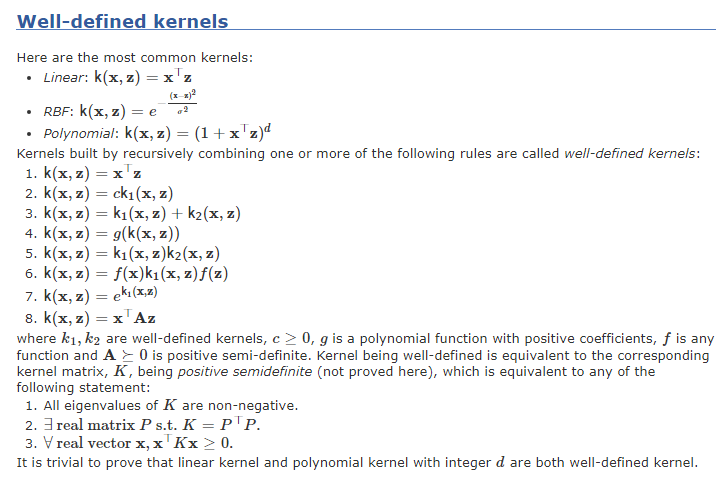

# Multi-class SVM

SVM only considers two classes

For m-class classification problem:
- SVM 1 learns “Output==1” vs “Output != 1”
- SVM 2 learns “Output==2” vs “Output != 2”

- SVM m learns “Output==m” vs “Output != m”


 To predict the output for a new input, just predict with each SVM
and find out which one puts the prediction the furthest into the
positive region

# SVM for Regression

We can use SVMs for regression instead of classification.

- the trick is to reverse the objective


- instead of trying to fit the largest possible margin between two classes while limiting margin violations.


- SVM Regression tries to fit as many instances as possible on the street while limiting margin violations (i.e., instances off the street).

<img src=https://i.ibb.co/v1X2V9P/10.jpg>

# Resources:

This lab took a lot of time and resources to prepare.
Take a look at the resourcses below. They are super helpful!

https://www.cs.cornell.edu/courses/cs4780/2017sp/lectures/lecturenote09.html

https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote14.html#:~:text=The%20RBF%20kernel%20k(x,a%20well%2Ddefined%20kernel%20matrix.

http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions


https://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Support_Vector_Machines_SVM_2.php


https://towardsdatascience.com/understanding-the-kernel-trick-e0bc6112ef78


https://www.datasciencecentral.com/profiles/blogs/implementing-a-soft-margin-kernelized-support-vector-machine
https://towardsdatascience.com/support-vector-machines-svm-c9ef22815589

https://www.cs.umd.edu/~samir/498/SVM.pdf

https://people.csail.mit.edu/dsontag/courses/ml14/slides/lecture2.pdf

https://www.vebuso.com/2020/02/a-top-machine-learning-algorithm-explained-support-vector-machines-svms/


https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/

https://towardsdatascience.com/support-vector-machine-simply-explained-fee28eba5496


https://towardsdatascience.com/support-vector-machines-svm-c9ef22815589

http://web.mit.edu/6.034/wwwbob/svm.pdf

Hands on machine learning with scikit learn and tensorflow by Aurélien Géron



# Tasks

- Task 1  [10 Points]: Work with [Amazon Fine Food Reviews dataset](https://www.kaggle.com/snap/amazon-fine-food-reviews)
    - Perform proper preprocessing and visualization
    - Perform proper hyperparameter tuning **-SVM-**. JUSTIFY ALL THE HYPERPARAMETER VALUES
    - **Hint**: Check [this](https://towardsdatascience.com/support-vector-machines-svm-c9ef22815589) tutorial and this [kernel](https://www.kaggle.com/laowingkin/amazon-fine-food-review-sentiment-analysis) for help